# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: M Rizal Muhaimin
- Email: muhaimin.rizal@student.unmer.ac.id
- Id Dicoding: m_rizal_muhaimin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import os
import joblib

### Menyiapkan data yang akan digunakan

#### Gathering Data

#### Asessing Data

In [186]:
# Cek jumlah data
print("Jumlah baris, Jumlah kolom")
print(df.shape)

Jumlah baris, Jumlah kolom
(4424, 37)


In [187]:
# Cek info dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [188]:
# Cek data unik (tipe data objek)

for fitur in df:
  if df[fitur].dtype == "object":
    print(f"Fitur {fitur}")
    print(df[fitur].unique(),"\n")

Fitur Status
['Dropout' 'Graduate' 'Enrolled'] 



In [189]:
# Cek missing value
print("Missing value\n")
print(df.isna().sum())

Missing value

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                  

In [190]:
# Cek duplikasi data
print("Duplikasi data")
print(df.duplicated().sum())

Duplikasi data
0


In [191]:
# Cek jumlah data di status
df["Status"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Status, dtype: int64

data imbalaned karena jumlah data dropout, enrolled, graduate tidak seimbang

In [192]:
# Cek tipe data
print("Cek tipe data\n")
df.dtypes

Cek tipe data



Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

In [193]:
# Cek kolom / fitur
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

#### Cleaning Data

In [194]:
# Membuat dataframe baru
label_df = df.copy()

In [195]:
# Mengubah tipe data fitur

# inisialisasi fitur
int_to_str = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'International']

# Mengubah tipe data beberapa fitur ke object
label_df[int_to_str] = label_df[int_to_str].astype(str)

# Cek tipe data dari setiap fitur setelah di konversi
print("Cek tipe data setelah di konversi\n")
label_df[int_to_str].dtypes

Cek tipe data setelah di konversi



Marital_status                object
Application_mode              object
Application_order             object
Course                        object
Daytime_evening_attendance    object
Previous_qualification        object
Nacionality                   object
Mothers_qualification         object
Fathers_qualification         object
Mothers_occupation            object
Fathers_occupation            object
Displaced                     object
Educational_special_needs     object
Debtor                        object
Tuition_fees_up_to_date       object
Gender                        object
Scholarship_holder            object
International                 object
dtype: object

In [196]:
# Cek jumlah nilai unik dari setiap fitur yang kategorikal

for fitur in label_df:
    if label_df[fitur].dtype == "object":
        print("\nFitur", fitur)
        print(label_df[fitur].unique())


Fitur Marital_status
['1' '2' '4' '3' '5' '6']

Fitur Application_mode
['17' '15' '1' '39' '18' '53' '44' '51' '43' '7' '42' '16' '5' '2' '10'
 '57' '26' '27']

Fitur Application_order
['5' '1' '2' '4' '3' '6' '9' '0']

Fitur Course
['171' '9254' '9070' '9773' '8014' '9991' '9500' '9238' '9670' '9853'
 '9085' '9130' '9556' '9147' '9003' '33' '9119']

Fitur Daytime_evening_attendance
['1' '0']

Fitur Previous_qualification
['1' '19' '42' '39' '10' '3' '40' '2' '4' '12' '43' '15' '6' '9' '38' '5'
 '14']

Fitur Nacionality
['1' '62' '6' '41' '26' '103' '13' '25' '21' '101' '11' '22' '32' '100'
 '24' '109' '2' '108' '105' '14' '17']

Fitur Mothers_qualification
['19' '1' '37' '38' '3' '4' '42' '2' '34' '12' '40' '9' '5' '39' '11' '41'
 '30' '14' '35' '36' '6' '10' '29' '43' '18' '22' '27' '26' '44']

Fitur Fathers_qualification
['12' '3' '37' '38' '1' '19' '5' '4' '34' '2' '39' '11' '9' '36' '26' '40'
 '14' '20' '35' '41' '22' '13' '29' '43' '18' '42' '10' '6' '30' '25' '44'
 '33' '27' '3

In [197]:
# Cek jumlah nilai unik dari setiap fitur yang kategorikal

for fitur in label_df:
    if label_df[fitur].dtype == "object":
        print("\nFitur", fitur)
        print(label_df.value_counts(subset=fitur, sort=False))



Fitur Marital_status
Marital_status
1    3919
2     379
3       4
4      91
5      25
6       6
dtype: int64

Fitur Application_mode
Application_mode
1     1708
10      10
15      30
16      38
17     872
18     124
2        3
26       1
27       1
39     785
42      77
43     312
44     213
5       16
51      59
53      35
57       1
7      139
dtype: int64

Fitur Application_order
Application_order
0       1
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
dtype: int64

Fitur Course
Course
171     215
33       12
8014    215
9003    210
9070    226
9085    337
9119    170
9130    141
9147    380
9238    355
9254    252
9500    766
9556     86
9670    268
9773    331
9853    192
9991    268
dtype: int64

Fitur Daytime_evening_attendance
Daytime_evening_attendance
0     483
1    3941
dtype: int64

Fitur Previous_qualification
Previous_qualification
1     3717
10       4
12      45
14       1
15       2
19     162
2       23
3      126
38       7
39     219
4      

In [198]:
# Insialisasi mapping untuk konversi

application_mode_mapping = {
    '17': '2nd_phase_GC',
    '15': 'Intl_student_bachelor',
    '1' : '1st_Ph_GC',
    '39': '>23y.o',
    '18': '3rd_Ph_GC',
    '53': 'short_Cyc_diploma',
    '44': 'tech_Spc_diploma',
    '51': 'change_of_Inst/Crs',
    '43': 'change_of_Crs',
    '7' : 'holders_of_other_higher_Crs',
    '42': 'transfer',
    '16': '1st_Ph_SC_Madeira_Island',
    '5' : '1st_Ph_SC_Azores_Island',
    '2' : 'ordinance_no_612/93',
    '10': 'ordinance_no_854-B/99',
    '57': 'change_of_Inst/Crs_Intl',
    '26': 'ordinance_no_533_A/99_item_b2_DP',
    '27': 'ordinance_no_533_A/99_item_b3_OI'
}


course_mapping = {
    '171'   : 'Animation_Multimed_Des',
    '9254'  : 'Tourism',
    '9070'  : 'Communic_Des',
    '9773'  : 'Journalism_Communic',
    '8014'  : 'Social_Serv_eve_AA',
    '9500'  : 'Nursing',
    '9238'  : 'Social_Serv',
    '9670'  : 'Adver_Mktg_Mgmt',
    '9853'  : 'Basic_Edu',
    '9085'  : 'Veterinary_Nursing',
    '9130'  : 'Equinculture',
    '9556'  : 'Oral_Hygiene',
    '9147'  : 'Mgmt',
    '9003'  : 'Agronomy',
    '33'    : 'Biofuel_Prod_Techno',
    '9119'  : 'Informatics_Engin',
    '9991'  : 'Mgmt_evening_eve_AA'
}


previous_qualification_mapping = {
    '1'  : '2nd_Edu',
    '19' : 'Basic_Edu_3rd_Cyc_or_Eq',
    '42' : 'Pro_higher_Technic_Crs',
    '39' : 'Techno_Spc_Crs',
    '10' : '11th_yr_of_Sch_NC',
    '3'  : 'degree',
    '40' : 'degree_1st_cyc',
    '2'  : 'bachelors_degree',
    '4'  : 'masters',
    '12' : 'Other/11th_yr_of_Sch',
    '43' : 'master_2nd_cycle',
    '15' : '10th_yr_of_Sch_NC',
    '6'  : 'Freq_of_higher_Edu',
    '9'  : '12th_yr_of_Sch_NC',
    '38' : 'Basic_edu_2nd_Cyc_or_Eq',
    '5'  : 'doctorate'
}


nacionality_mapping = {
    '1'   : 'Portuguese',
    '62'  : 'Romanian',
    '41'  : 'Brazilian',
    '26'  : 'Santomean',
    '103' : 'Ukrainian',
    '13'  : 'Dutch',
    '25'  : 'Mozambican',
    '21'  : 'Angolan',
    '101' : 'Mexican',
    '11'  : 'Italian',
    '22'  : 'Cape Verdean',
    '32'  : 'Turkish',
    '100' : 'Moldova (Republic of)',
    '24'  : 'Guinean',
    '109' : 'Colombian',
    '2'   : 'German',
    '108' : 'Cuban',
    '105' : 'Russian',
    '14'  : 'English',
    '17'  : 'Lithuanian',
    '6'   : 'Spanish'
}


mothers_qualification_mapping = {
    '19' : 'Basic_Edu_3rd_Cyc_or_Eq',
    '1'  : '2nd_Edu_12th_yr_of_Sch_or_Eq',
    '37' : 'Basic_Edu_1st_Cyc_or_Eq',
    '38' : 'Basic_Edu_2nd_Cyc_or_Eq',
    '3'  : 'Degree',
    '4'  : 'Masters',
    '42' : 'Pro_higher_technic_Crs',
    '2'  : 'Bachelors_Degree',
    '34' : 'Unknown',
    '12' : 'Other_11th_yr_of_Sch',
    '40' : 'degree_1st_Cyc',
    '9'  : '12th_Year_of_Sch_NC',
    '5'  : 'Doctorate',
    '39' : 'Techno_Spc_Crs',
    '11' : '7th_Year_Old',
    '41' : 'Spc_higher_studies_Crs',
    '30' : '8th_yr_of_Sch',
    '14' : '10th_yr_of_Sch',
    '35' : 'Cannot_read_or_write',
    '36' : 'Can_read_W/o_having_4th_yr_of_Sch',
    '6'  : 'Freq_of_Higher_Edu',
    '10' : '11th_yr_of_Sch_NC',
    '29' : '9th_yr_of_Sch_NC',
    '43' : 'Master_2nd_Cyc',
    '18' : 'General_commerce_Crs',
    '22' : 'Technic_Pro_Crs',
    '27' : '2nd_cyc_of_the_general_high_Sch_Crs',
    '26' : '7th_yr_of_Sch',
    '44' : 'Doctorate_3rd_Cyc'
}


fathers_qualification_mapping = {
    '12' : 'Other_11th_yr_of_Sch',
    '3'  : 'Degree',
    '37' : 'Basic_Edu_1st_Cyc_or_Eq',
    '38' : 'Basic_Edu_2nd_Cyc_or_Eq',
    '1'  : '2nd_Edu_12th_yr_of_Sch_or_Eq',
    '19' : 'Basic_Edu_3rd_cyc_or_Eq',
    '5'  : 'Doctorate',
    '4'  : 'Masters',
    '34' : 'Unknown',
    '2'  : 'Bachelors_Degree',
    '39' : 'Techno_Spc_Crs',
    '11' : '7th_yr_Old',
    '9'  : '12th_yr_of_Sch_NC',
    '36' : 'Can_read_W/o_having_4th_yr_of_Sch',
    '26' : '7th_yr_of_Sch',
    '40' : 'degree_1st_Cyc',
    '14' : '10th_yr_of_Sch',
    '20' : 'Complementary_High_Sch_Course',
    '35' : 'Cannot_read_or_write',
    '41' : 'Spc_higher_studies_Crs',
    '22' : 'Technic_Pro_Crs',
    '13' : '2nd_yr_complementary_high_Sch_Crs',
    '29' : '9th_yr_of_Sch_NC',
    '43' : 'Master_2nd_Cyc',
    '18' : 'General_commerce_course',
    '42' : 'Pro_higher_technic_Crs',
    '10' : '11th_yr_of_Sch_NC',
    '6'  : 'Freq_of_Higher_Edu',
    '30' : '8th_yr_of_Sch',
    '25' : 'Complementary_High_Sch_Crs_not_concluded',
    '44' : 'Doctorate_3rd_cyc',
    '37' : 'Basic_Edu_1st_Cyc_or_Eq',
    '27' : '2nd_Cyc_of_the_general_high_Sch_Crs',
    '31' : 'General_Crs_of_Admin_Commerce'
}

In [199]:
# Fungsi untuk konversi data

# Fungsi untuk mengonversi fitur Application_mode
def replace_app_mode_label(app_mode_label):
    return application_mode_mapping.get(app_mode_label, app_mode_label)

# Fungsi untuk mengonversi fitur Course
def replace_course_label(course_label):
    return course_mapping.get(course_label, course_label)

# Fungsi untuk mengonversi fitur Previous_qualification
def replace_previous_qualification_label(prev_quali_label):
    return previous_qualification_mapping.get(prev_quali_label, prev_quali_label)

# Fungsi untuk mengonversi fitur nacionality
def replace_nacionality_label(nacionality_label):
    return nacionality_mapping.get(nacionality_label, nacionality_label)

# Fungsi untuk mengonversi fitur mothers_qualification
def replace_mothers_qualification_label(mothers_qualification_label):
    return mothers_qualification_mapping.get(mothers_qualification_label, mothers_qualification_label)

# Fungsi untuk mengonversi fitur fathers_qualification
def replace_fathers_qualification_label(fathers_qualification_label):
    return fathers_qualification_mapping.get(fathers_qualification_label, fathers_qualification_label)


# Fungsi utama untuk mengonversi fitur
def fungsi_konversi_fitur(my_fitur):
    for fitur in my_fitur:
      if fitur == "Marital_status":
          label_df[fitur] = label_df[fitur].apply(lambda x: "Single" if x == "1" else "Married" if x == "2" else "Widower" if x == "3" else "Divorced" if x == "4" else "Facto Union" if x == "5" else "legally separated")
      elif fitur == "Application_mode":
          label_df[fitur] = label_df[fitur].apply(replace_app_mode_label)
      elif fitur == "Course":
          label_df[fitur] = label_df[fitur].apply(replace_course_label)
      elif fitur == "Daytime_evening_attendance":
          label_df[fitur] = label_df[fitur].apply(lambda x: "evening" if x == "0" else "daytime")
      elif fitur == "Previous_qualification":
          label_df[fitur] = label_df[fitur].apply(replace_previous_qualification_label)
      elif fitur == "Nacionality":
          label_df[fitur] = label_df[fitur].apply(replace_nacionality_label)
      elif fitur == "Mothers_qualification":
          label_df[fitur] = label_df[fitur].apply(replace_mothers_qualification_label)
      elif fitur == "Fathers_qualification":
          label_df[fitur] = label_df[fitur].apply(replace_fathers_qualification_label)
      elif fitur == "Gender":
          label_df[fitur] = label_df[fitur].apply(lambda x: "Female" if x == "0" else "Male")
      else:
          label_df[fitur] = label_df[fitur].apply(lambda x: "No" if x == "0" else "Yes")
    return label_df

In [200]:
# Menjalankan fungsi untuk konversi

fitur_yang_dikonversi_1 = ["Marital_status", "Application_mode", "Course", "Previous_qualification", "Nacionality", "Mothers_qualification", "Fathers_qualification"]
label_df = fungsi_konversi_fitur(fitur_yang_dikonversi_1)

fitur_yang_dikonversi_2 = ["Daytime_evening_attendance","Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International"]
label_df = fungsi_konversi_fitur(fitur_yang_dikonversi_2)

In [201]:
# Cek jumlah nilai unik dari setiap fitur yang kategorikal (setelah di konversi)

print("Setelah label di konversi")

for fitur in label_df:
    if label_df[fitur].dtype == "object":
        print("\n")
        print(label_df.value_counts(subset=fitur))

Setelah label di konversi


Marital_status
Single               3919
Married               379
Divorced               91
Facto Union            25
legally separated       6
Widower                 4
dtype: int64


Application_mode
1st_Ph_GC                           1708
2nd_phase_GC                         872
>23y.o                               785
change_of_Crs                        312
tech_Spc_diploma                     213
holders_of_other_higher_Crs          139
3rd_Ph_GC                            124
transfer                              77
change_of_Inst/Crs                    59
1st_Ph_SC_Madeira_Island              38
short_Cyc_diploma                     35
Intl_student_bachelor                 30
1st_Ph_SC_Azores_Island               16
ordinance_no_854-B/99                 10
ordinance_no_612/93                    3
ordinance_no_533_A/99_item_b2_DP       1
ordinance_no_533_A/99_item_b3_OI       1
change_of_Inst/Crs_Intl                1
dtype: int64


Application_orde

In [202]:
# Menampilkan dataset
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

In [203]:
# Cek setiap kolom sebelum konversi data
df.select_dtypes(include="object").head()

Status
0   Dropout
1  Graduate
2   Dropout
3  Graduate
4  Graduate

In [204]:
# Cek setiap kolom yang dilakukan konversi data
label_df.select_dtypes(include="object").head()

Marital_status       Application_mode Application_order  \
0         Single           2nd_phase_GC                 5   
1         Single  Intl_student_bachelor                 1   
2         Single              1st_Ph_GC                 5   
3         Single           2nd_phase_GC                 2   
4        Married                 >23y.o                 1   

                   Course Daytime_evening_attendance Previous_qualification  \
0  Animation_Multimed_Des                    daytime                2nd_Edu   
1                 Tourism                    daytime                2nd_Edu   
2            Communic_Des                    daytime                2nd_Edu   
3     Journalism_Communic                    daytime                2nd_Edu   
4      Social_Serv_eve_AA                    evening                2nd_Edu   

  Nacionality         Mothers_qualification    Fathers_qualification  \
0  Portuguese       Basic_Edu_3rd_Cyc_or_Eq     Other_11th_yr_of_Sch   
1  Portuguese  2nd_Edu_12th_yr_of_Sch_or_Eq                   Degree   
2  Portuguese       Basic_Edu_1st_Cyc_or_Eq  Basic_Edu_1st_Cyc_or_Eq   
3  Portuguese       Basic_Edu_2nd_Cyc_or_Eq  Basic_Edu_1st_Cyc_or_Eq   
4  Portuguese       Basic_Edu_1st_Cyc_or_Eq  Basic_Edu_2nd_Cyc_or_Eq   

  Mothers_occupation Fathers_occupation Displaced Educational_special_needs  \
0                  5                  9       Yes                        No   
1                  3                  3       Yes                        No   
2                  9                  9       Yes                        No   
3                  5                  3       Yes                        No   
4                  9                  9        No                        No   

  Debtor Tuition_fees_up_to_date  Gender Scholarship_holder International  \
0     No                     Yes    Male                 No            No   
1     No                      No    Male                 No            No   
2     No                      No    Male                 No            No   
3     No                     Yes  Female                 No            No   
4     No                     Yes  Female                 No            No   

     Status  
0   Dropout  
1  Graduate  
2   Dropout  
3  Graduate  
4  Graduate

#### Ekspor dataset

In [205]:
# Ekspor dataset yang akan digunakan untuk membuat business dashboard dan prediksi ML
# dataset untuk business dashboard
label_df.to_csv("df_student_for_dash.csv", index=False)

# dataset untuk streamlit dashboard (ML)
label_df.iloc[:20].to_csv("df_student_for_ML.csv", index=False)

## Data Understanding

### Exploratory Data Analysis

#### Statistik Deskriptif

In [206]:
# Ringkasan Statatistik Deskriptif untuk fitur Kategorikal
label_df.describe(include="object")

Marital_status Application_mode Application_order   Course  \
count            4424             4424              4424     4424   
unique              6               18                 8       17   
top            Single        1st_Ph_GC                 1  Nursing   
freq             3919             1708              3026      766   

       Daytime_evening_attendance Previous_qualification Nacionality  \
count                        4424                   4424        4424   
unique                          2                     17          21   
top                       daytime                2nd_Edu  Portuguese   
freq                         3941                   3717        4314   

               Mothers_qualification    Fathers_qualification  \
count                           4424                     4424   
unique                            29                       34   
top     2nd_Edu_12th_yr_of_Sch_or_Eq  Basic_Edu_1st_Cyc_or_Eq   
freq                            1069                     1209   

       Mothers_occupation Fathers_occupation Displaced  \
count                4424               4424      4424   
unique                 32                 46         2   
top                     9                  9       Yes   
freq                 1577               1010      2426   

       Educational_special_needs Debtor Tuition_fees_up_to_date  Gender  \
count                       4424   4424                    4424    4424   
unique                         2      2                       2       2   
top                           No     No                     Yes  Female   
freq                        4373   3921                    3896    2868   

       Scholarship_holder International    Status  
count                4424          4424      4424  
unique                  2             2         3  
top                    No            No  Graduate  
freq                 3325          4314      2209

In [207]:
# Ringkasan Statatistik Deskriptif untuk fitur numerik
label_df.describe()

Previous_qualification_grade  Admission_grade  Age_at_enrollment  \
count                   4424.000000      4424.000000        4424.000000   
mean                     132.613314       126.978119          23.265145   
std                       13.188332        14.482001           7.587816   
min                       95.000000        95.000000          17.000000   
25%                      125.000000       117.900000          19.000000   
50%                      133.100000       126.100000          20.000000   
75%                      140.000000       134.800000          25.000000   
max                      190.000000       190.000000          70.000000   

       Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.709991                           6.270570   
std                             2.360507                           2.480178   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            20.000000                          26.000000   

       Curricular_units_1st_sem_evaluations  \
count                           4424.000000   
mean                               8.299051   
std                                4.179106   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               45.000000   

       Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
count                        4424.000000                     4424.000000   
mean                            4.706600                       10.640822   
std                             3.094238                        4.843663   
min                             0.000000                        0.000000   
25%                             3.000000                       11.000000   
50%                             5.000000                       12.285714   
75%                             6.000000                       13.400000   
max                            26.000000                       18.875000   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4424.000000   
mean                                       0.137658   
std                                        0.690880   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       12.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.541817                           6.232143   
std                             1.918546                           2.195951   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          23.000000   

       Curricular_units_2nd_sem_evaluations  \
count                           4424.000000   
mean                               8.063291   
std                                3.947951   
min                                0.000000   
25%                                6.000000   
50%                 

In [208]:
# Menampilkan dataset
label_df.head()

Marital_status       Application_mode Application_order  \
0         Single           2nd_phase_GC                 5   
1         Single  Intl_student_bachelor                 1   
2         Single              1st_Ph_GC                 5   
3         Single           2nd_phase_GC                 2   
4        Married                 >23y.o                 1   

                   Course Daytime_evening_attendance Previous_qualification  \
0  Animation_Multimed_Des                    daytime                2nd_Edu   
1                 Tourism                    daytime                2nd_Edu   
2            Communic_Des                    daytime                2nd_Edu   
3     Journalism_Communic                    daytime                2nd_Edu   
4      Social_Serv_eve_AA                    evening                2nd_Edu   

   Previous_qualification_grade Nacionality         Mothers_qualification  \
0                         122.0  Portuguese       Basic_Edu_3rd_Cyc_or_Eq   
1                         160.0  Portuguese  2nd_Edu_12th_yr_of_Sch_or_Eq   
2                         122.0  Portuguese       Basic_Edu_1st_Cyc_or_Eq   
3                         122.0  Portuguese       Basic_Edu_2nd_Cyc_or_Eq   
4                         100.0  Portuguese       Basic_Edu_1st_Cyc_or_Eq   

     Fathers_qualification  ... Curricular_units_2nd_sem_credited  \
0     Other_11th_yr_of_Sch  ...                                 0   
1                   Degree  ...                                 0   
2  Basic_Edu_1st_Cyc_or_Eq  ...                                 0   
3  Basic_Edu_1st_Cyc_or_Eq  ...                                 0   
4  Basic_Edu_2nd_Cyc_or_Eq  ...                                 0   

  Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                 0                                     0   
1                                 6                                     6   
2                                 6                                     0   
3                                 6                                    10   
4                                 6                                     6   

  Curricular_units_2nd_sem_approved Curricular_units_2nd_sem_grade  \
0                                 0                       0.000000   
1                                 6                      13.666667   
2                                 0                       0.000000   
3                                 5                      12.400000   
4                                 6                      13.000000   

  Curricular_units_2nd_sem_without_evaluations Unemployment_rate  \
0                                            0              10.8   
1                                            0              13.9   
2                                            0              10.8   
3                                            0               9.4   
4                                            0              13.9   

  Inflation_rate   GDP    Status  
0            1.4  1.74   Dropout  
1           -0.3  0.79  Graduate  
2            1.4  1.74   Dropout  
3           -0.8 -3.12  Graduate  
4           -0.3  0.79  Graduate  

[5 rows x 37 columns]

#### Kolerlasi fitur

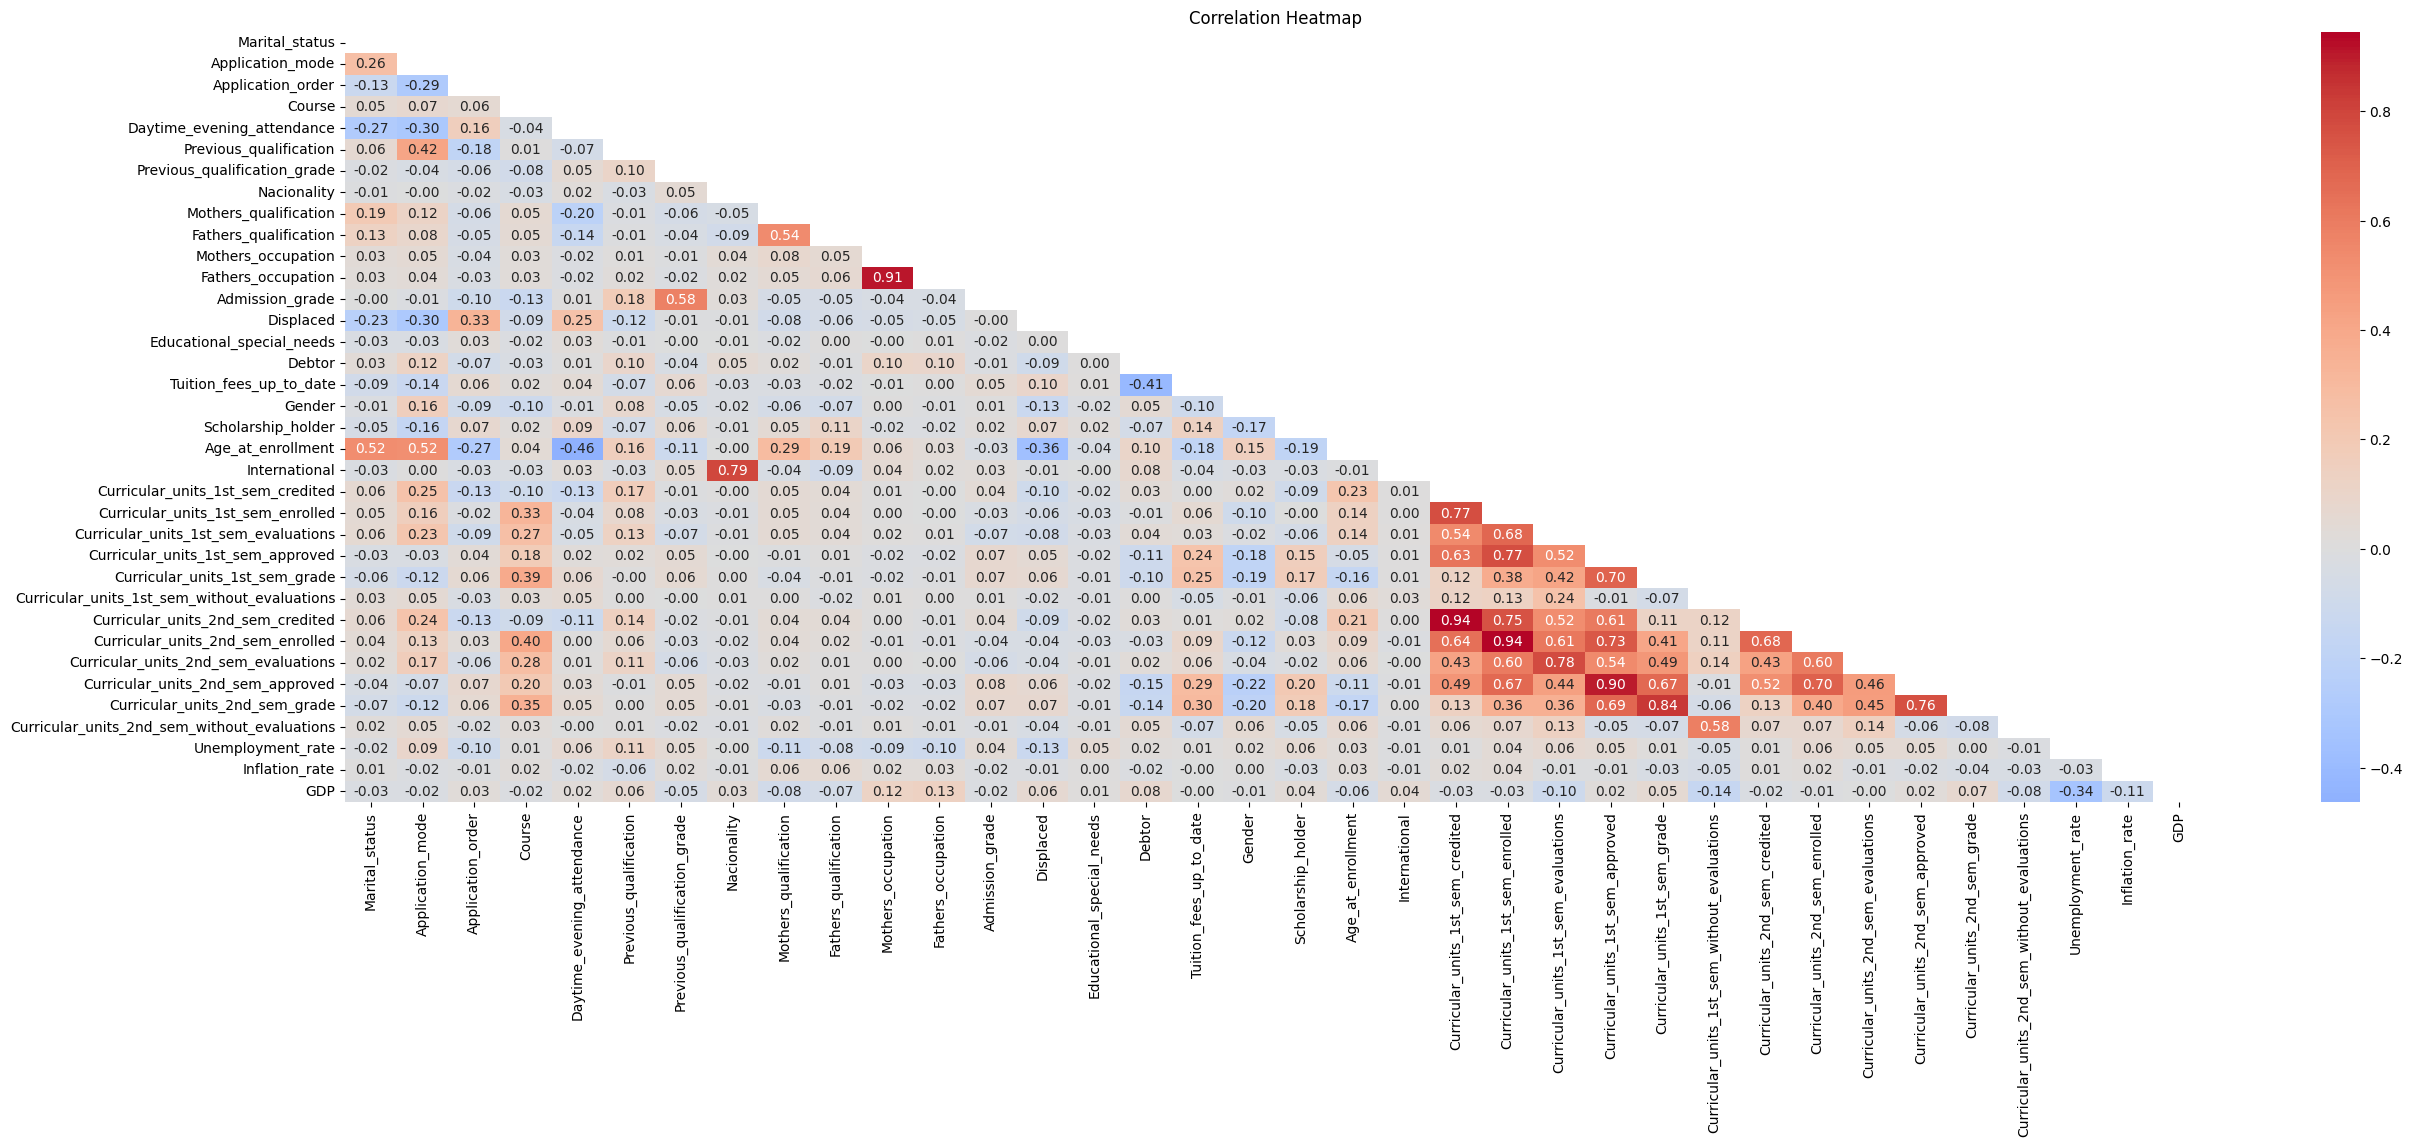

In [209]:
# correlation matrix

fig, axe = plt.subplots(figsize=(30,10))
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Beberapa hal menarik dari heatmap diatas:
1. Korelasi fitur terhadap dirinya sendiri sesuai yaitu sama dengan 1.

2. Nacionality (Kewarganegaraan) memiliki korelasi yang kuat dengan International, karena melalui kewarganegaraan siswa dapat diketahui apakah siswa tersebut tergolong siswa International / bukan.

3. Pekerjaan Ayah memiliki korelasi yang sangat kuat dengan pekerjaan ibu. Karena, pekerjaan yang sama atau serupa dari kedua orang tua dapat mmembentuk pilihan pendidikan dan karir anak-anak mereka (siswa). Anak-anak cenderung meniru perilaku orang tua mereka, termasuk pilihan karir dan aspirasi pendidikan.

4. Jumlah kredit dari mata pelajaran di semester 1 (Curicullar_units_1st_sem_credited) memiliki korelasi yang sangat kuat dengan jumlah kredit dari mata pelajaran di semester 2, karena kurikulum yang didapat oleh siswa seringkali dirancang secara berkelanjutan, dengan materi pada semester 2 membangun pada dasar pengetahuan yang diperoleh pada semester 1.

5. Jumlah mata pelajaran yang didaftarkan di semester 1 memiliki korelasi yang sangat kuat dengan jumlah mata pelajaran yang didaftarkan di semester 2, hal ini dikarenakan siswa yang mendaftar mata pelajaran di semester 2 biasanya telah mengambil mata pelajaran prasyarat di semester 1.

6. Jumlah mata pelajaran yang lulus di semester 1 memiliki korelasi yang sangat kuat dengan jumlah mata pelajaran yang lulus di semester 2. Karena itu, siswa cenderung untuk terus memilih mata pelajaran yang berkaitan untuk memastikan pemahaman yang holistik. Disisi lain, banyak program studi merancang kurikulum secara bertahap, dengan materi di semester 2 dibangun atau melengkapi materi di semester 1.

7. Jumlah mata pelajaran yang dinilai di semester 1 memiliki korelasi yang sangat kuat dengan jumlah mata pelajaran yang diniliau di semester 2. Karena, siswa yang sukses dalam semester 1 dapat memperkuat keterampilan belajar dan strategi akademis-nya. Sehingga dapat menerapkan keterampilan ini secara konsisten di semester 2, yang berpotensi meningkatkan kualitas hasil akademis mereka.




#### Distribusi Fitur Numerik dari dataset

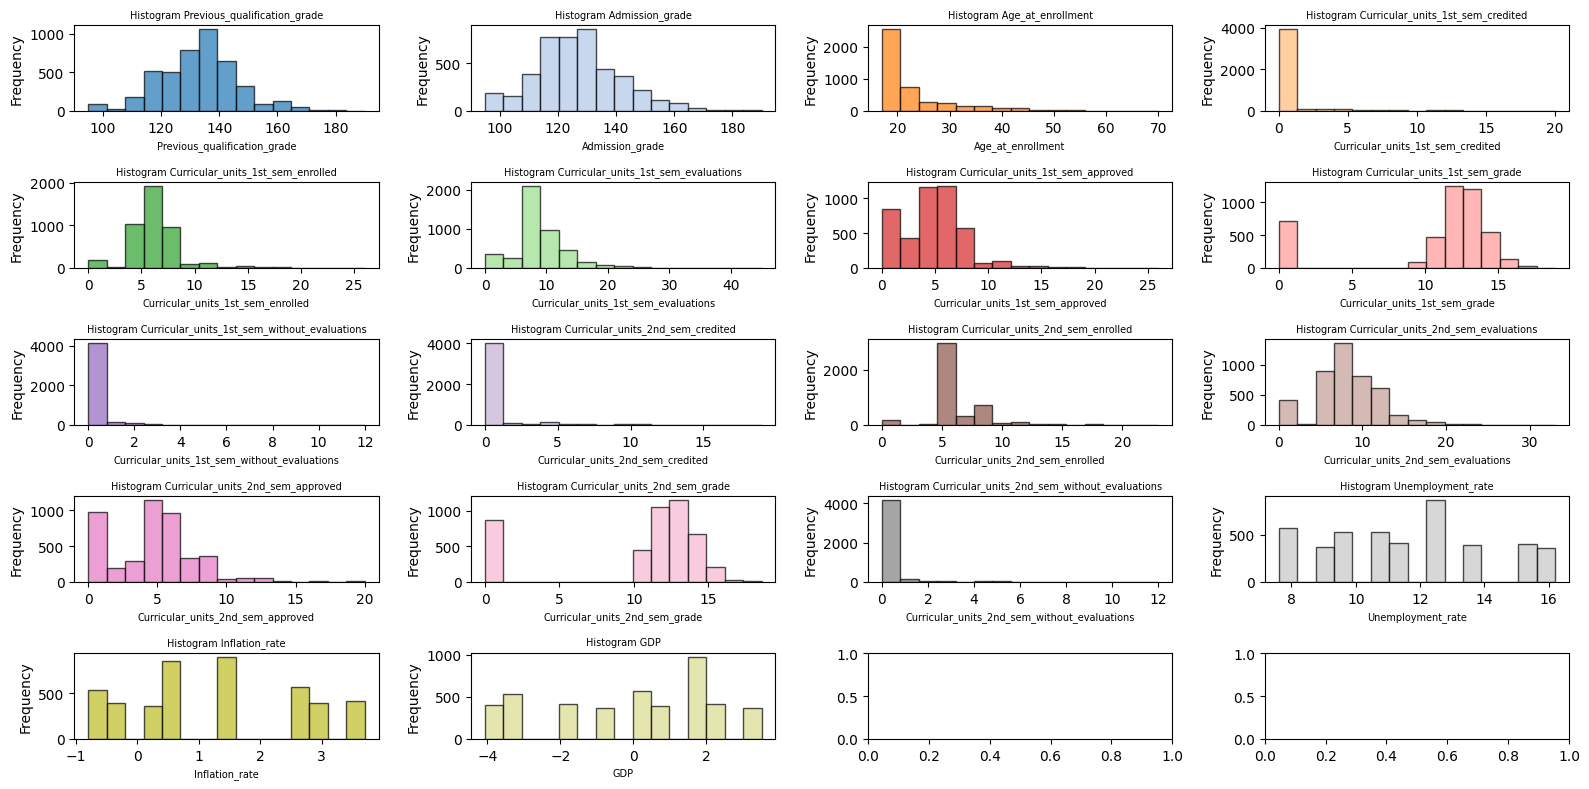

In [210]:
# Melihat distribusi feature numerik menggunakan grafik histogram

numerik_fitur = []

for fitur in label_df.columns:
  if label_df[fitur].dtype != "object":
     numerik_fitur.append(fitur)


# Mendefenisikan jumlah dari histogram & jumlah grid-nya
num_histograms = len(numerik_fitur)
num_rows = 5
num_cols = 4

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
axes_flat = axes.flatten()

# Mengatur warna histogram
colors = plt.cm.tab20.colors[:num_histograms]

# Membuat setiap histogram dengan warna unik
for i, (column, ax) in enumerate(zip(numerik_fitur, axes_flat)):
  label_df[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
  ax.set_title(f'Histogram {column}', fontsize = 7)
  ax.set_xlabel(column, fontsize = 7)

# Menampilkan grafik histogram
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat kita lihat bahwa terdapat beberapa fitur numerik yang berbentuk right-skewed distribution, seperti Age_at_enrollment, Curricular_units_1st_sem_credited, Curricular_units_1st_sem_enrolled, Curricular_units_1st_sem_evaluations, Curricular_units_1st_sem_approved, Curricular_units_1st_sem_without_evaluations, Curricular_units_2nd_sem_credited, Curricular_units_2nd_sem_enrolled, Curricular_units_2nd_sem_evaluations, Curricular_units_2nd_sem_approved, dan Curricular_units_2nd_sem_without_evaluations. Selain itu, fitur Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_grade, dan GDP tergolong dalam left-skewed distribution. Disisi lain, fitur Admission_grade. previous_qualification_grade dan unemployment_rate serta inflation_rate tergolong dalam normal distribution.

#### Distribusi Fitur Numerik berdasarkan fitur Kategorikal yang lain

In [211]:
# Membuat Helper Function untuk menggambarkan distribusi fitur numerik dengan boxplot
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(16,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

##### Distribusi Fitur Numerik berdasarkan Fitur Status

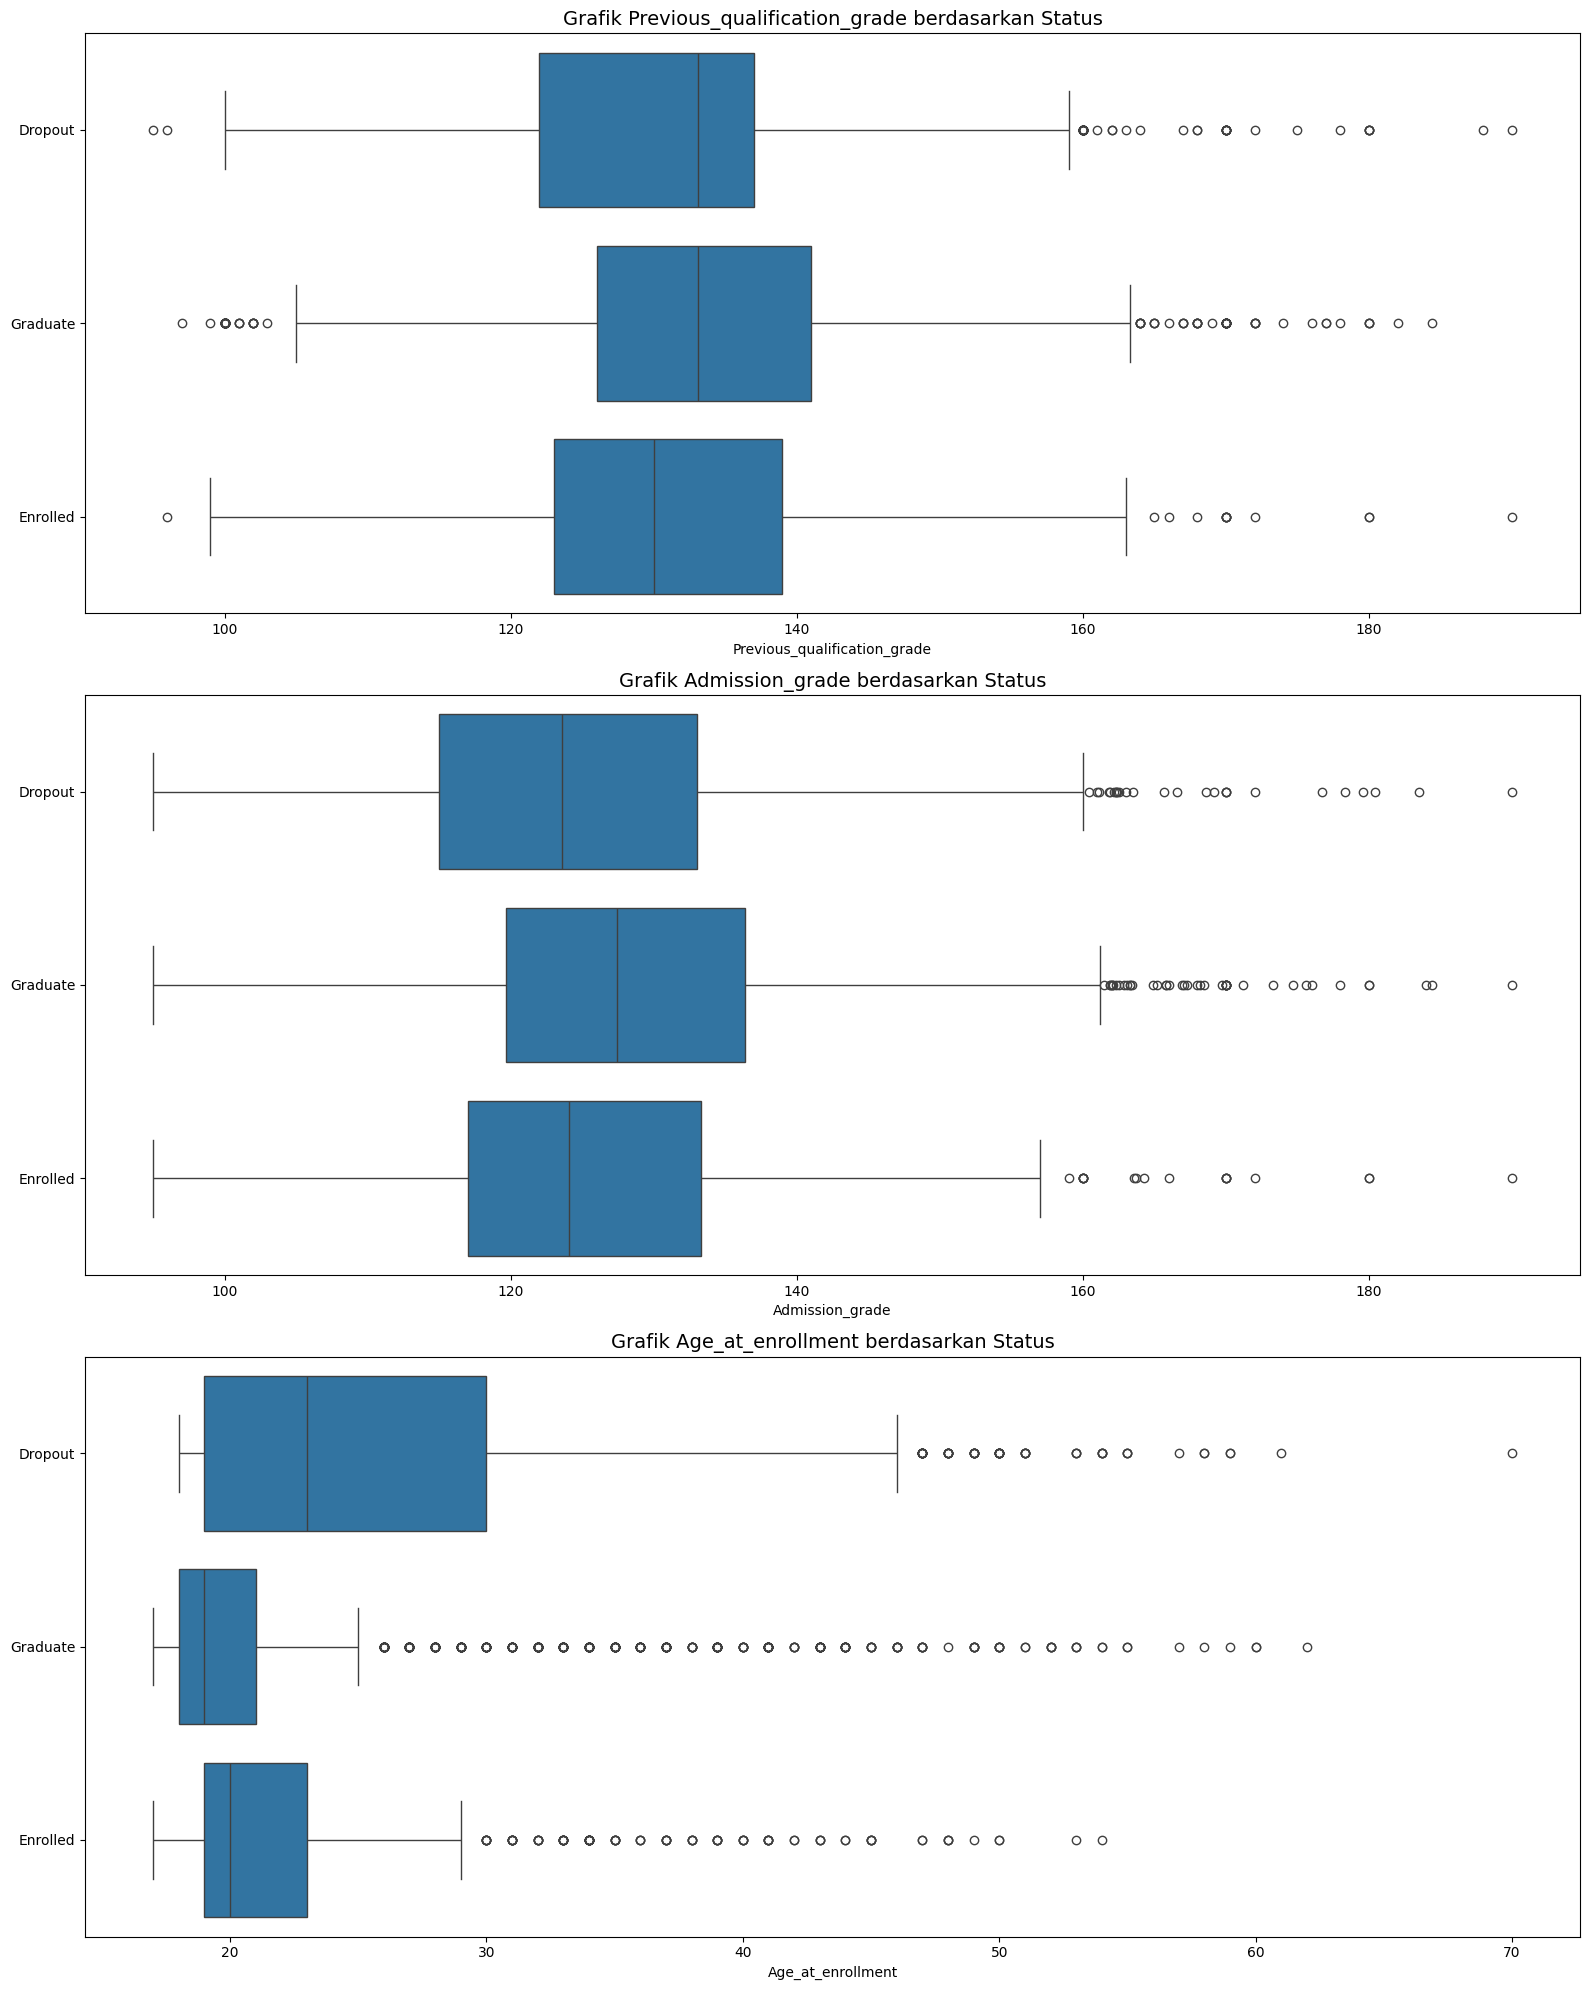

In [212]:
# 1. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Status - bgn 1
numerical_dis_plot(
    features=["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment"],
    df=label_df,
    segment_feature="Status"
)

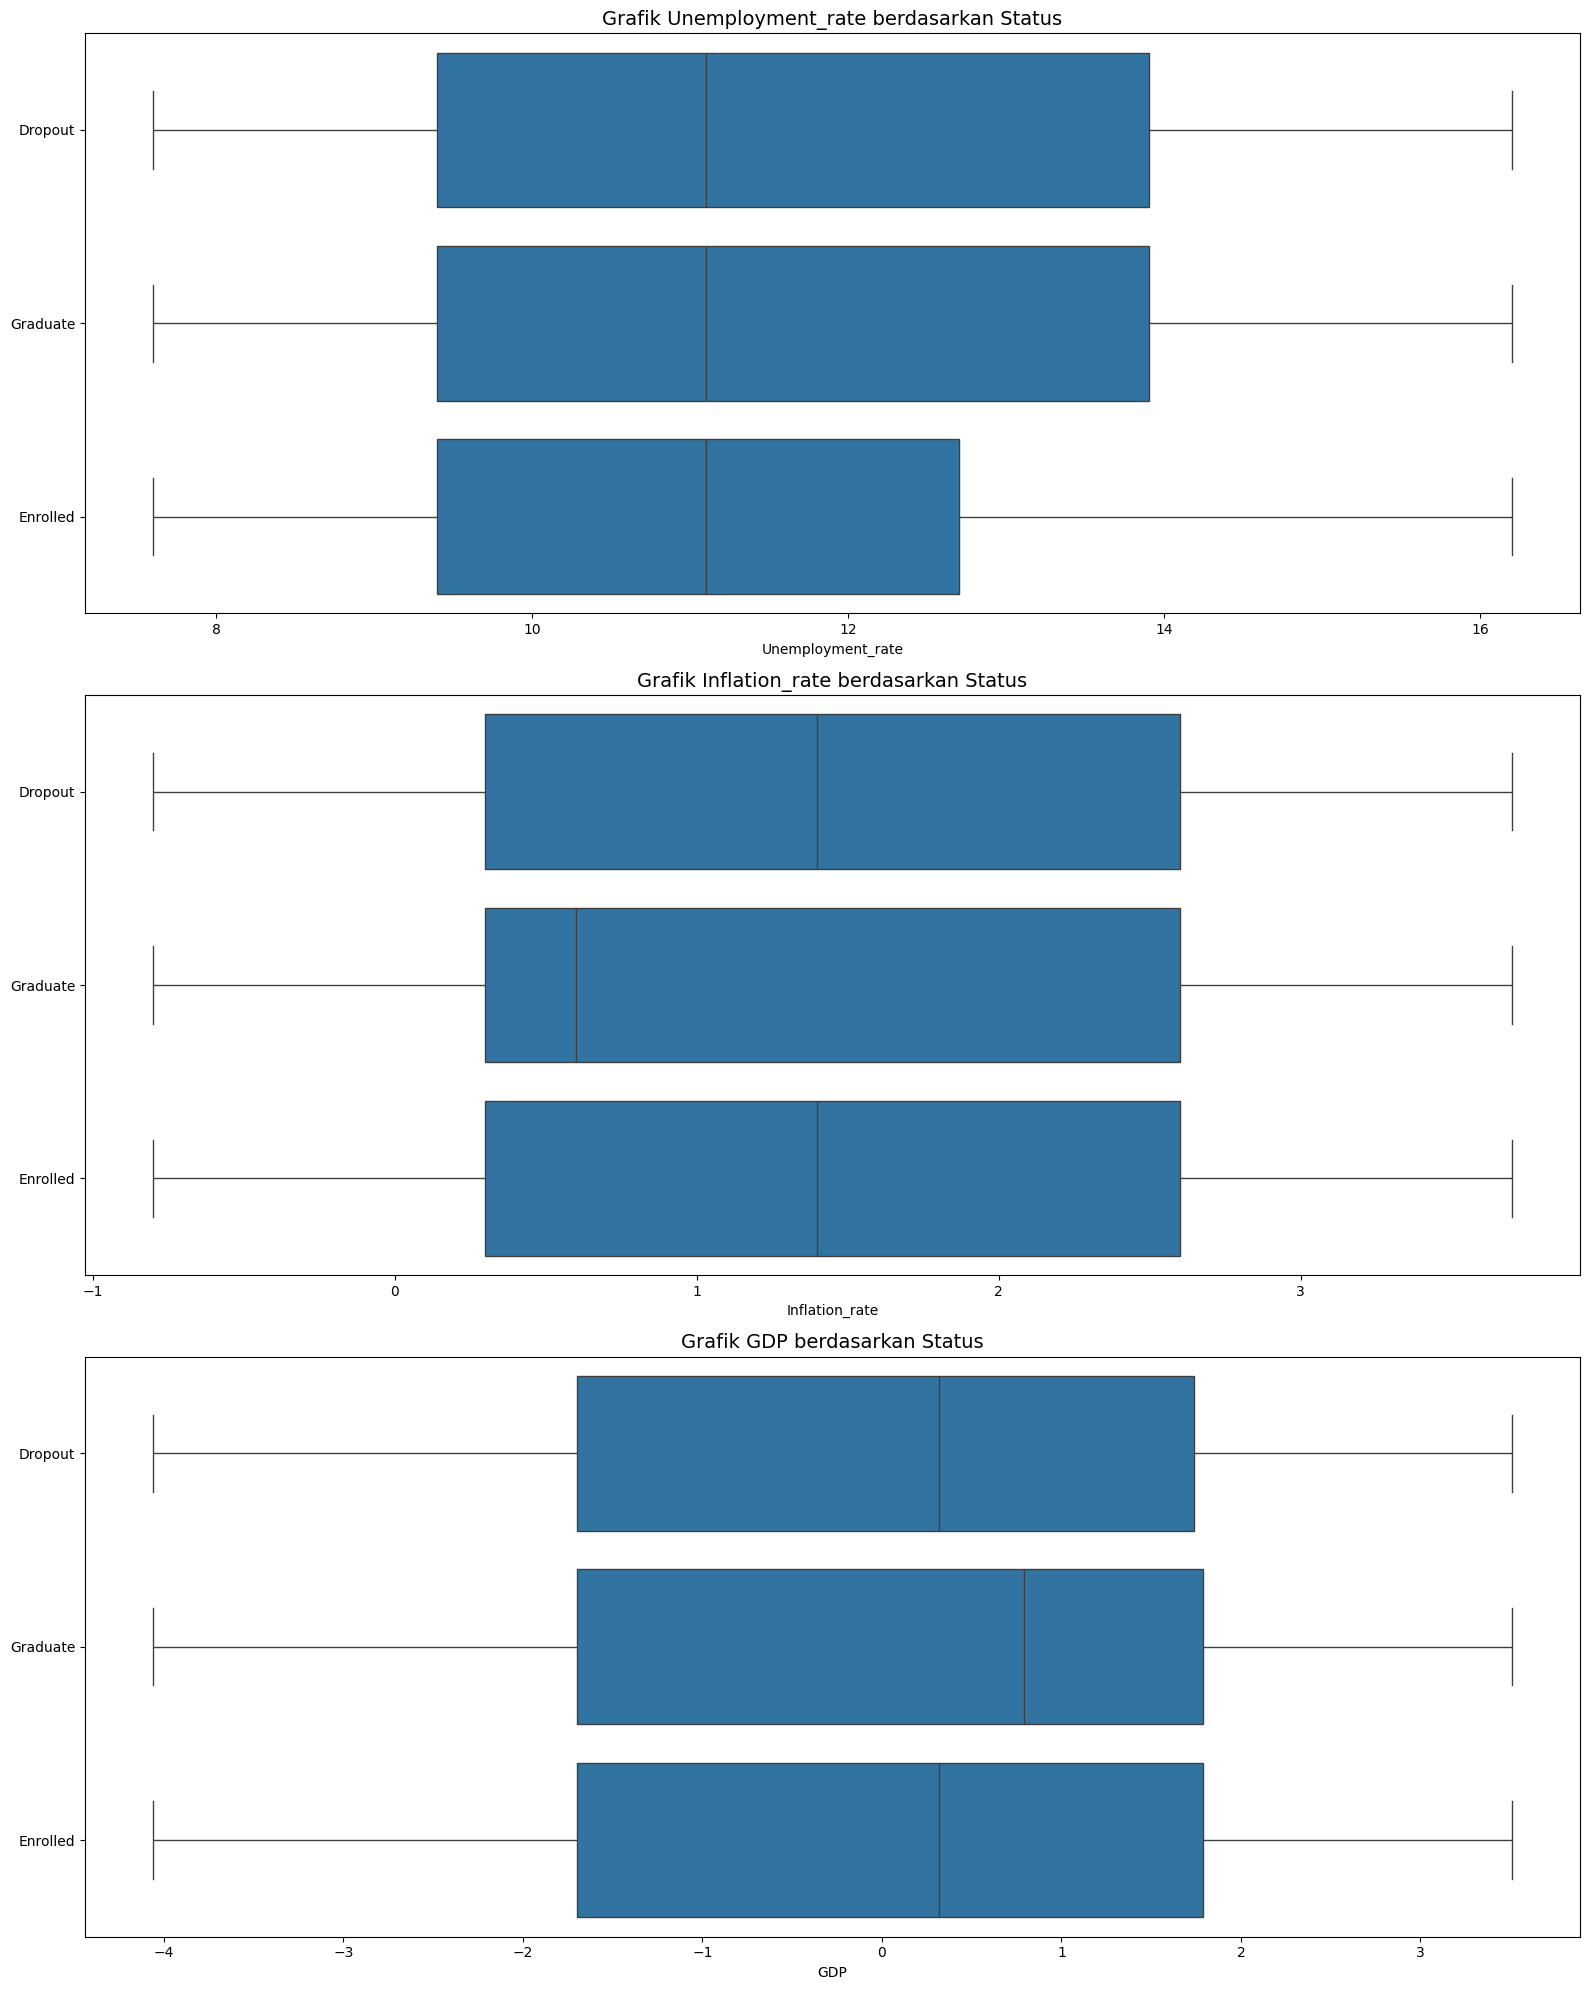

In [213]:
# 2. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Status - bgn 2
numerical_dis_plot(
    features=['Unemployment_rate', 'Inflation_rate', 'GDP'],
    df=label_df,
    segment_feature="Status"
)

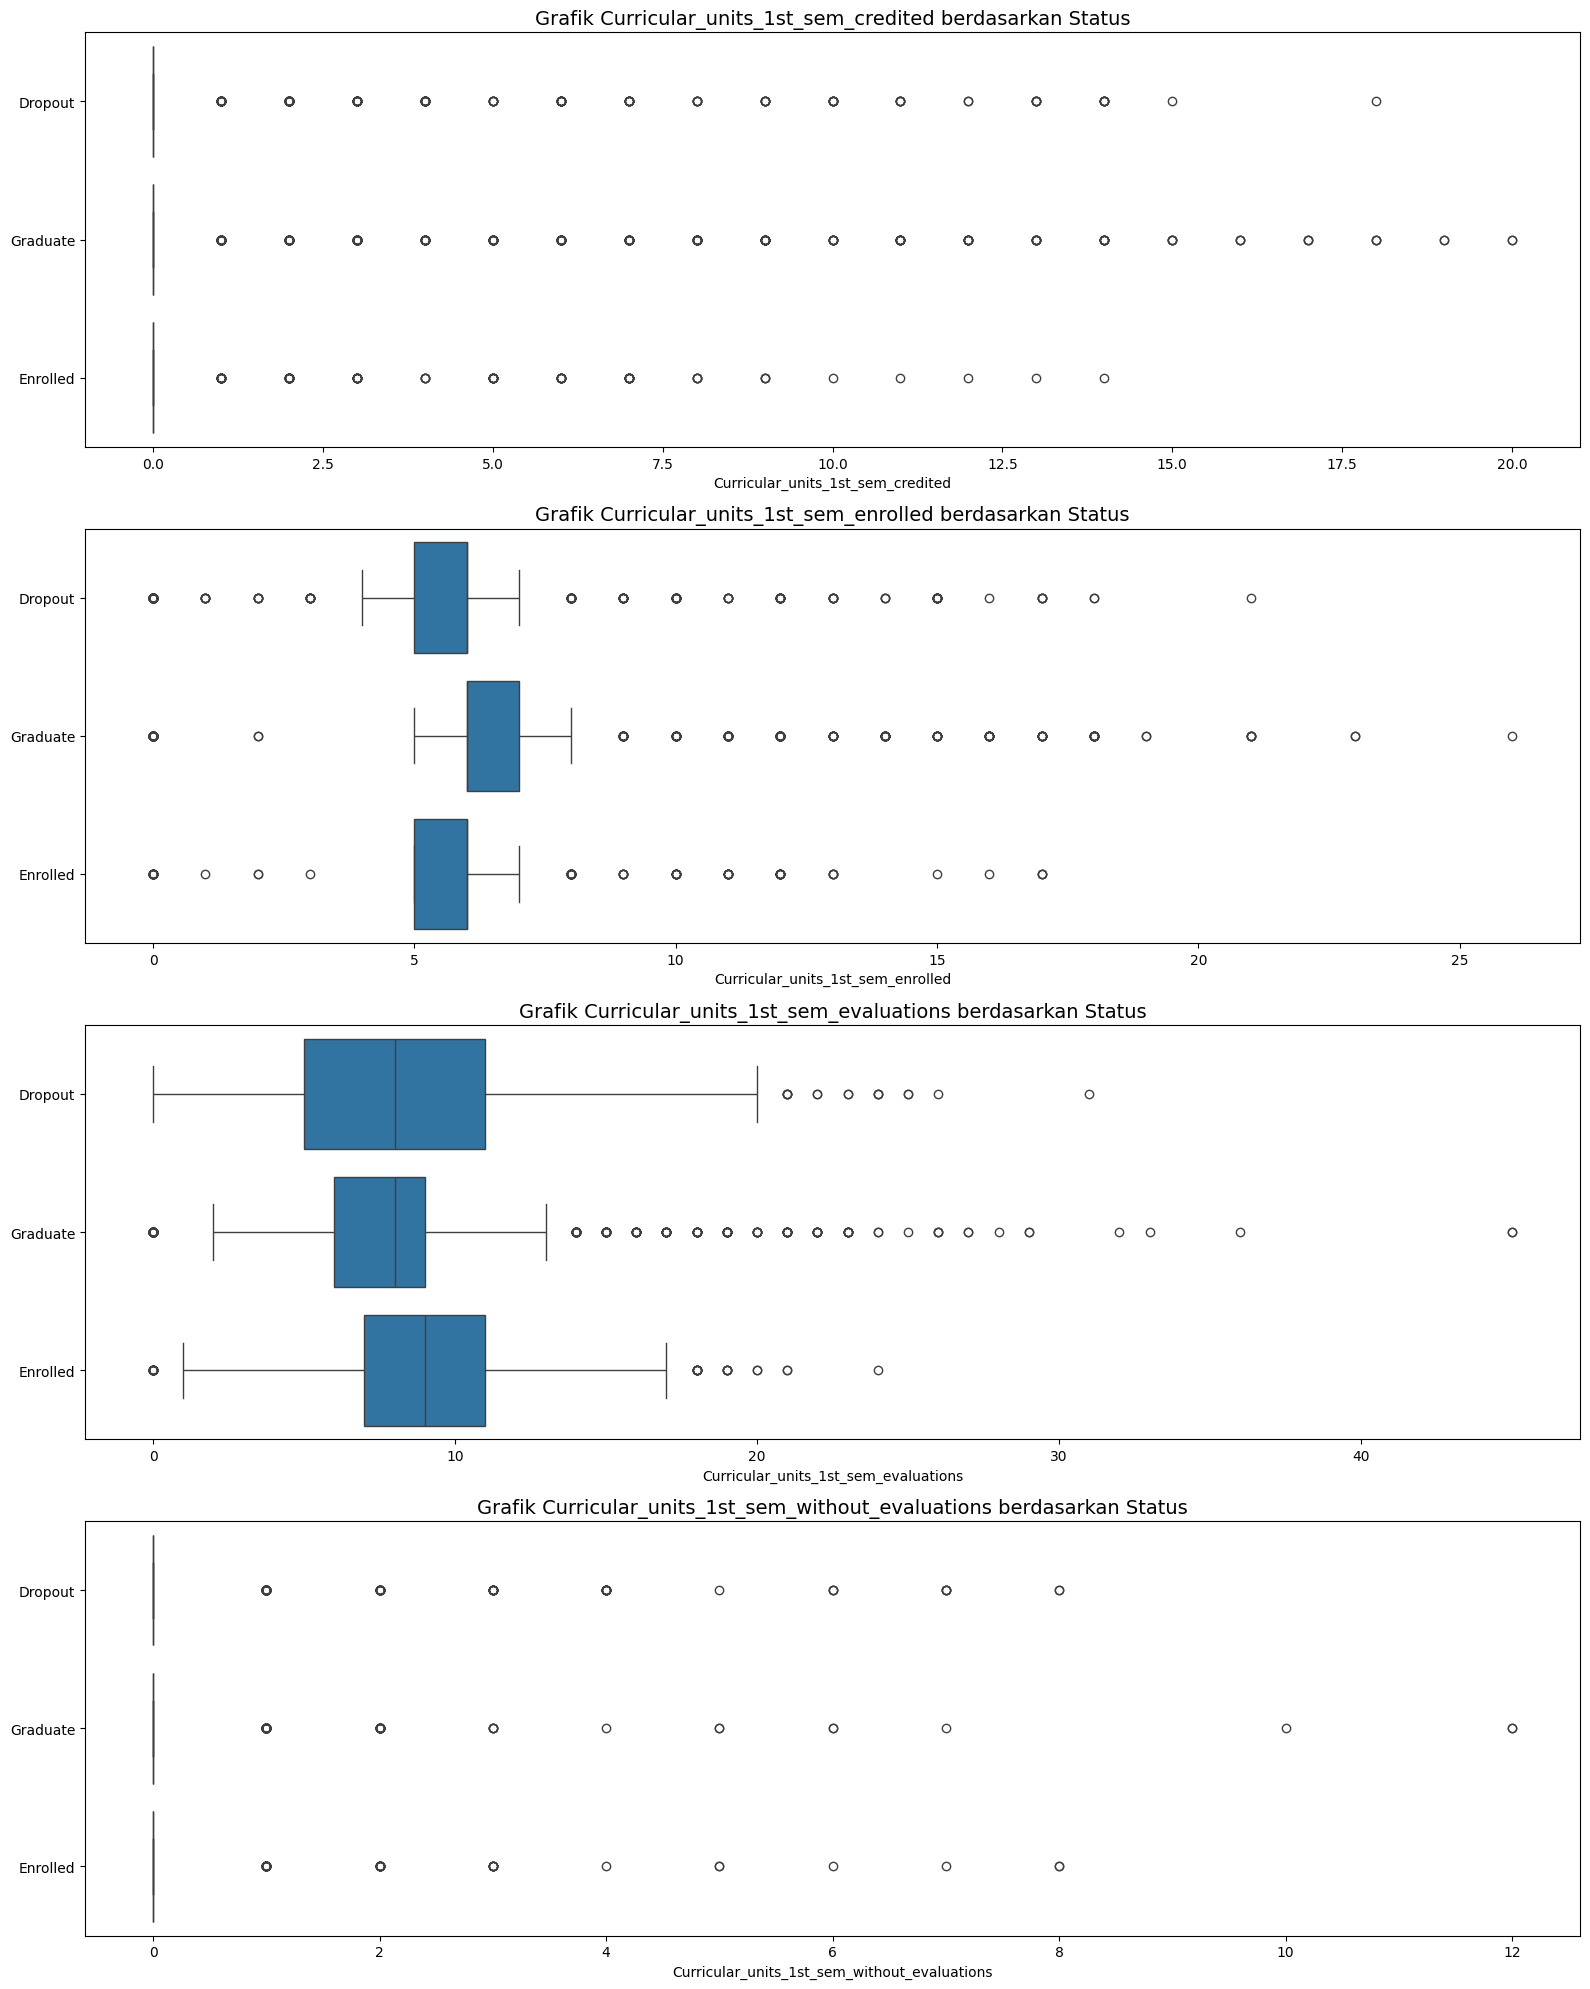

In [214]:
# 3. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Status - bgn 3
numerical_dis_plot(
    features=['Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_without_evaluations'],
    df=label_df,
    segment_feature="Status"
)

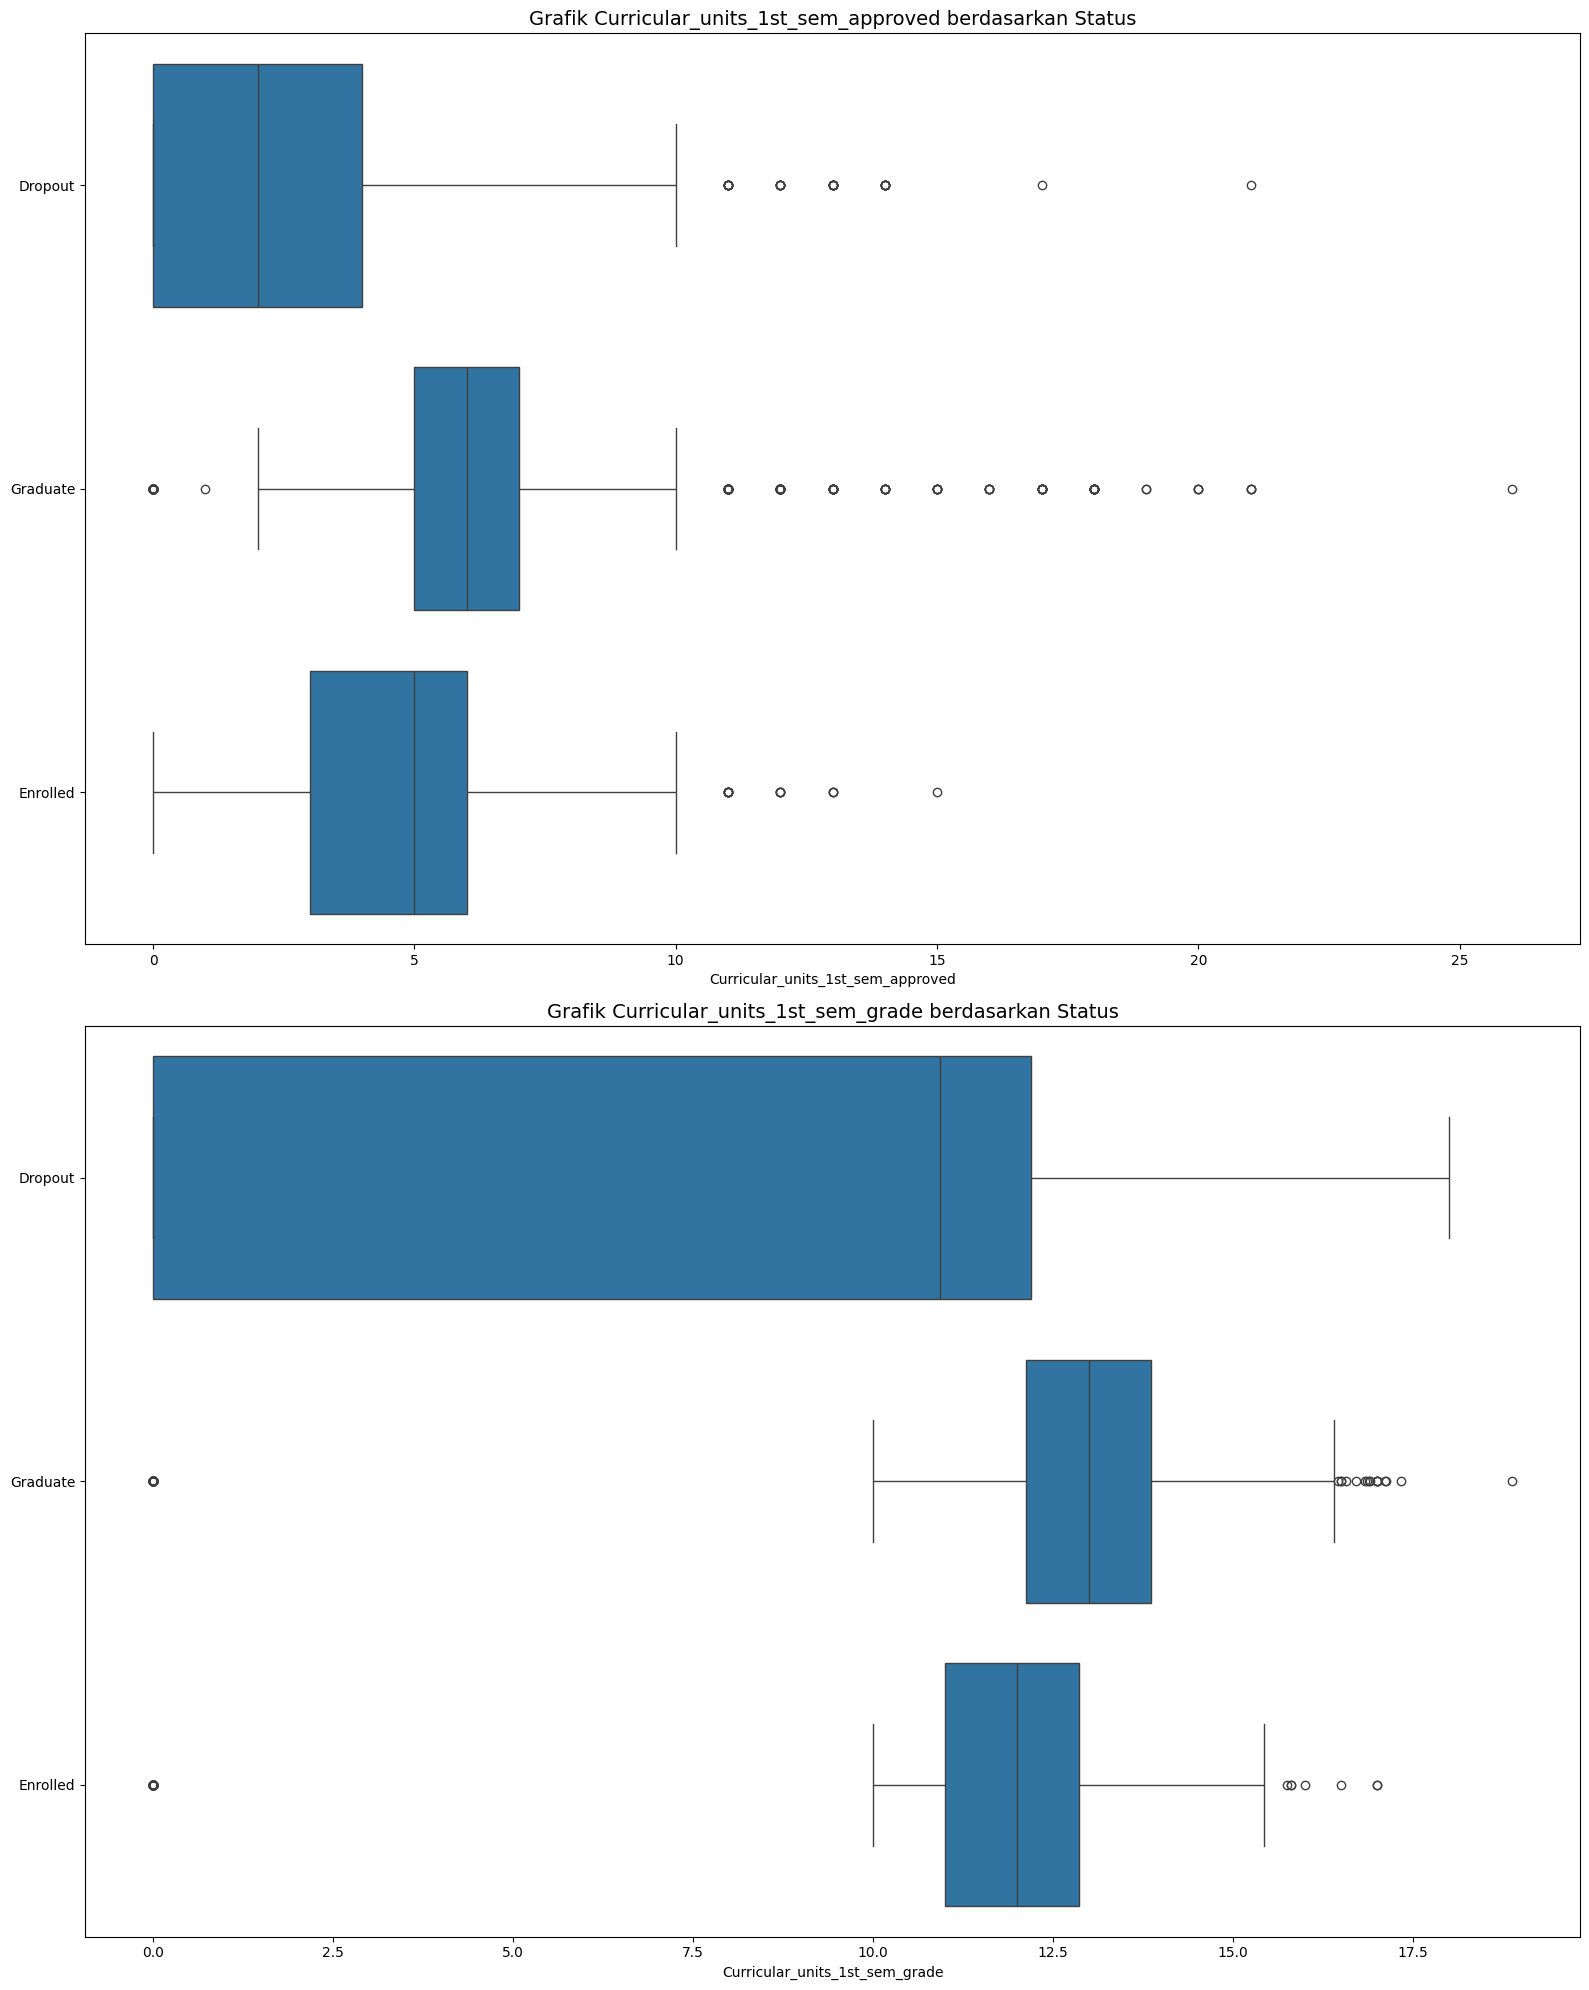

In [215]:
# 4. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Status - bgn 4
numerical_dis_plot(
    features=['Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade'],
    df=label_df,
    segment_feature="Status"
)

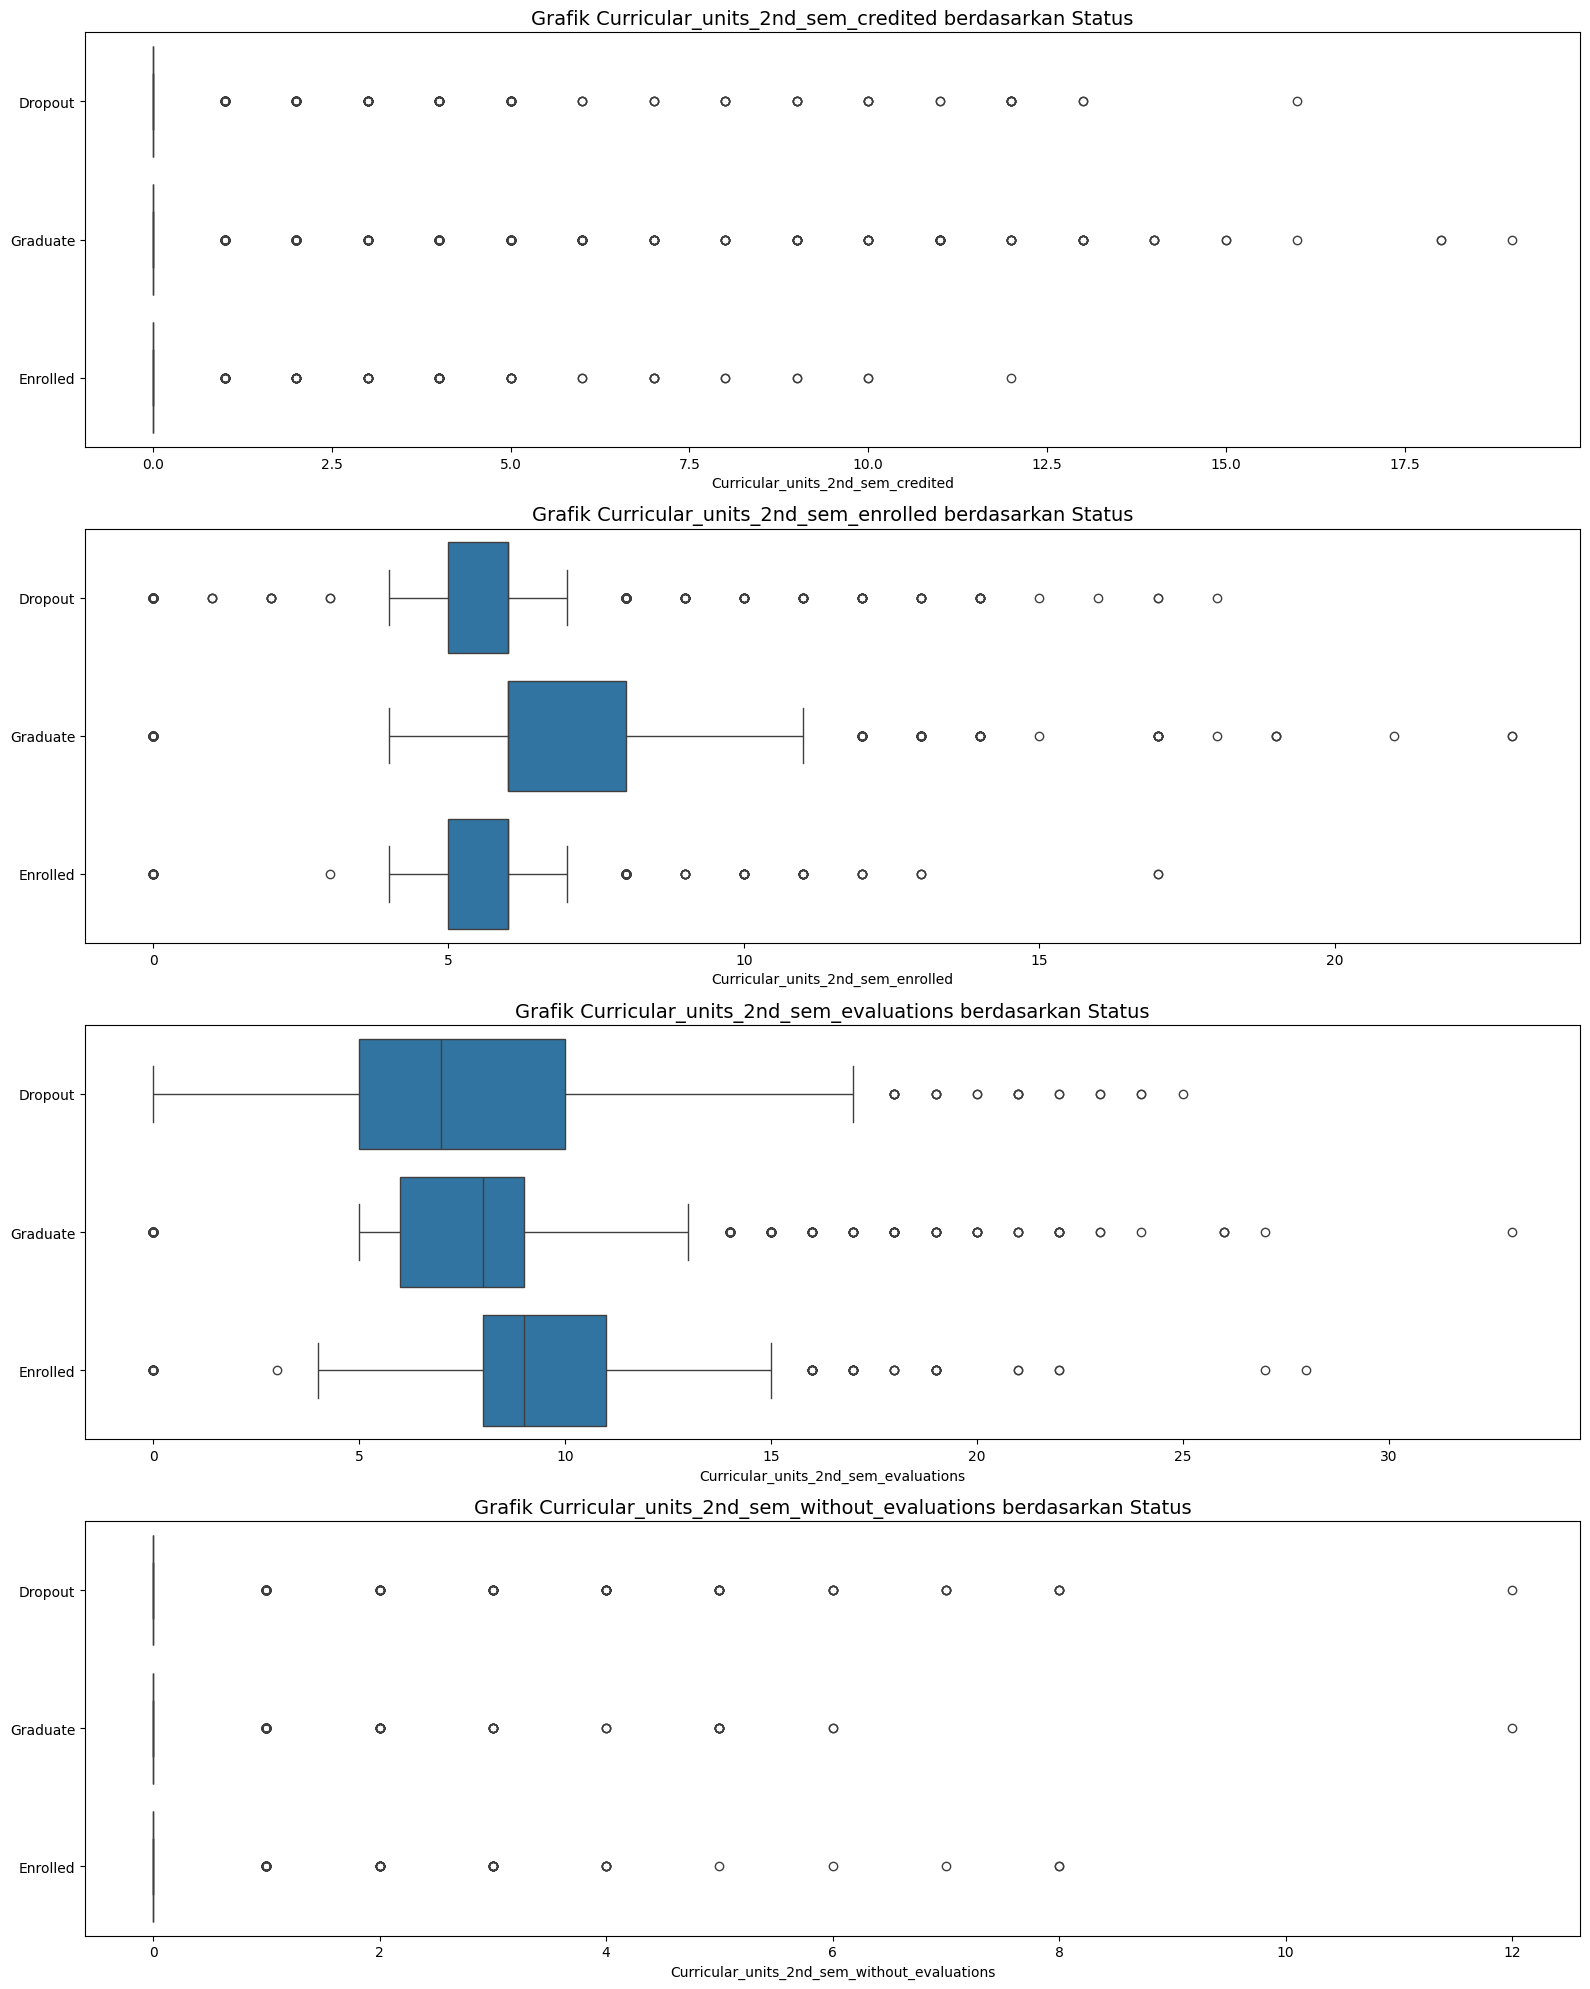

In [216]:
# 5. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Status - bgn 5
numerical_dis_plot(
    features=['Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_without_evaluations'],
    df=label_df,
    segment_feature="Status"
)

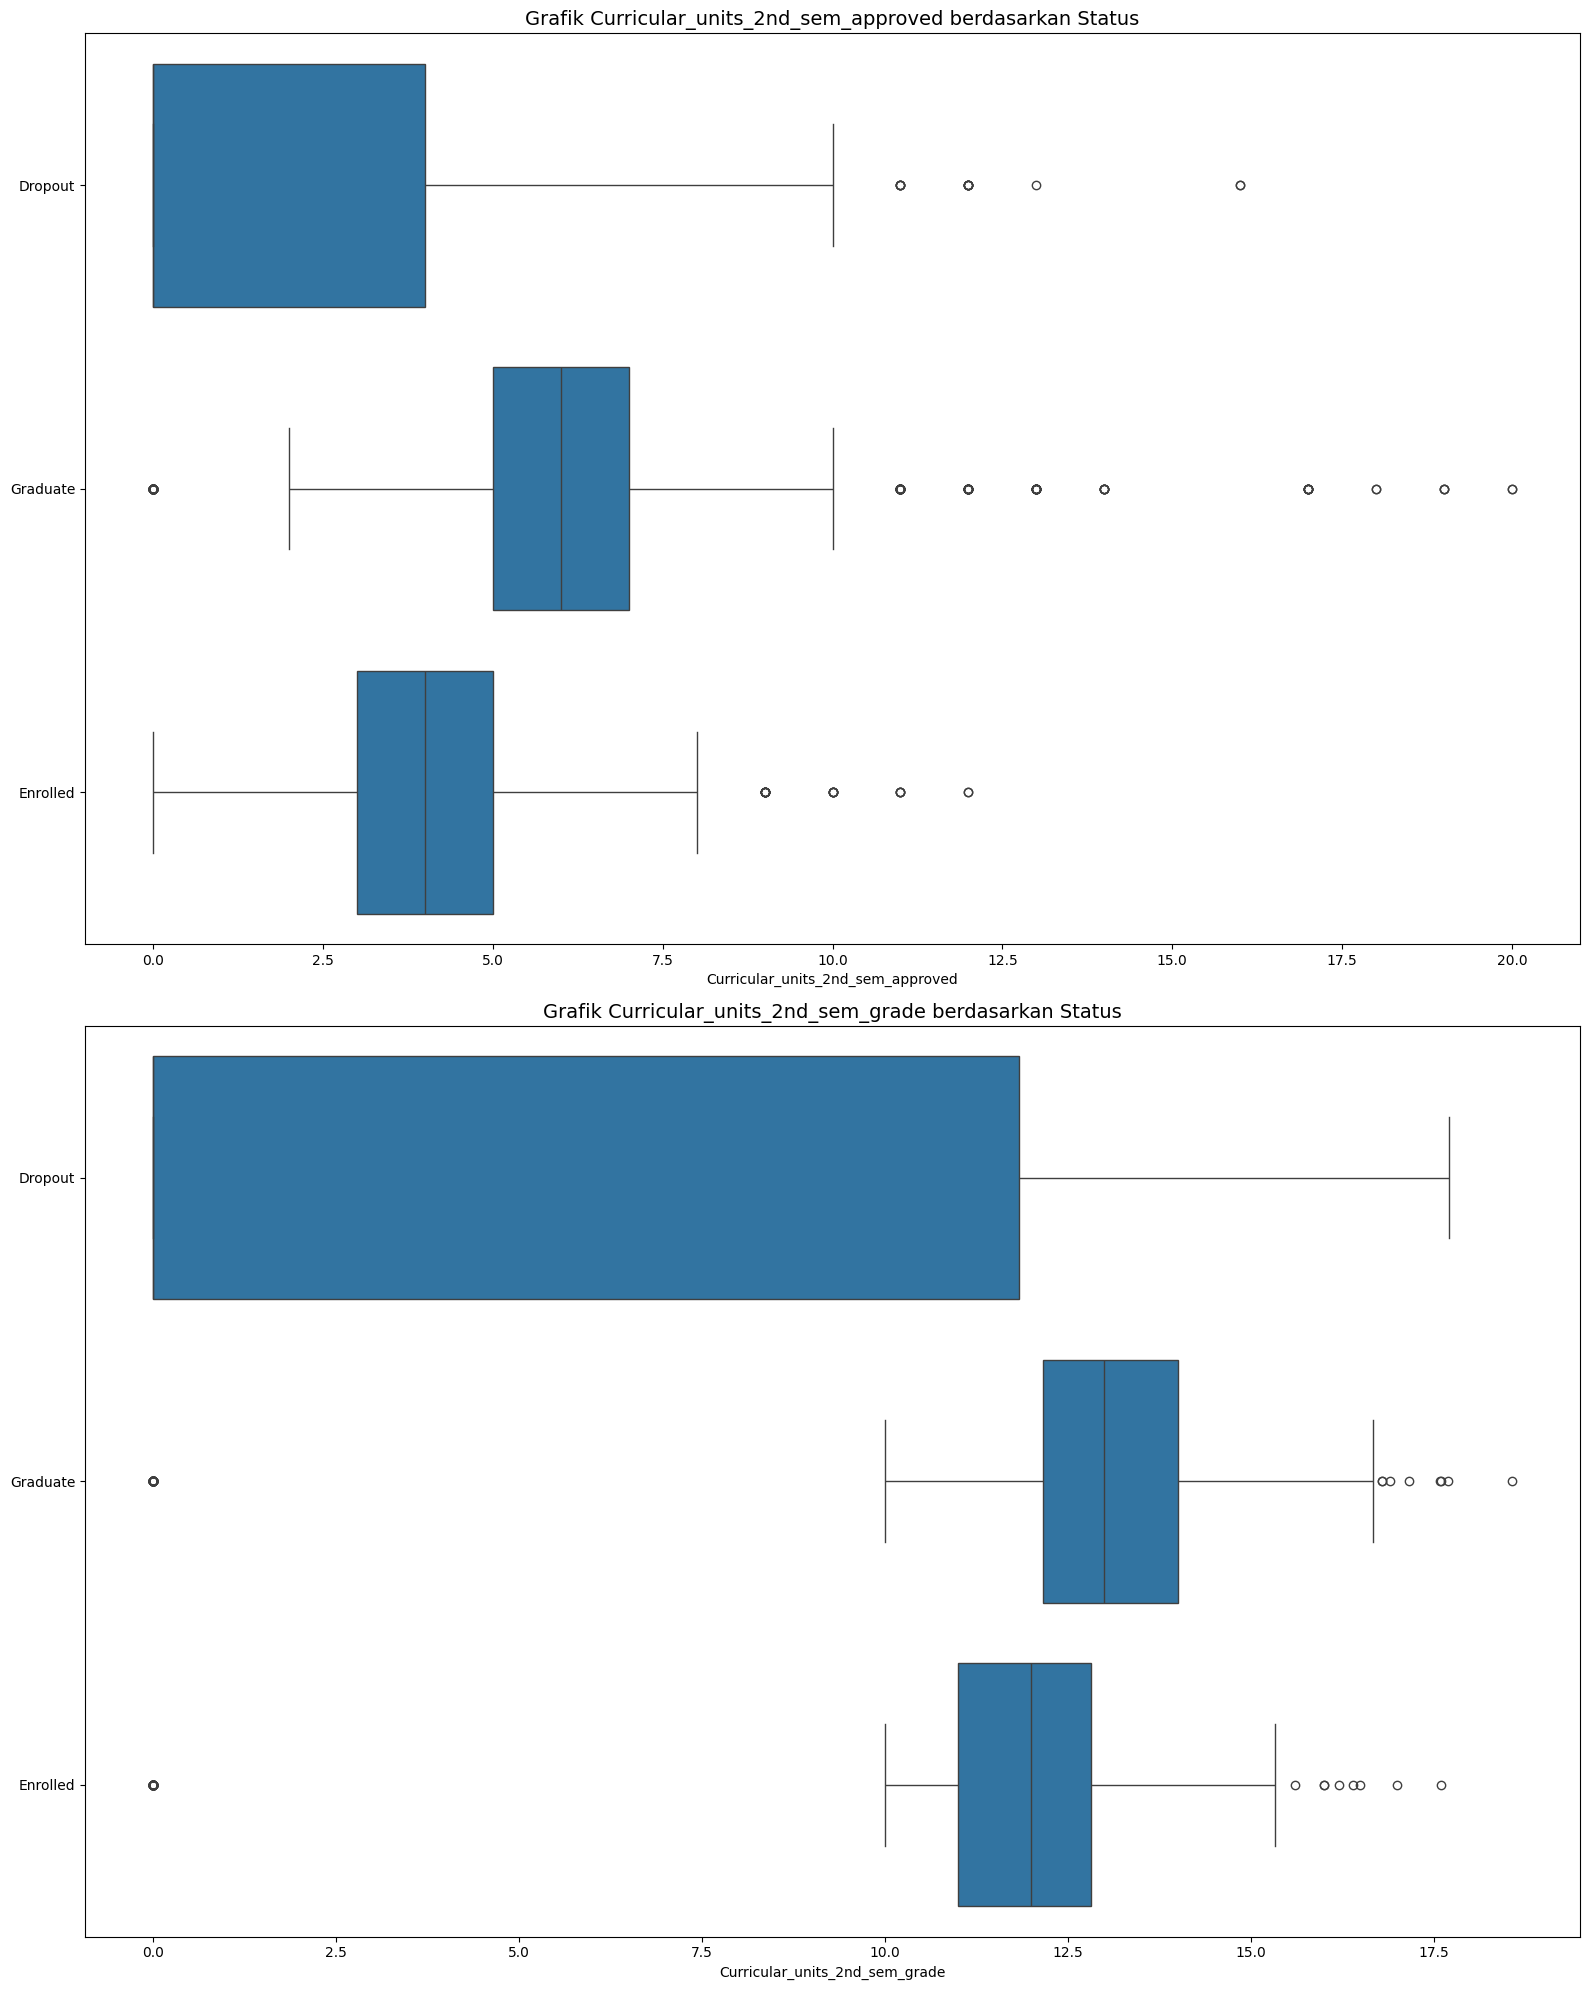

In [217]:
# 6. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Status - bgn 6
numerical_dis_plot(
    features=['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'],
    df=label_df,
    segment_feature="Status"
)

##### Distribusi Fitur Numerik berdasarkan Fitur Marital_Status

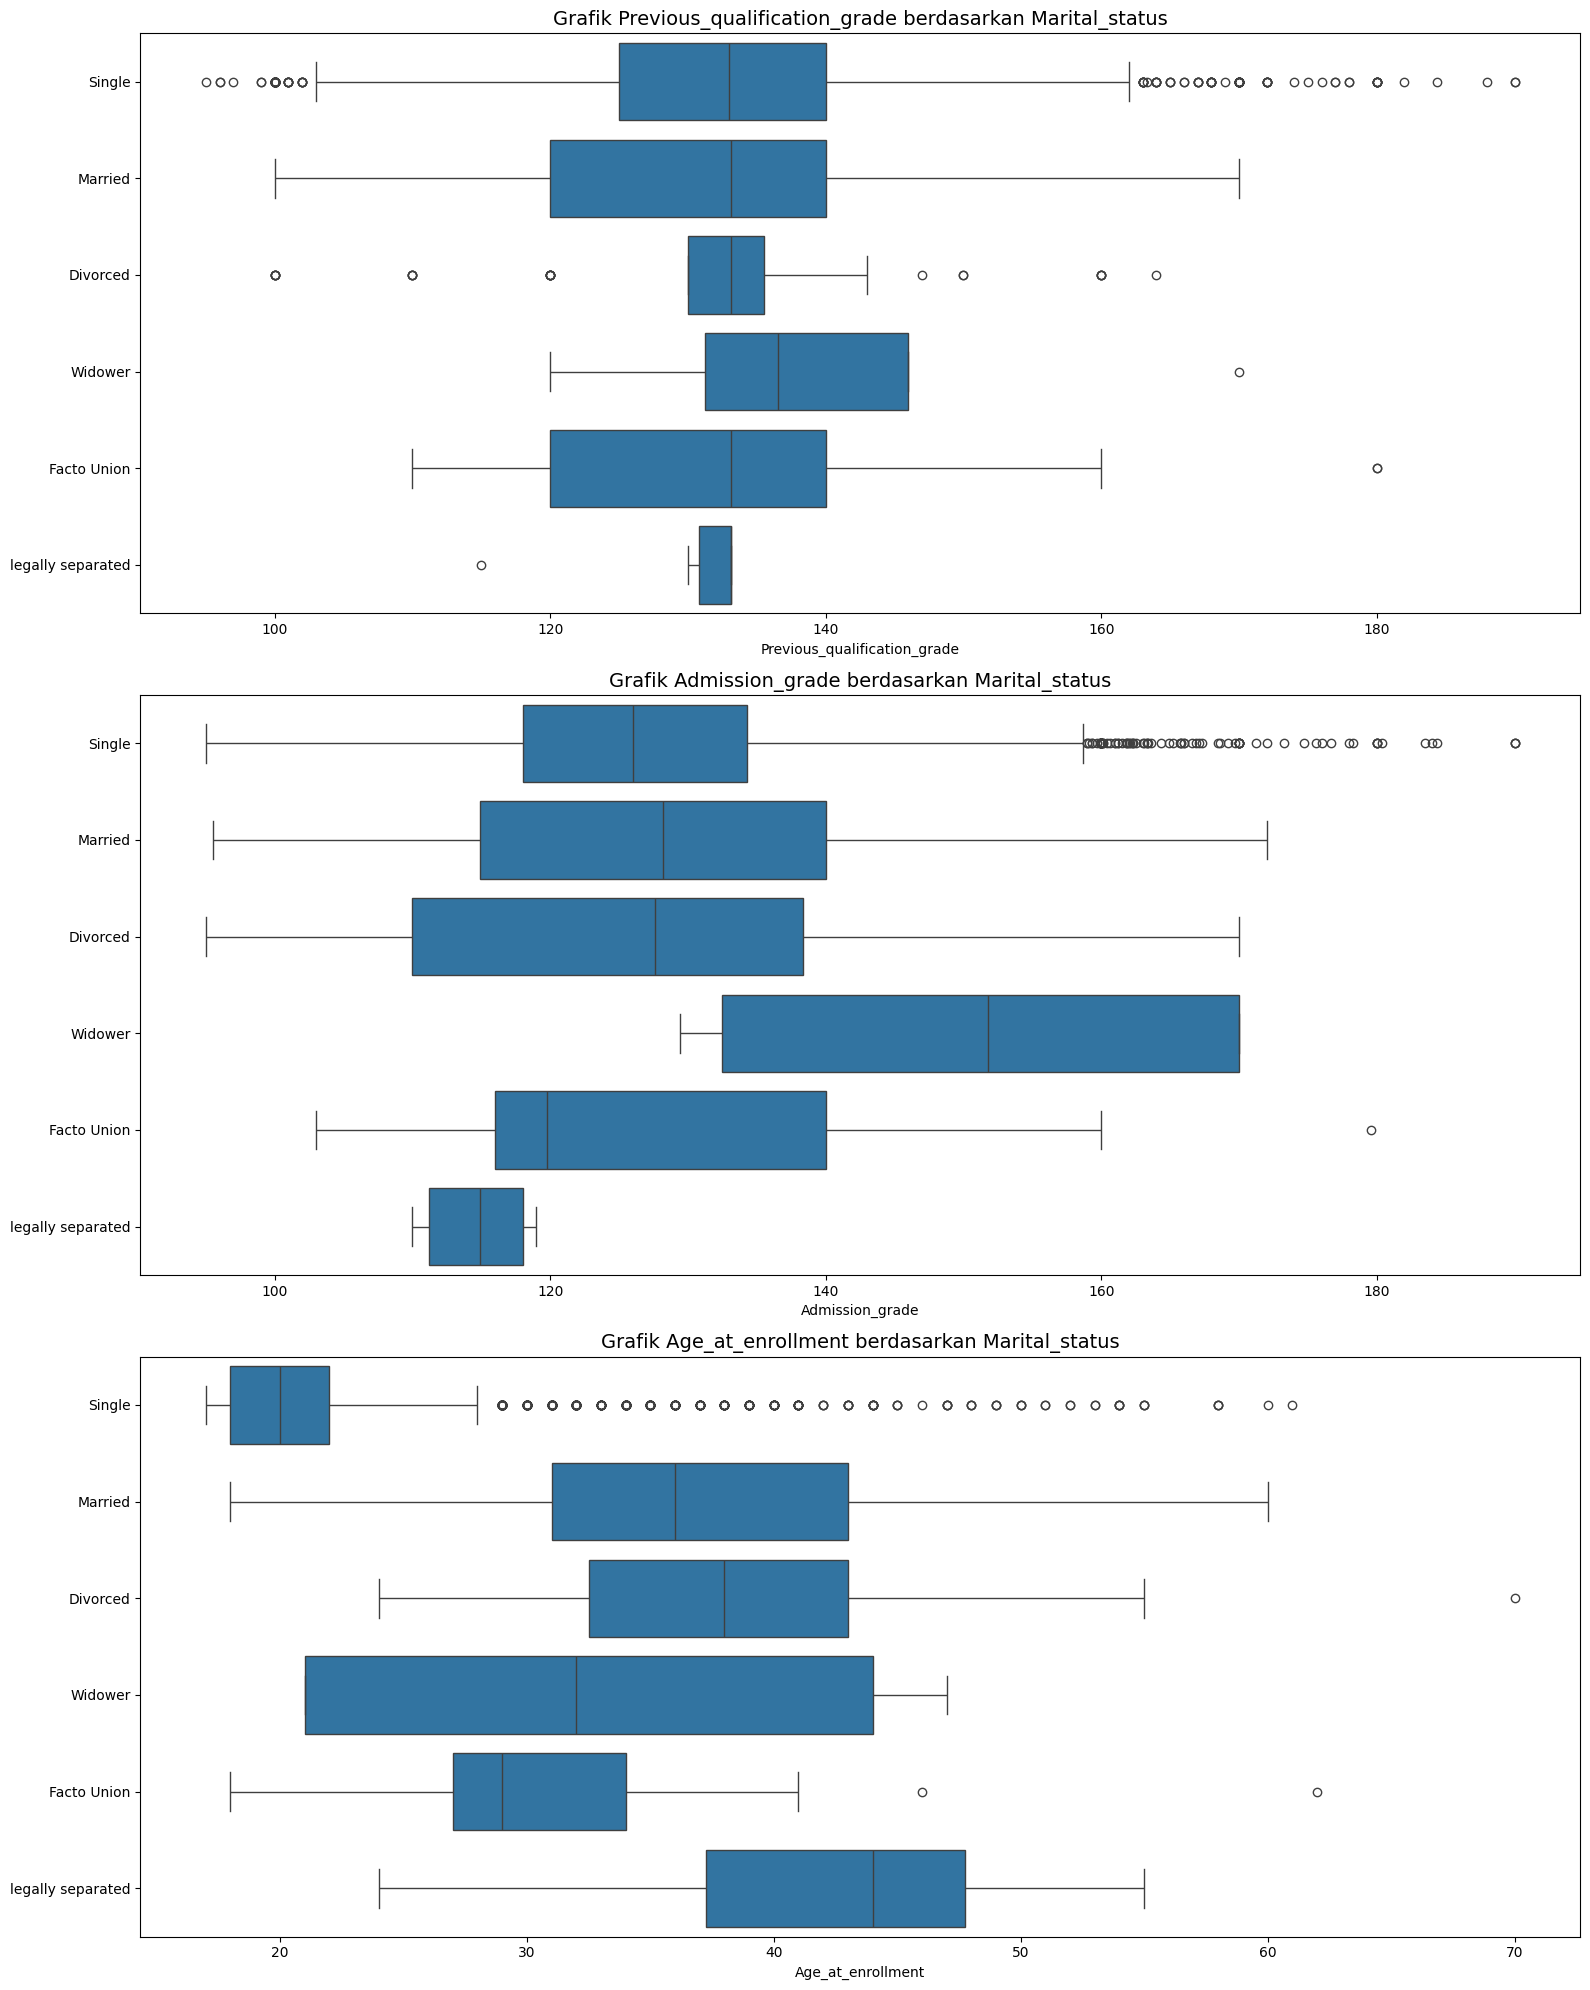

In [218]:
# 1. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Marital_status - bgn 1
numerical_dis_plot(
    features=["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment"],
    df=label_df,
    segment_feature="Marital_status"
)

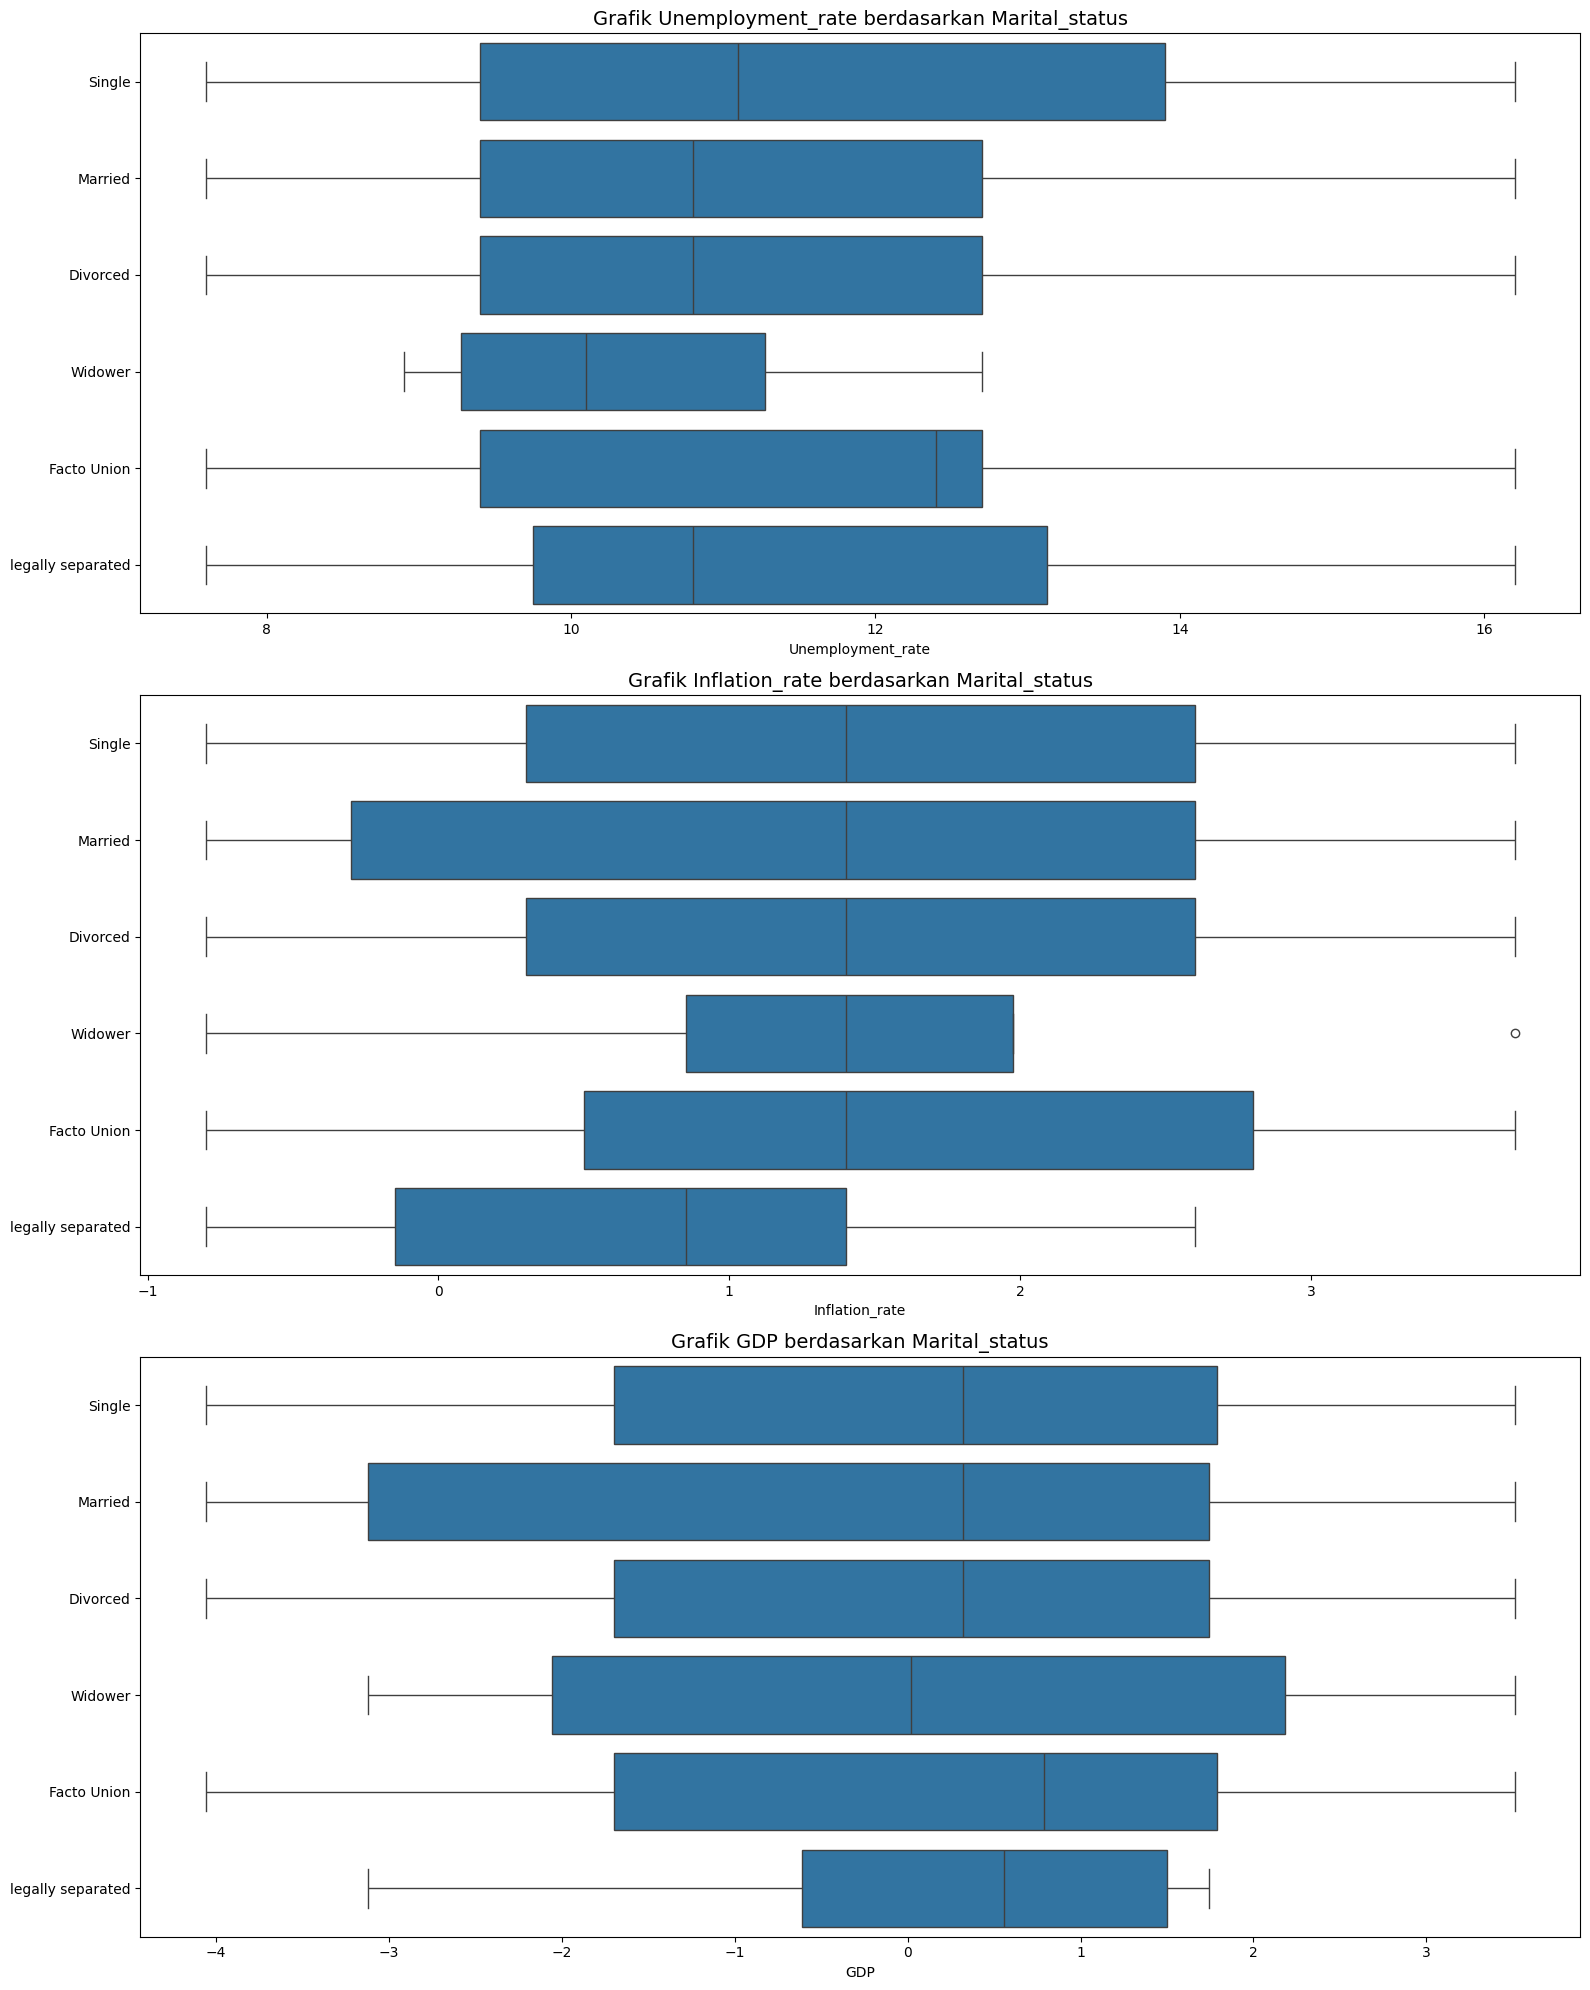

In [219]:
# 2. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Marital_status - bgn 2
numerical_dis_plot(
    features=['Unemployment_rate', 'Inflation_rate', 'GDP'],
    df=label_df,
    segment_feature="Marital_status"
)

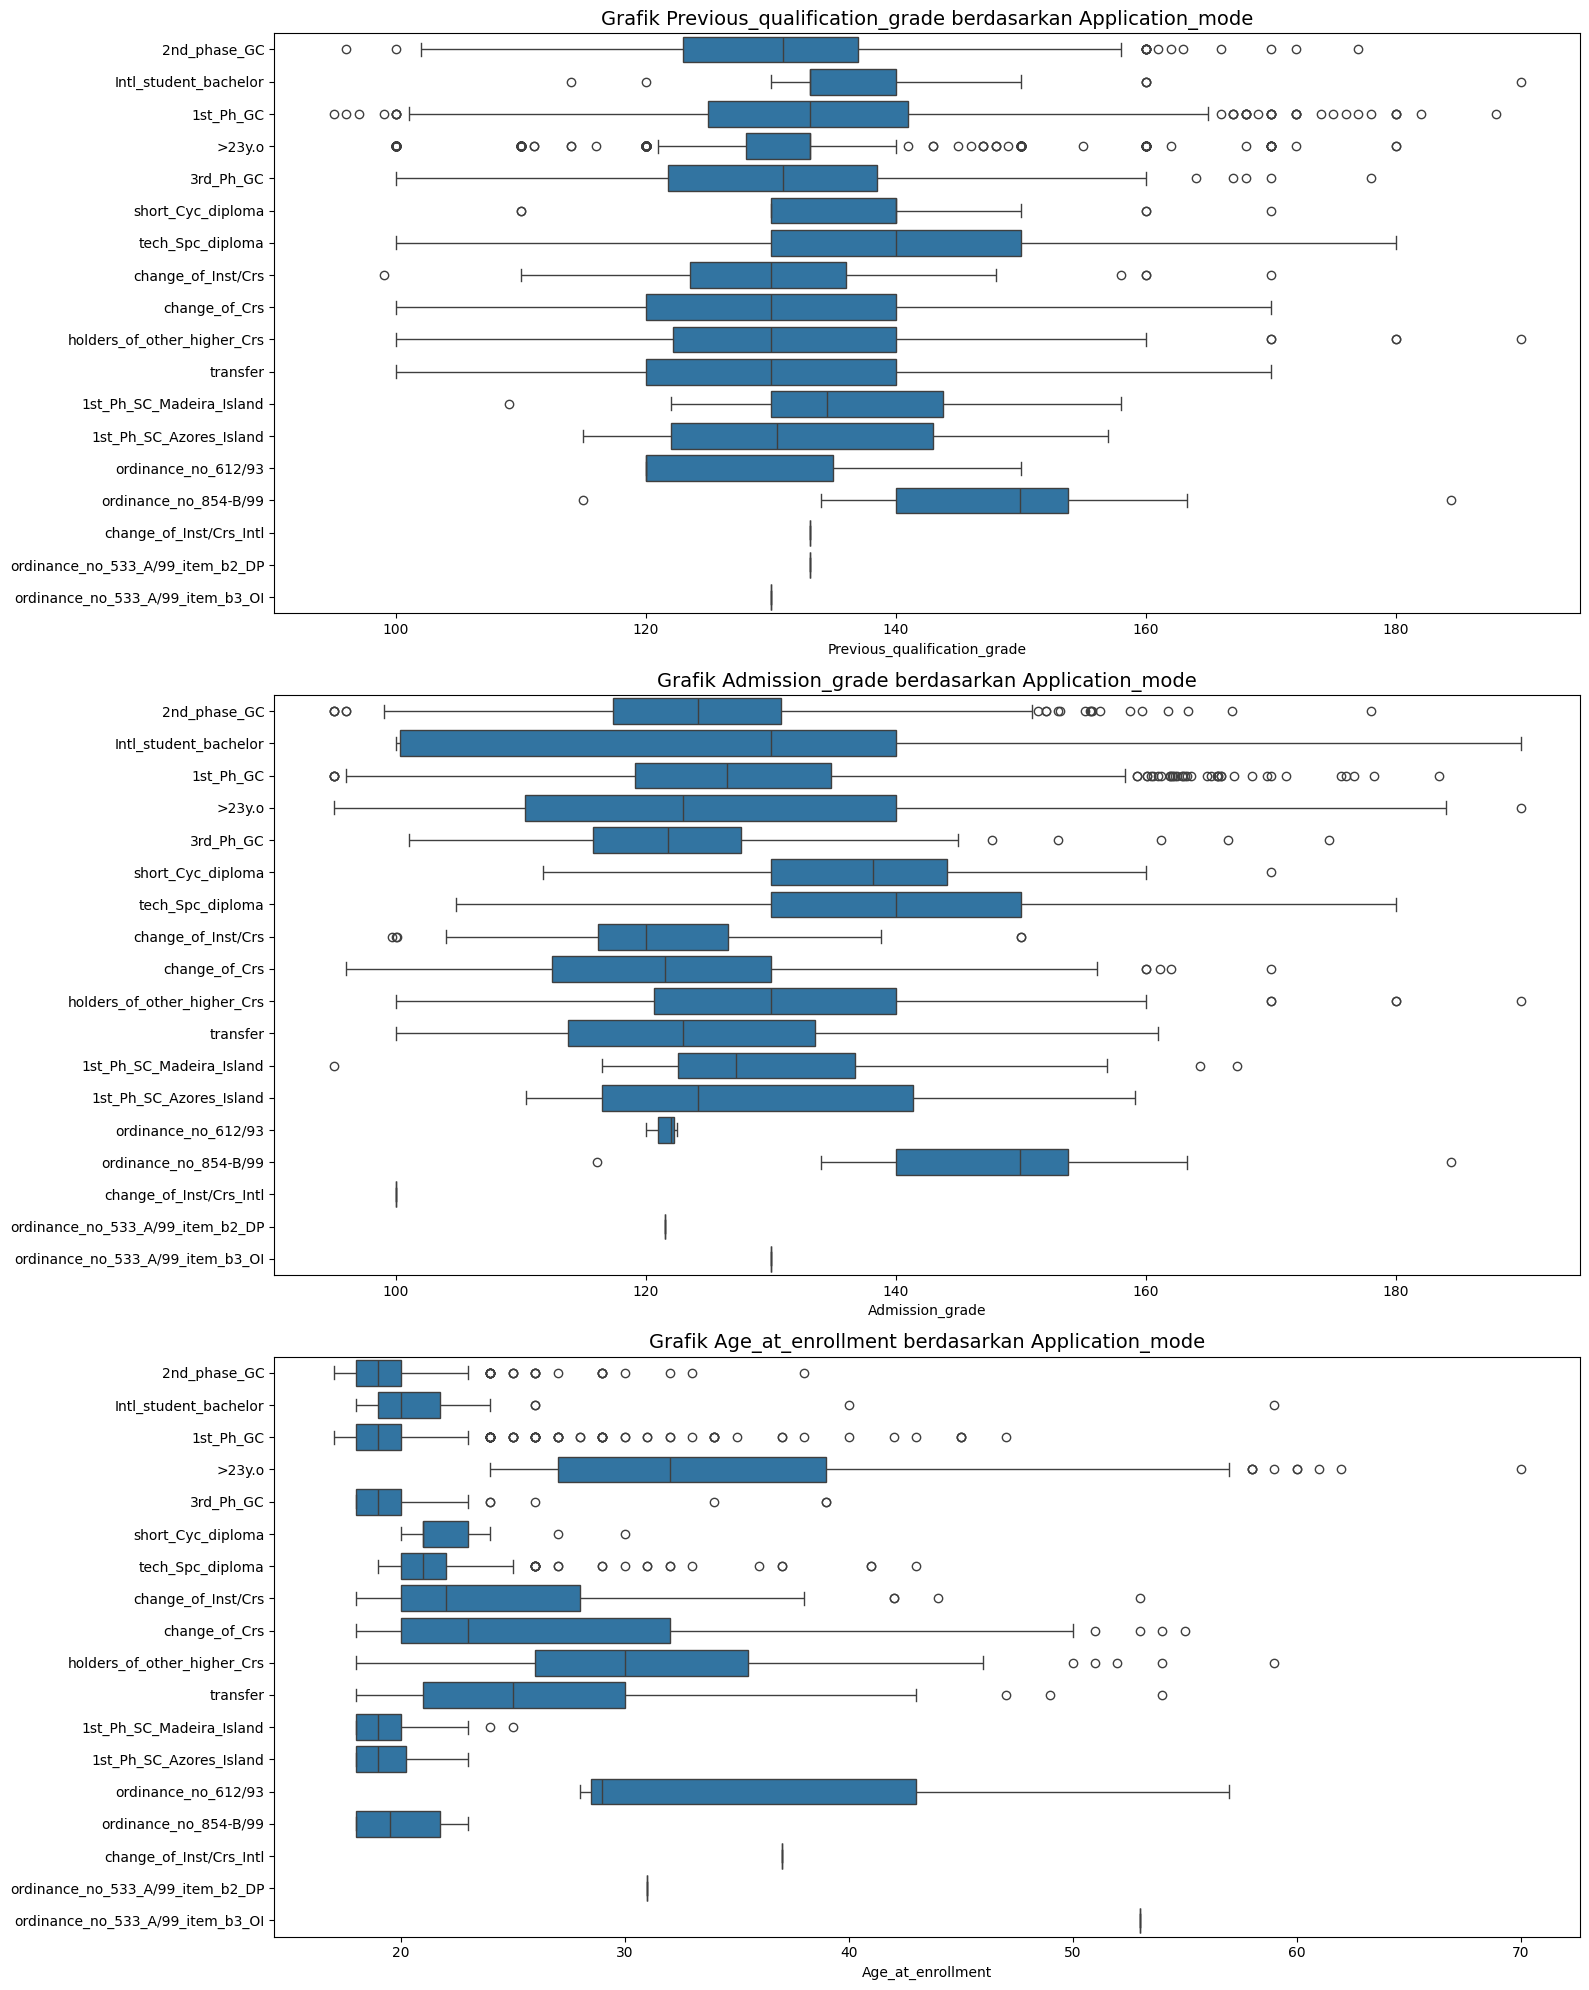

In [220]:
# 1. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Application_mode
numerical_dis_plot(
    features=["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment"],
    df=label_df,
    segment_feature="Application_mode"
)

##### Distribusi Fitur Numerik berdasarkan beberapa Fitur kategorikal

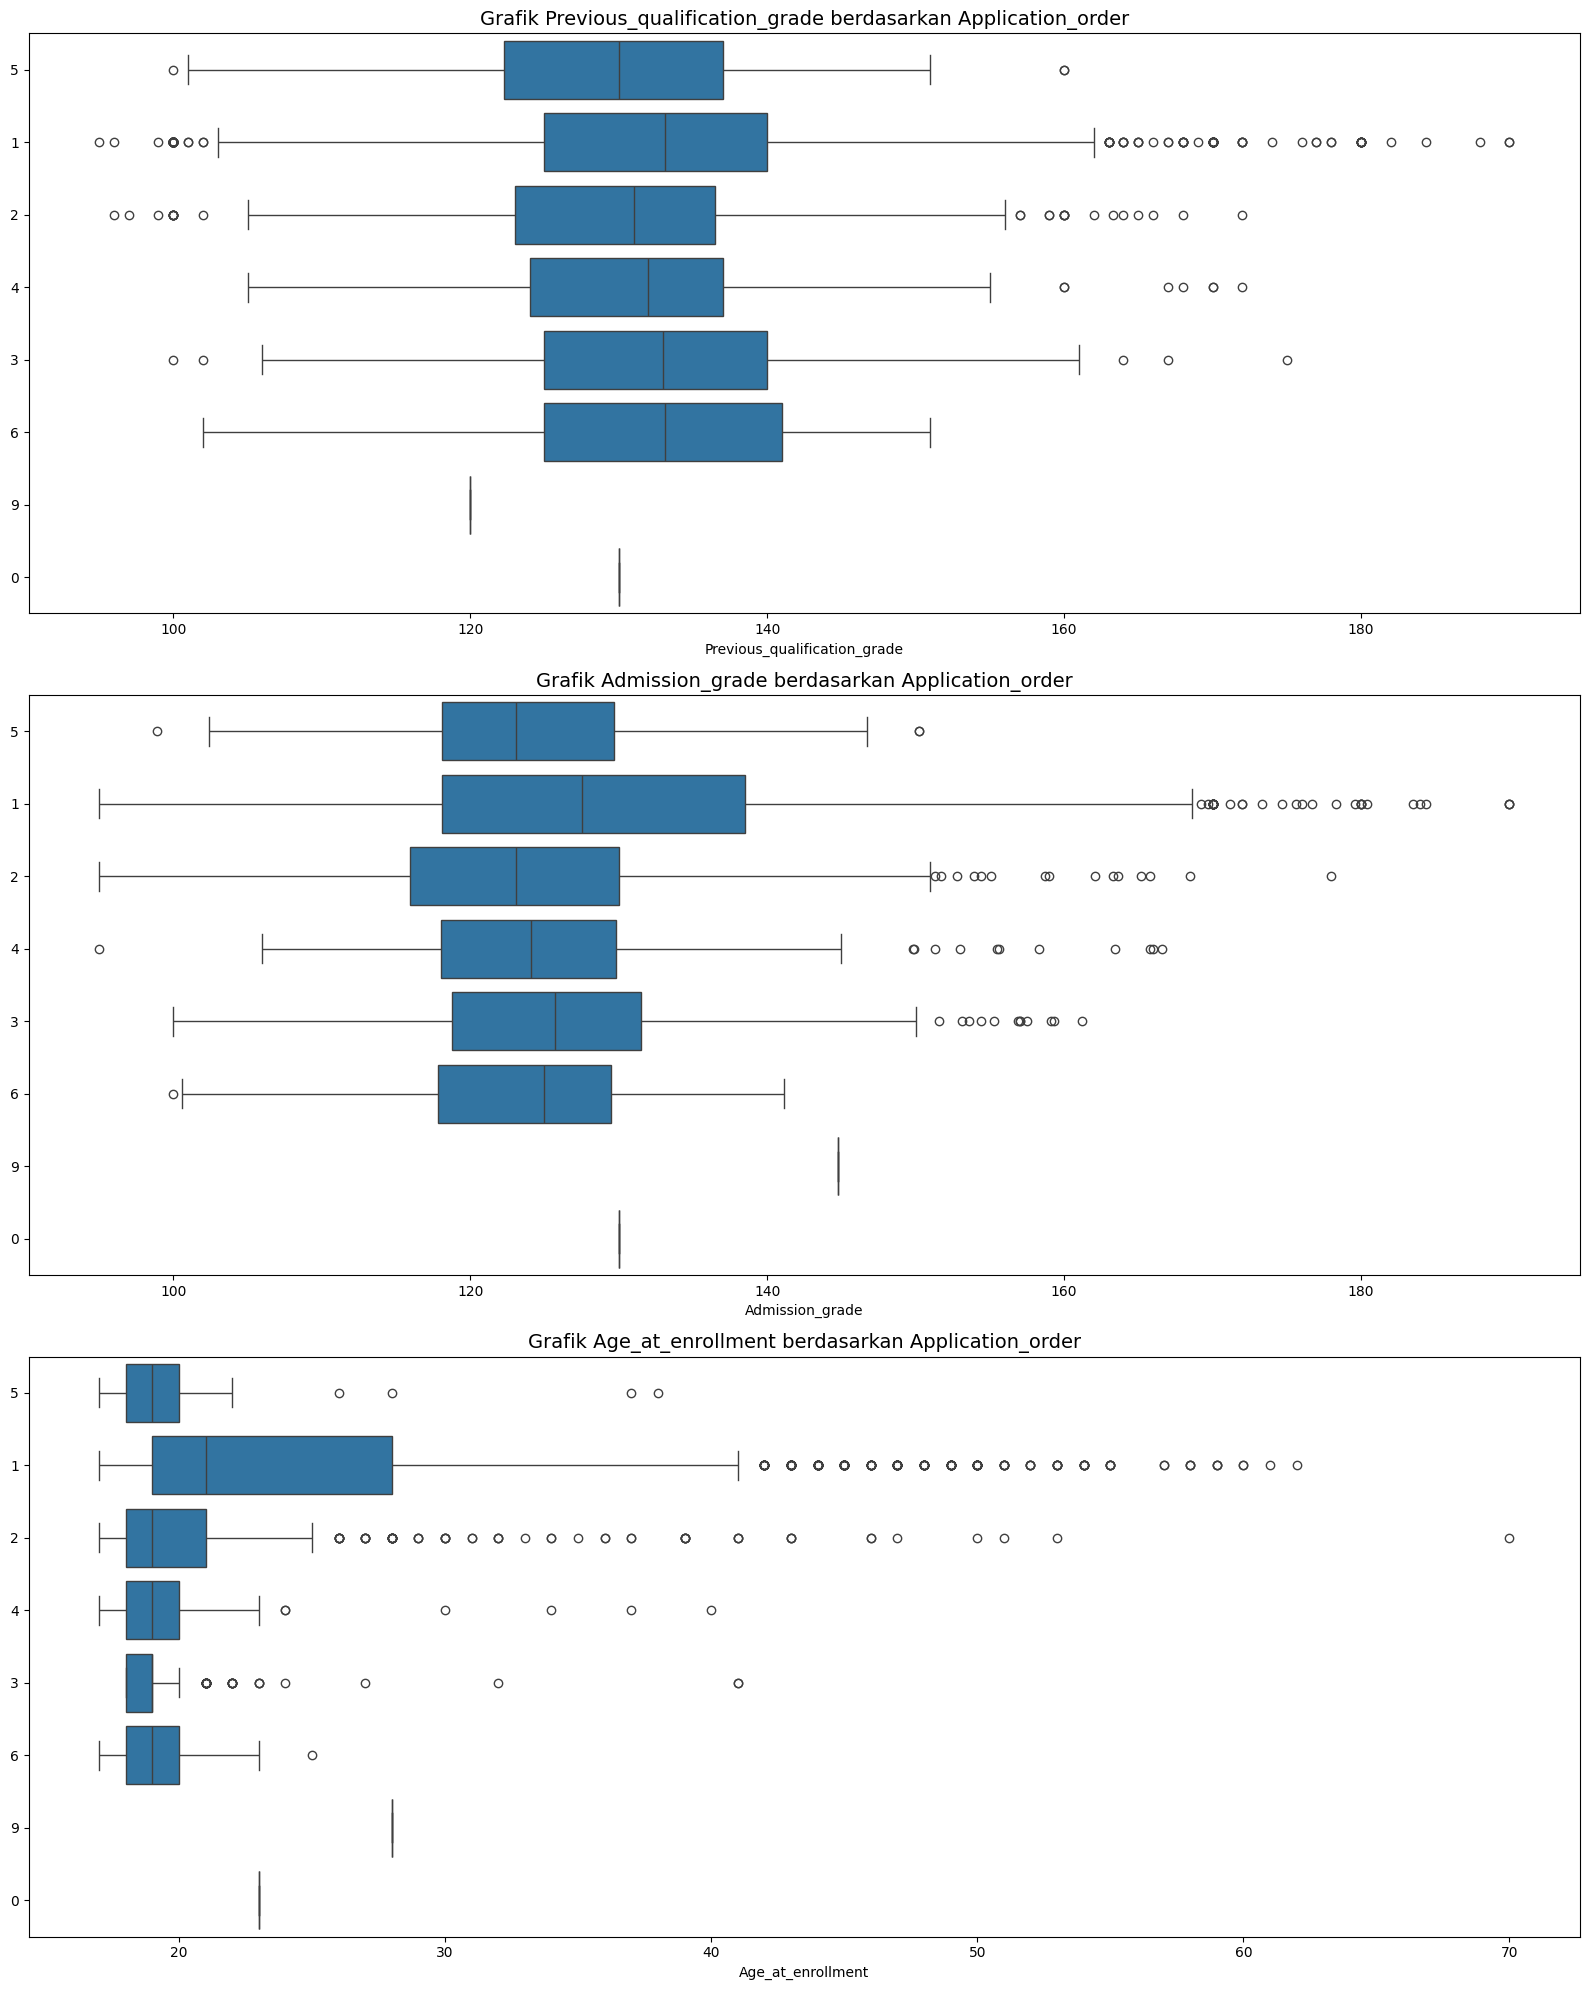

In [221]:
# 1. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Application_order
numerical_dis_plot(
    features=["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment"],
    df=label_df,
    segment_feature="Application_order"
)

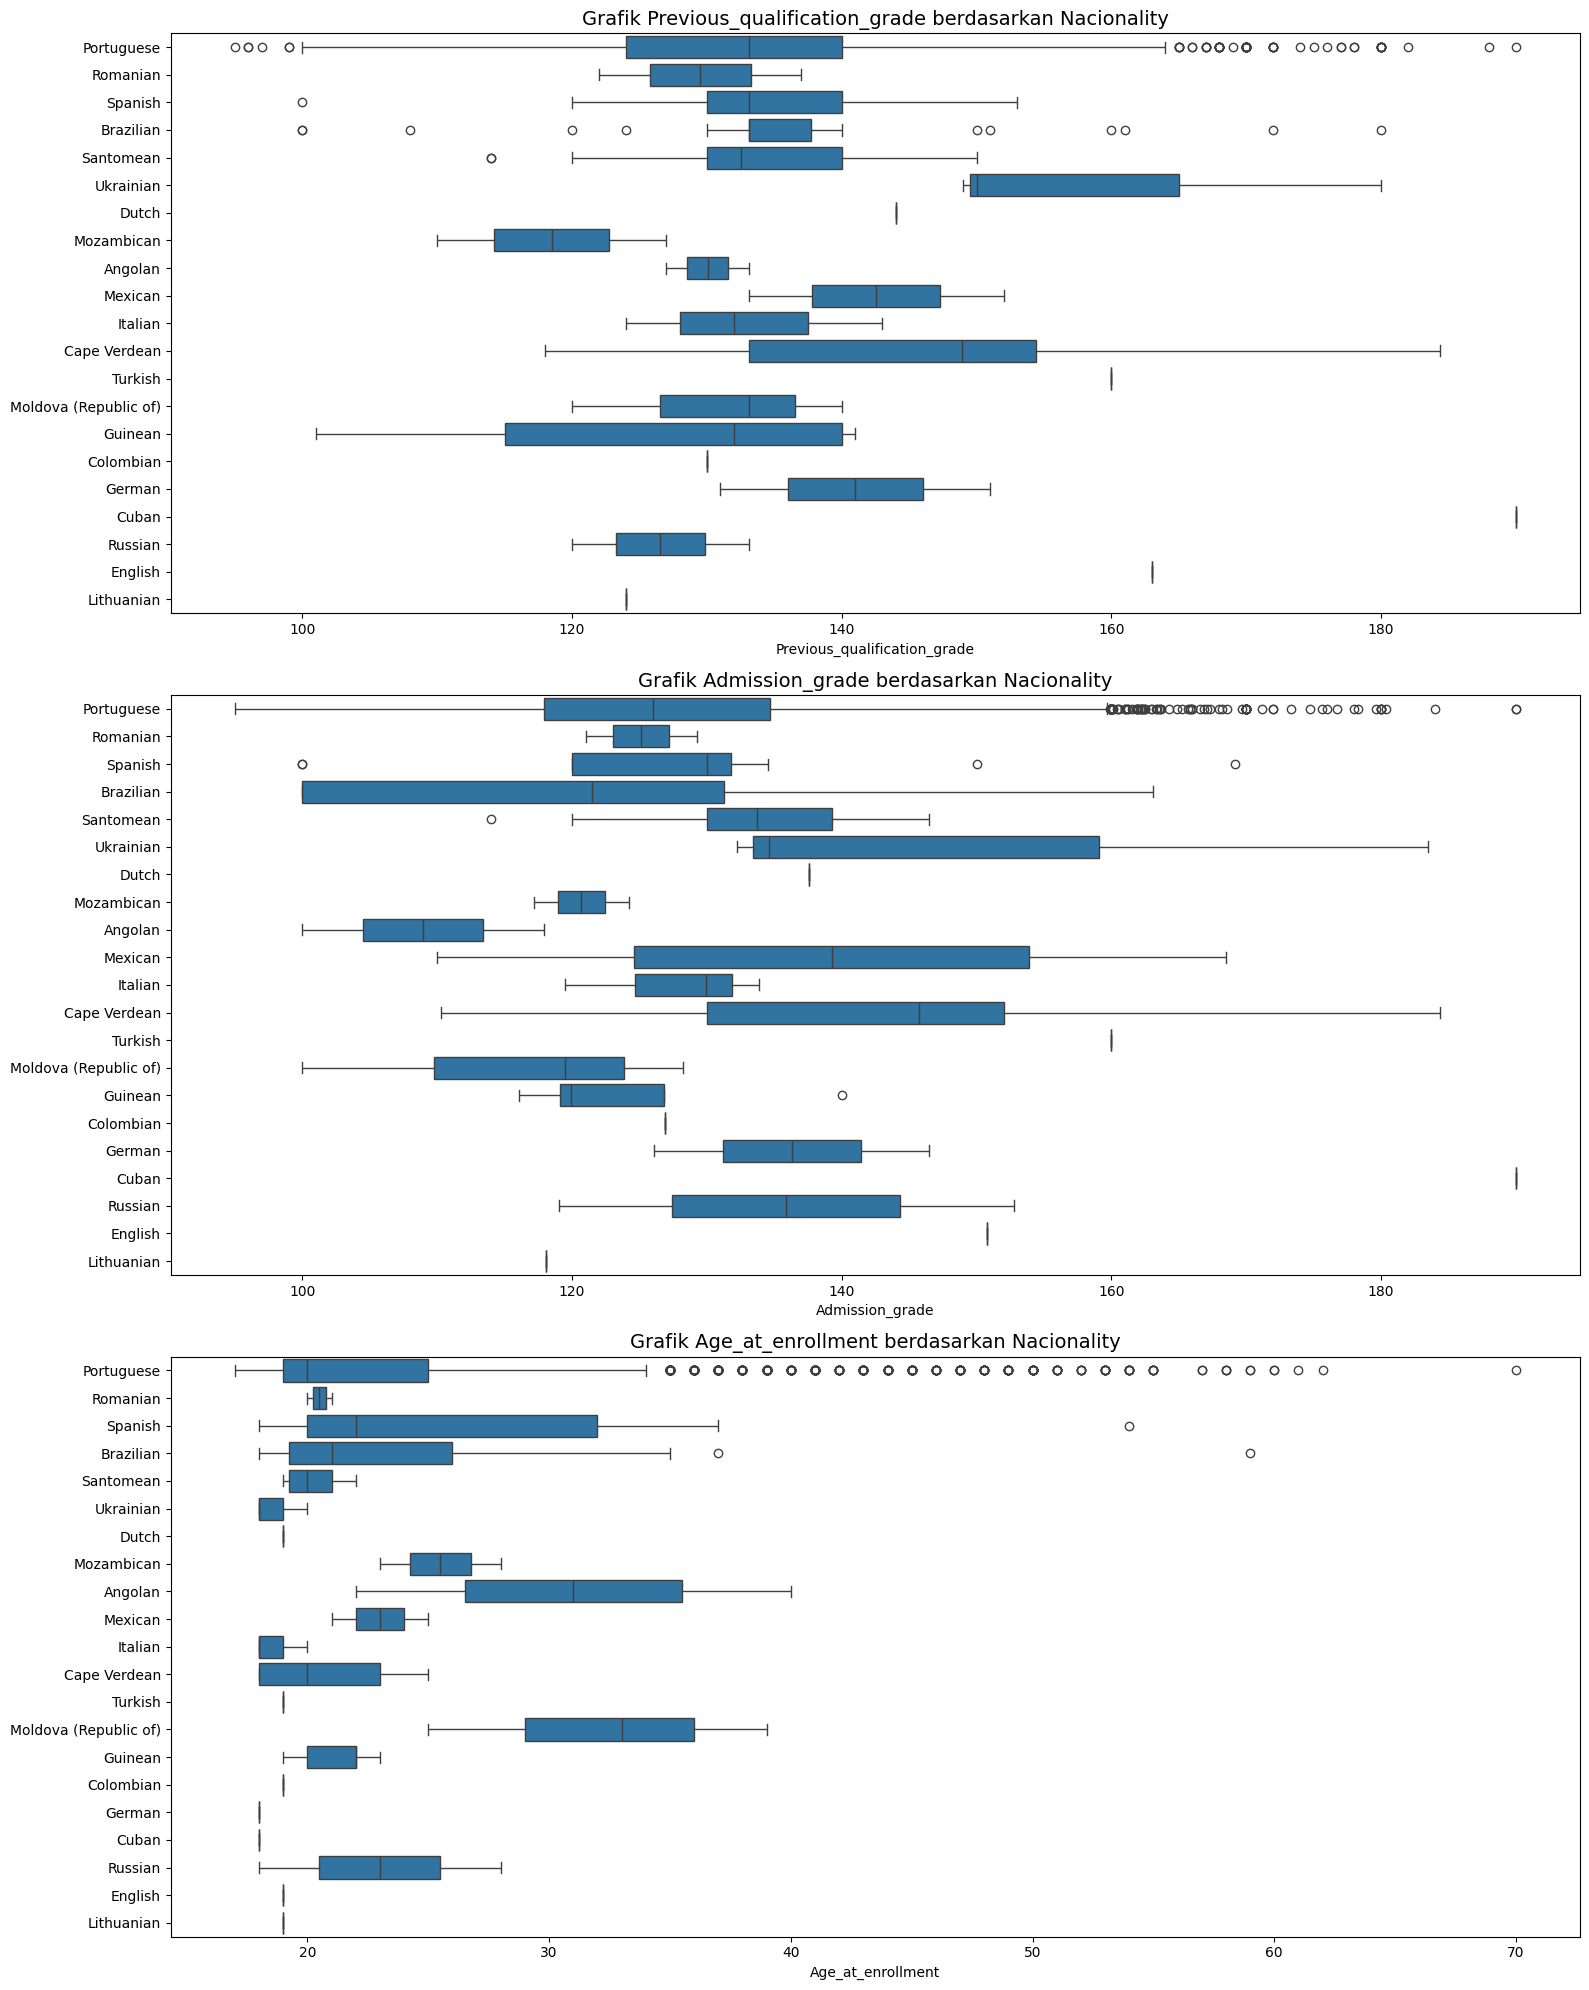

In [222]:
# 2. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Nacionality
numerical_dis_plot(
    features=["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment"],
    df=label_df,
    segment_feature="Nacionality"
)

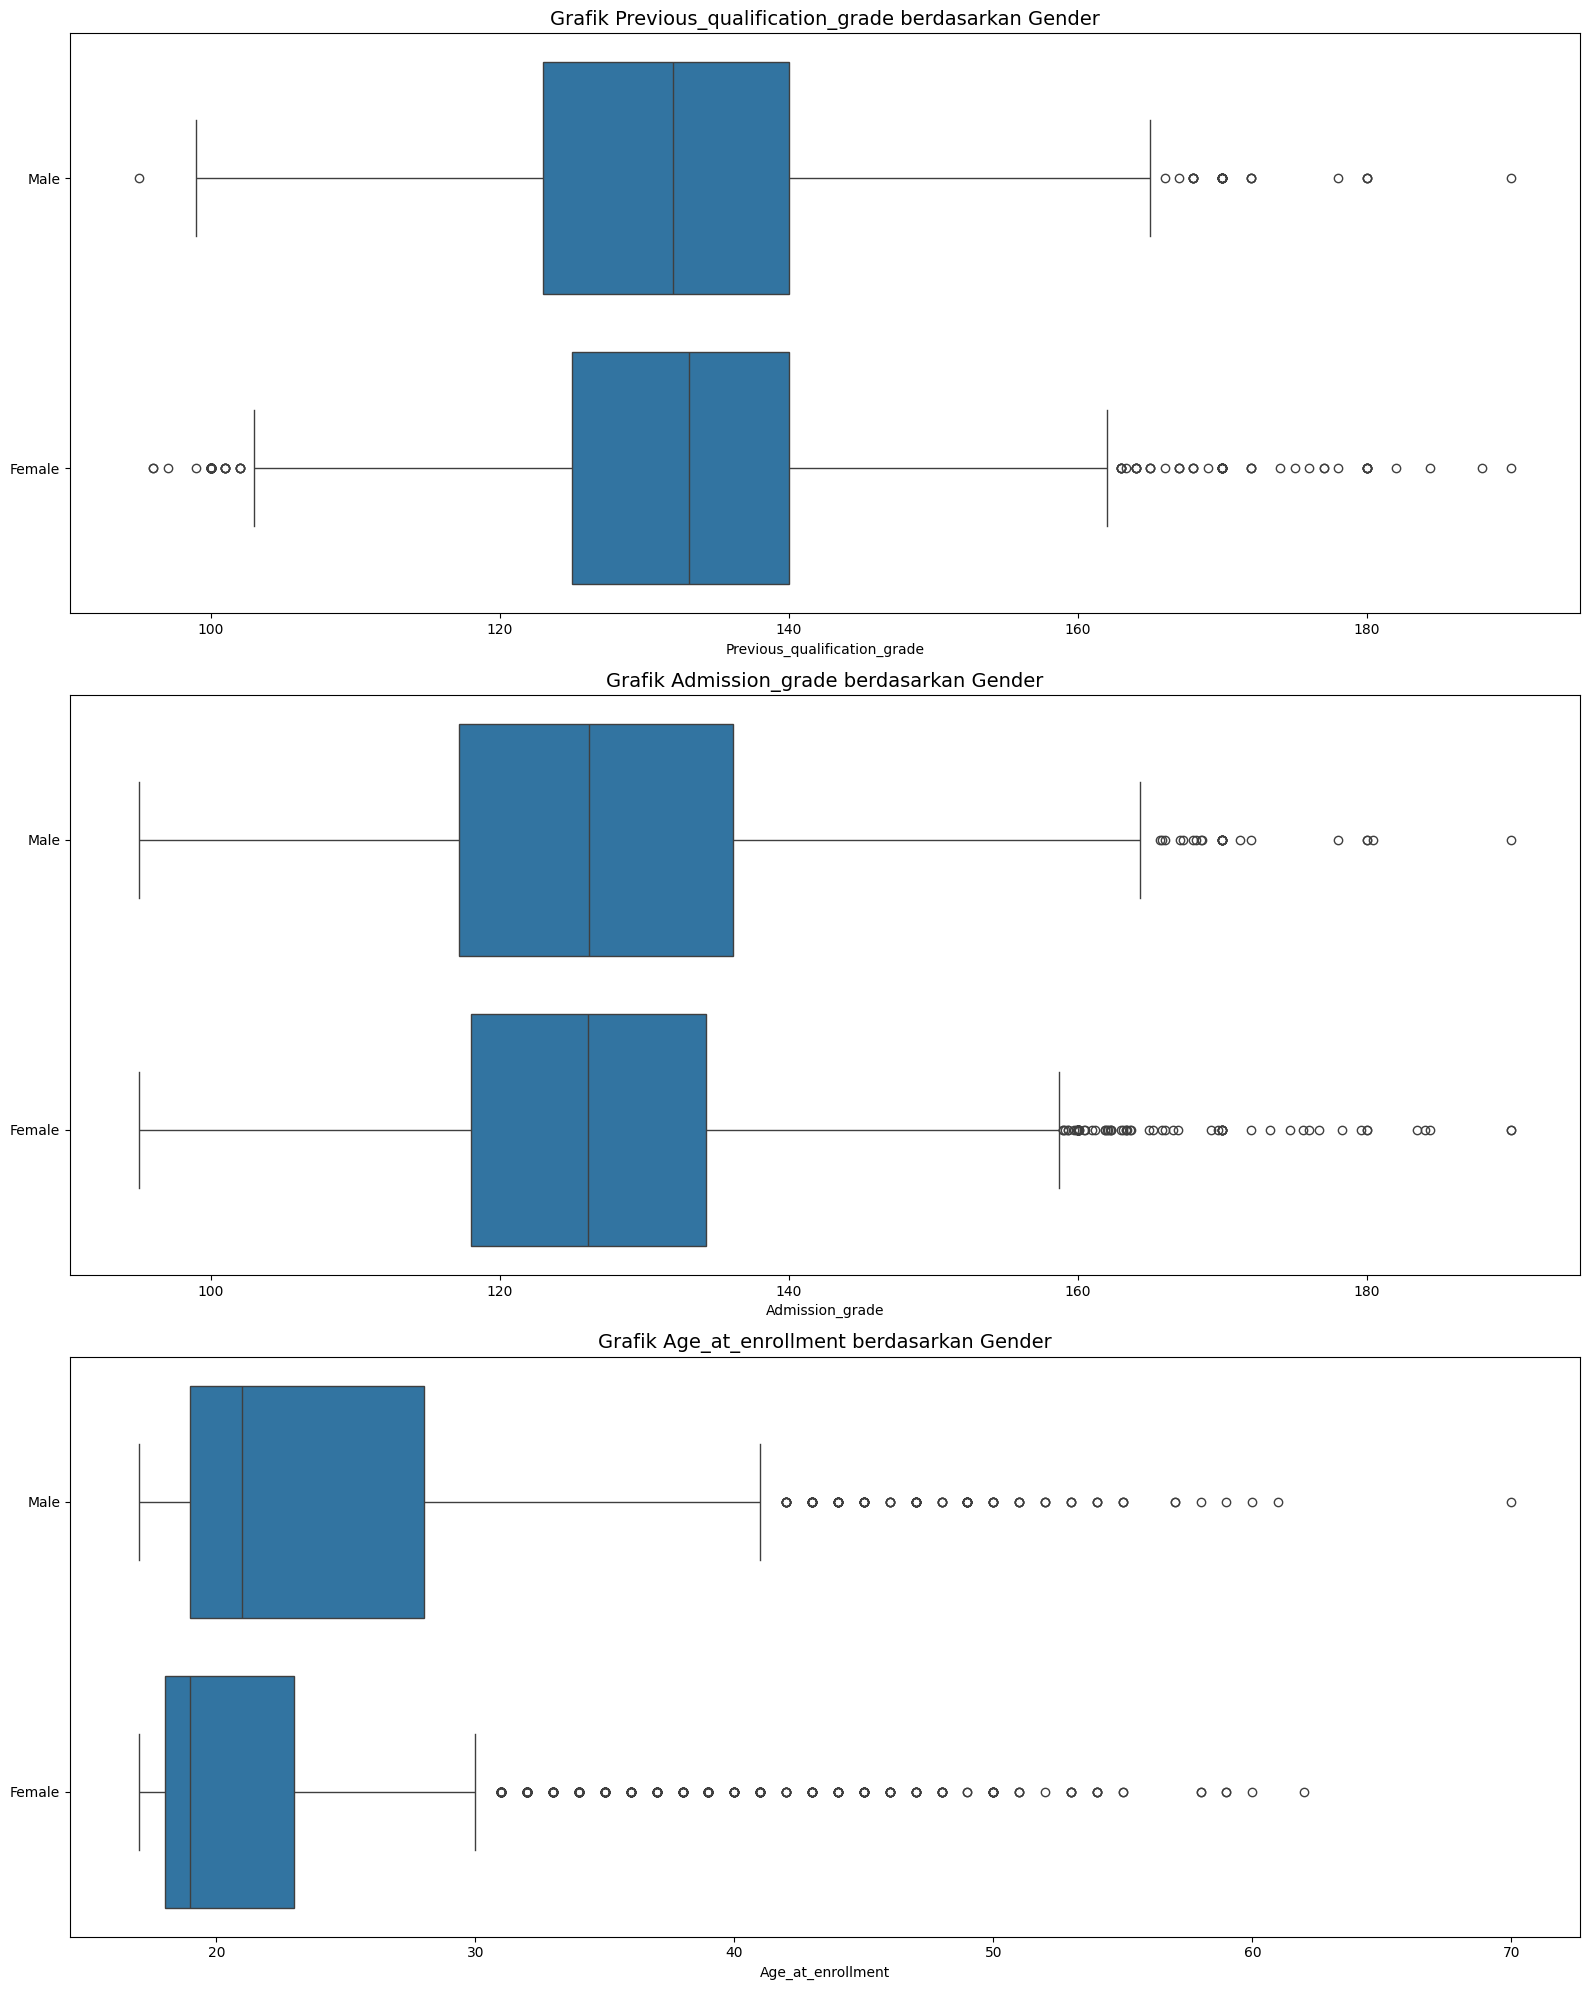

In [223]:
# 3. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Gender
numerical_dis_plot(
    features=["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment"],
    df=label_df,
    segment_feature="Gender"
)

#### Distribusi Fitur Kategorikal dari dataset

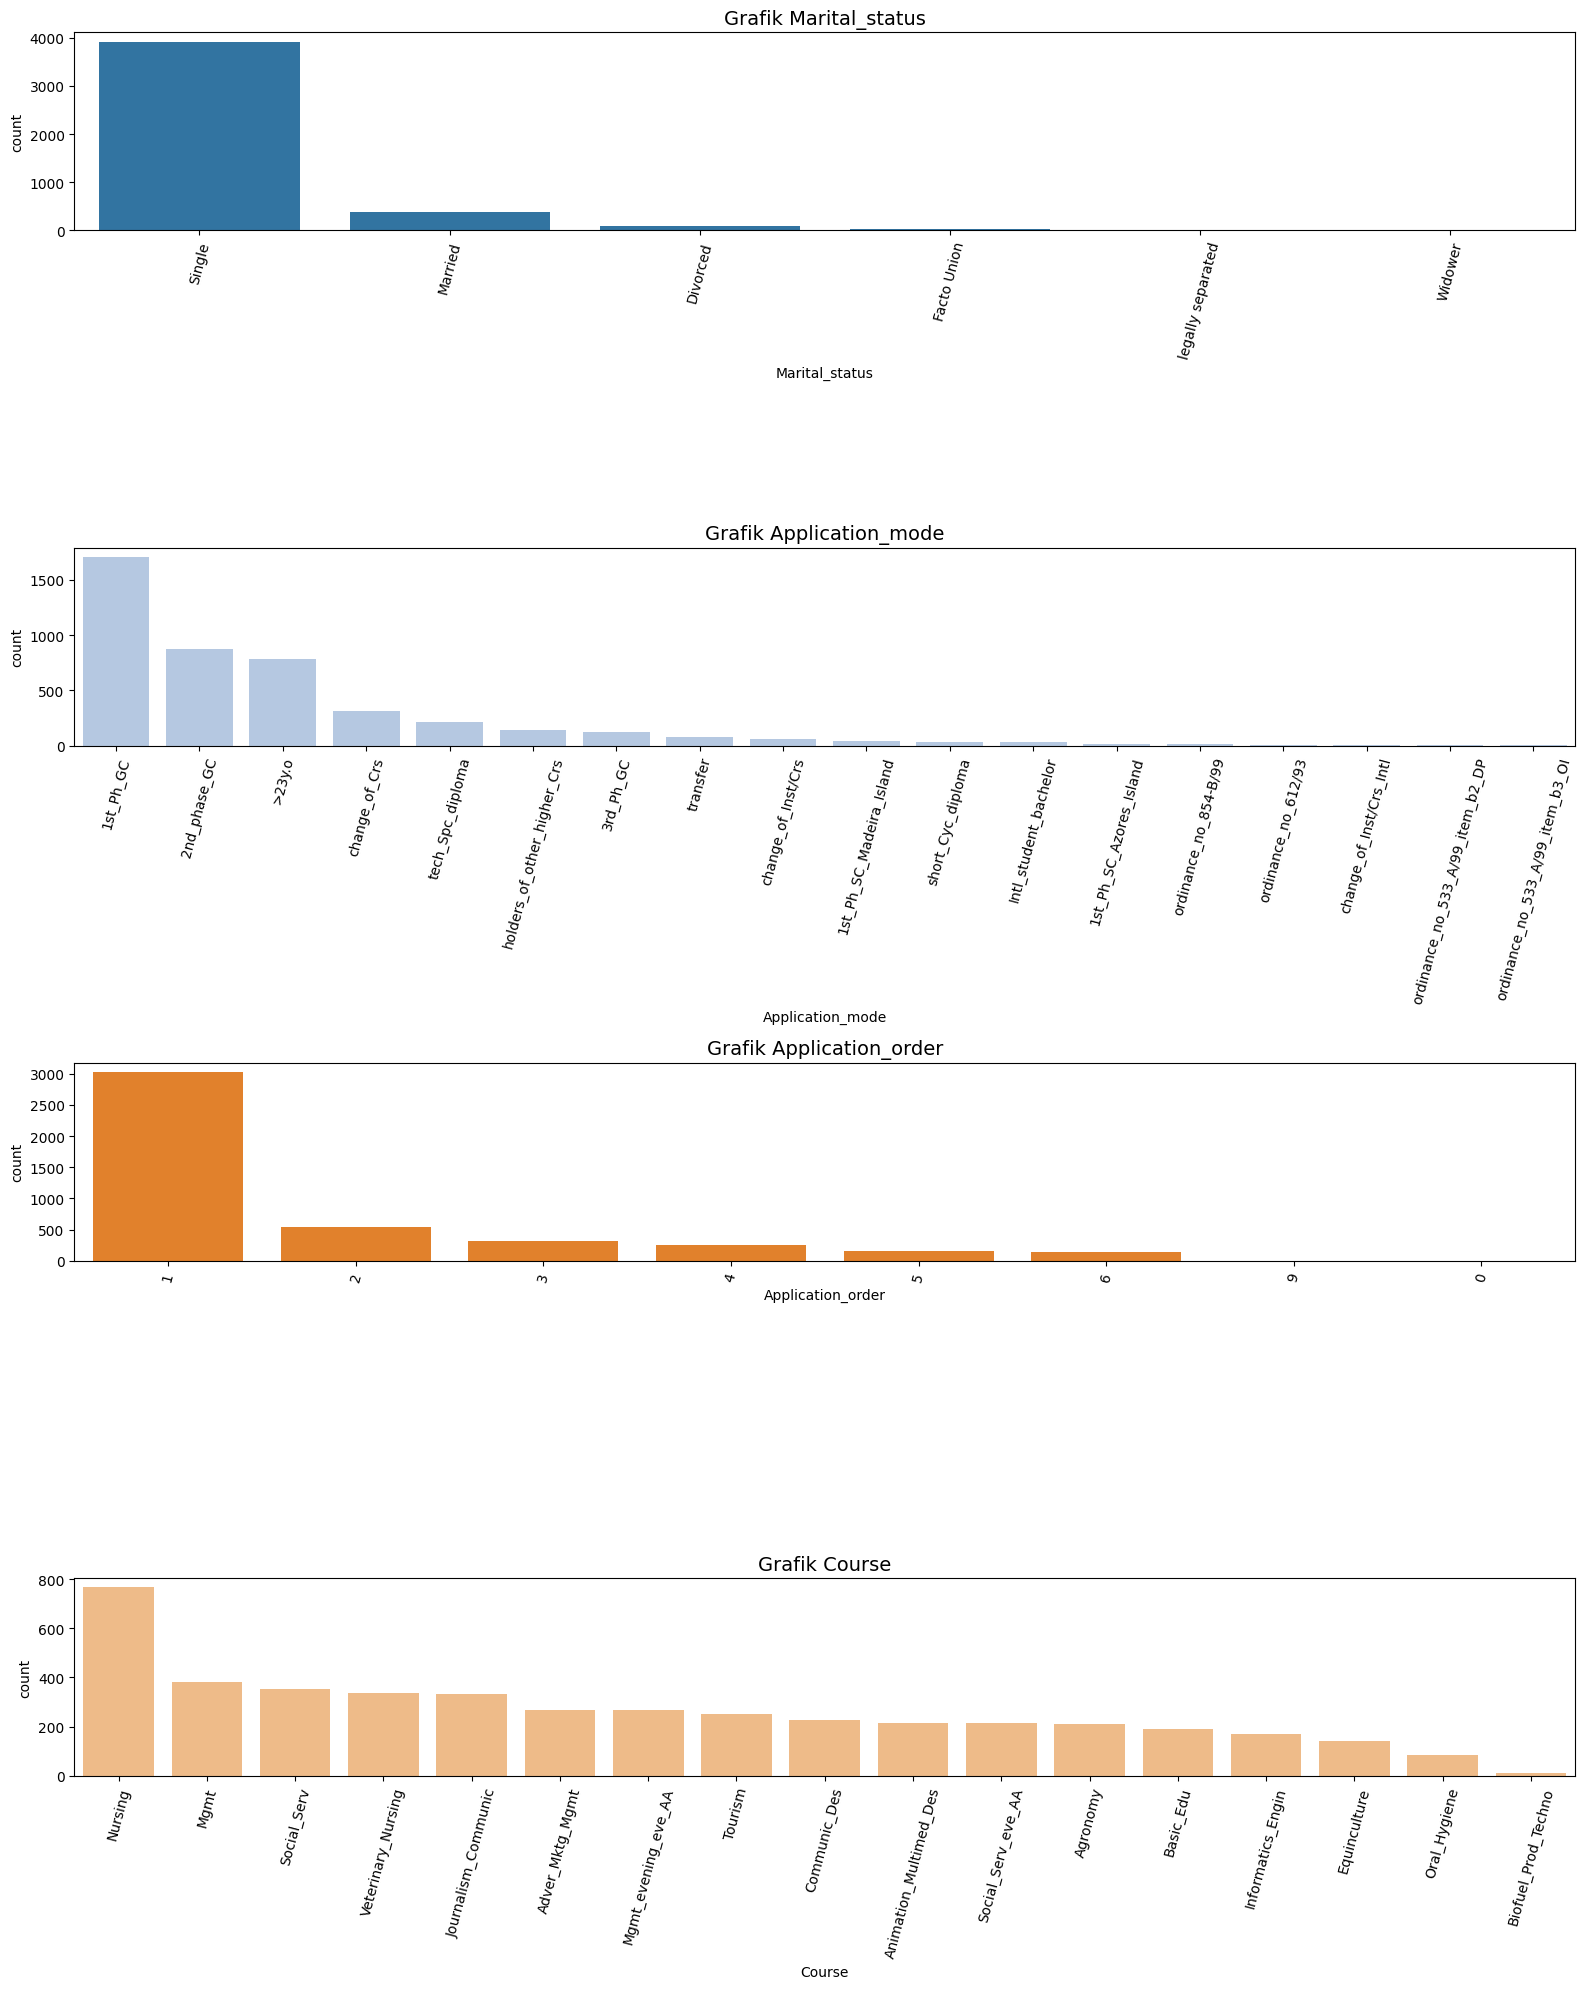

In [224]:
# Melihat distribusi fitur Kategorikal menggunakan grafik batang (bagian 1)

fitur_kategorikal = []

for fitur in label_df.columns:
  if label_df[fitur].dtype == "object":
     fitur_kategorikal.append(fitur)

fitur_kategorikal_1 = fitur_kategorikal[:4]

# Mendefenisikan jumlah dari grafik batang & jumlah grid-nya
num_bar_chart = len(fitur_kategorikal_1)
num_rows = 4
num_cols = 1

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
axes_flat = axes.flatten()

# Mengatur warna grafik batang
colors = plt.cm.tab20.colors[:num_bar_chart]

# Membuat setiap grafik batang dengan warna unik
for i, (column, ax) in enumerate(zip(fitur_kategorikal_1, axes_flat)):
  sns.countplot(data=label_df, x=column, color=colors[i], order = label_df[column].value_counts().index, ax=ax)
  ax.set_title(f'Grafik {column}', fontsize = 14)
  ax.set_xlabel(column, fontsize = 10)
  ax.tick_params(axis="x", labelrotation=75)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()

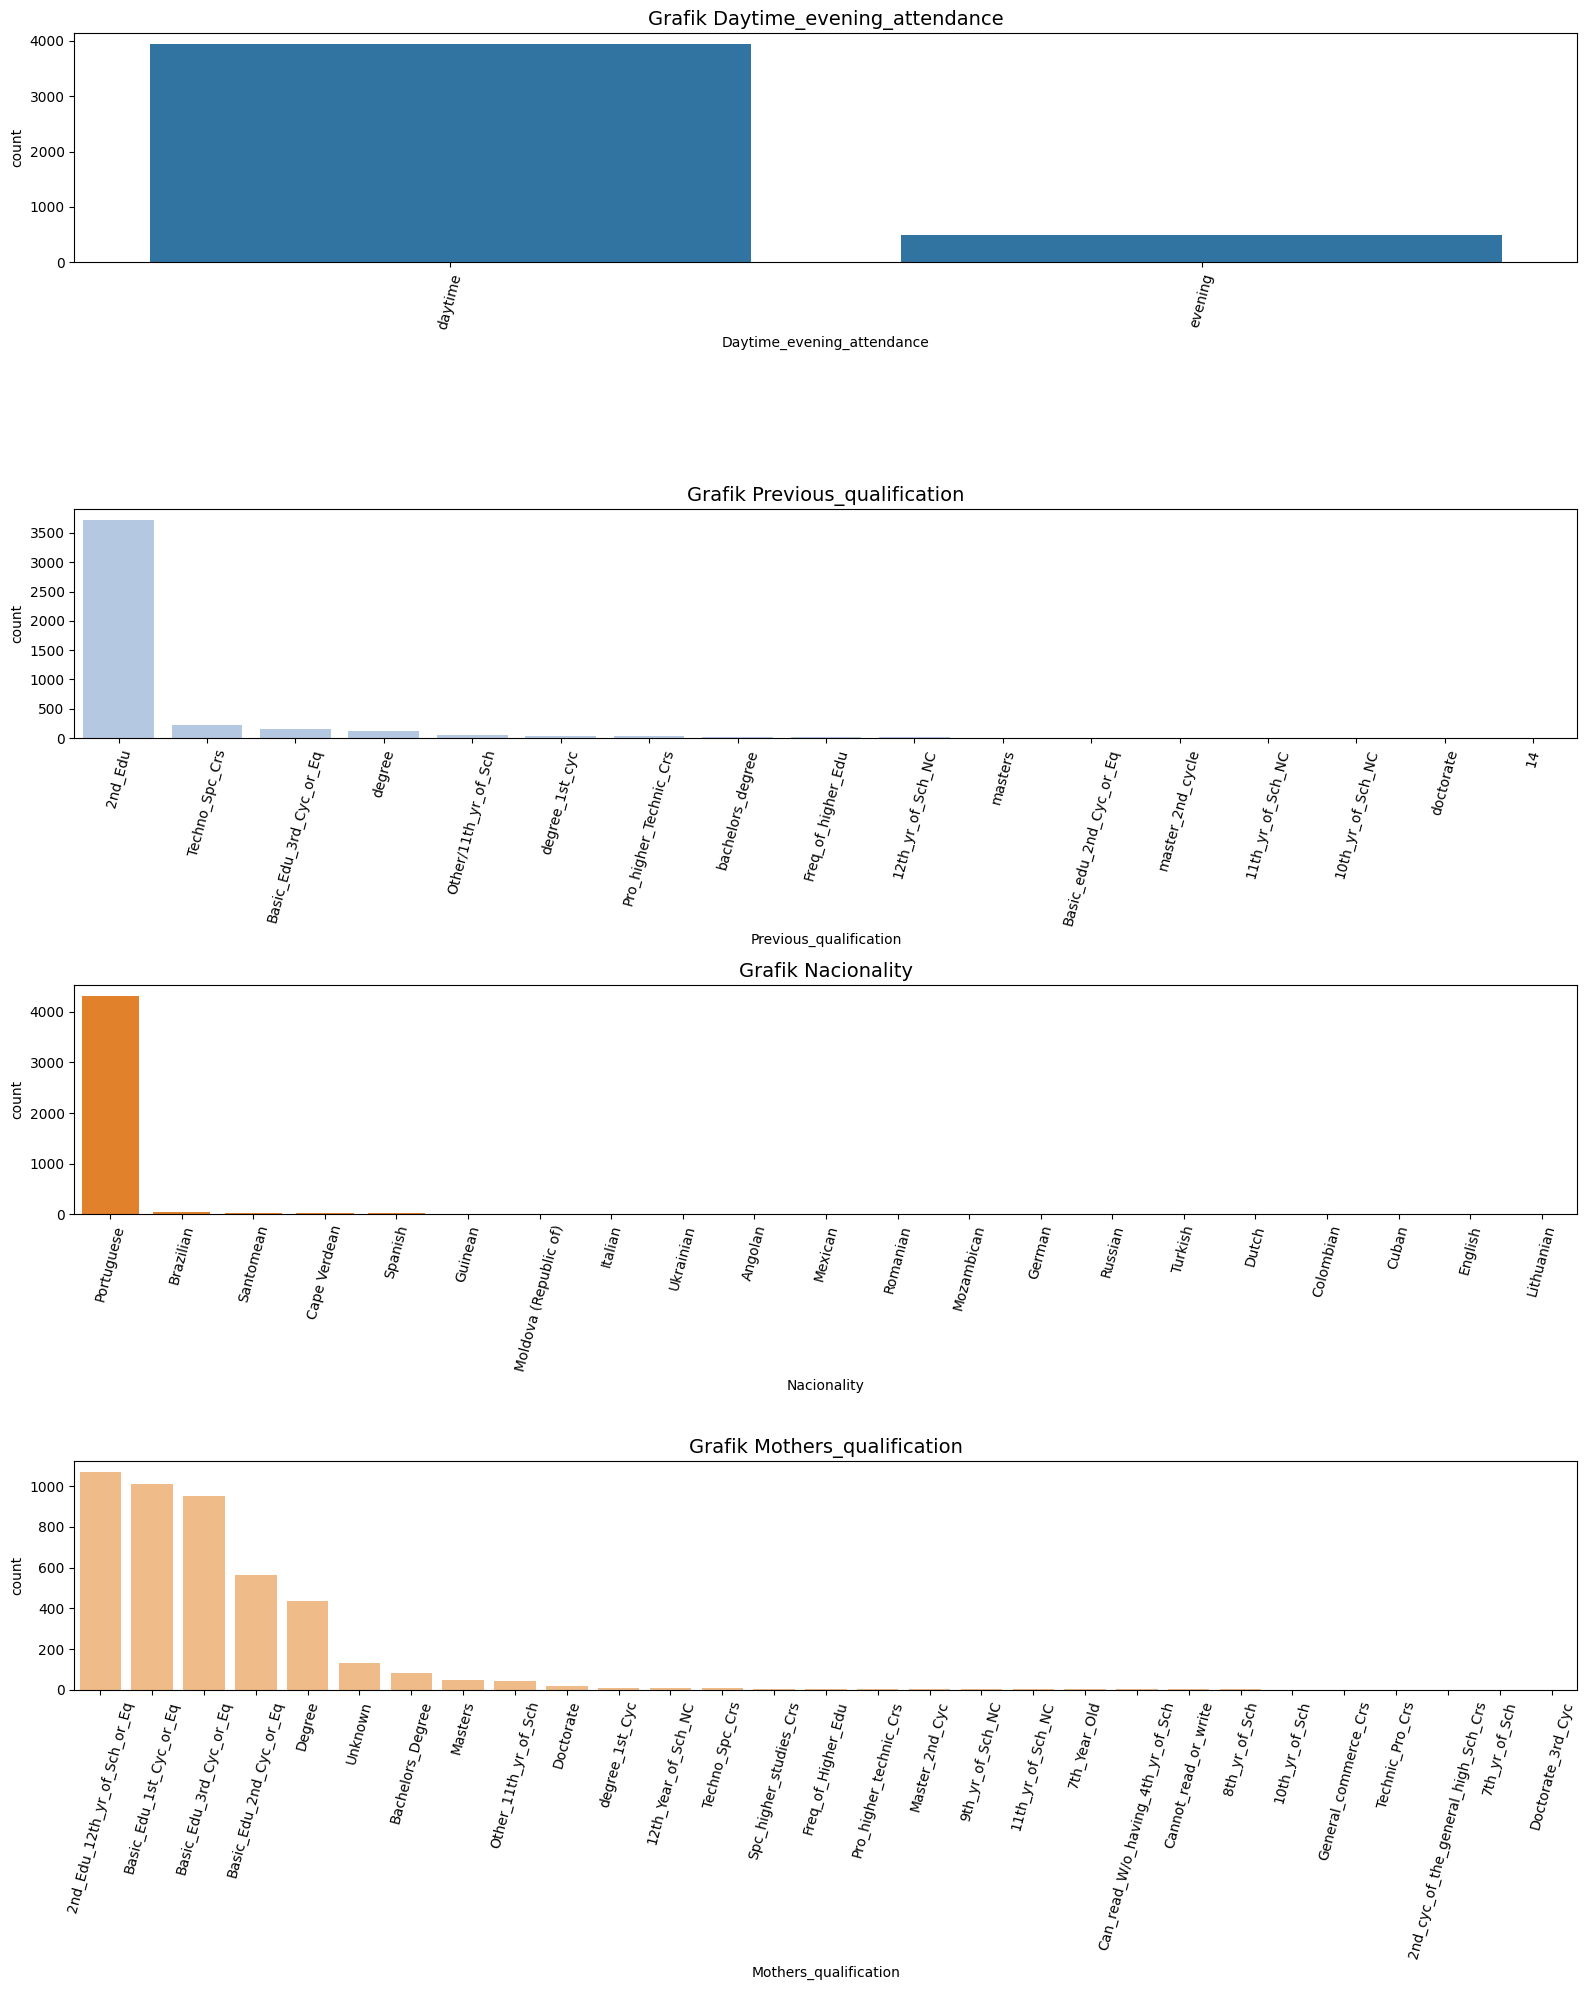

In [225]:
# Melihat distribusi fitur Kategorikal menggunakan grafik batang (bagian 2)

fitur_kategorikal_2 = fitur_kategorikal[4:8]

# Mendefenisikan jumlah dari grafik batang & jumlah grid-nya
num_bar_chart = len(fitur_kategorikal_2)
num_rows = 4
num_cols = 1

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
axes_flat = axes.flatten()

# Mengatur warna grafik batang
colors = plt.cm.tab20.colors[:num_bar_chart]

# Membuat setiap grafik batang dengan warna unik
for i, (column, ax) in enumerate(zip(fitur_kategorikal_2, axes_flat)):
  sns.countplot(data=label_df, x=column, color=colors[i], order = label_df[column].value_counts().index, ax=ax)
  ax.set_title(f'Grafik {column}', fontsize = 14)
  ax.set_xlabel(column, fontsize = 10)
  ax.tick_params(axis="x", labelrotation=75)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()

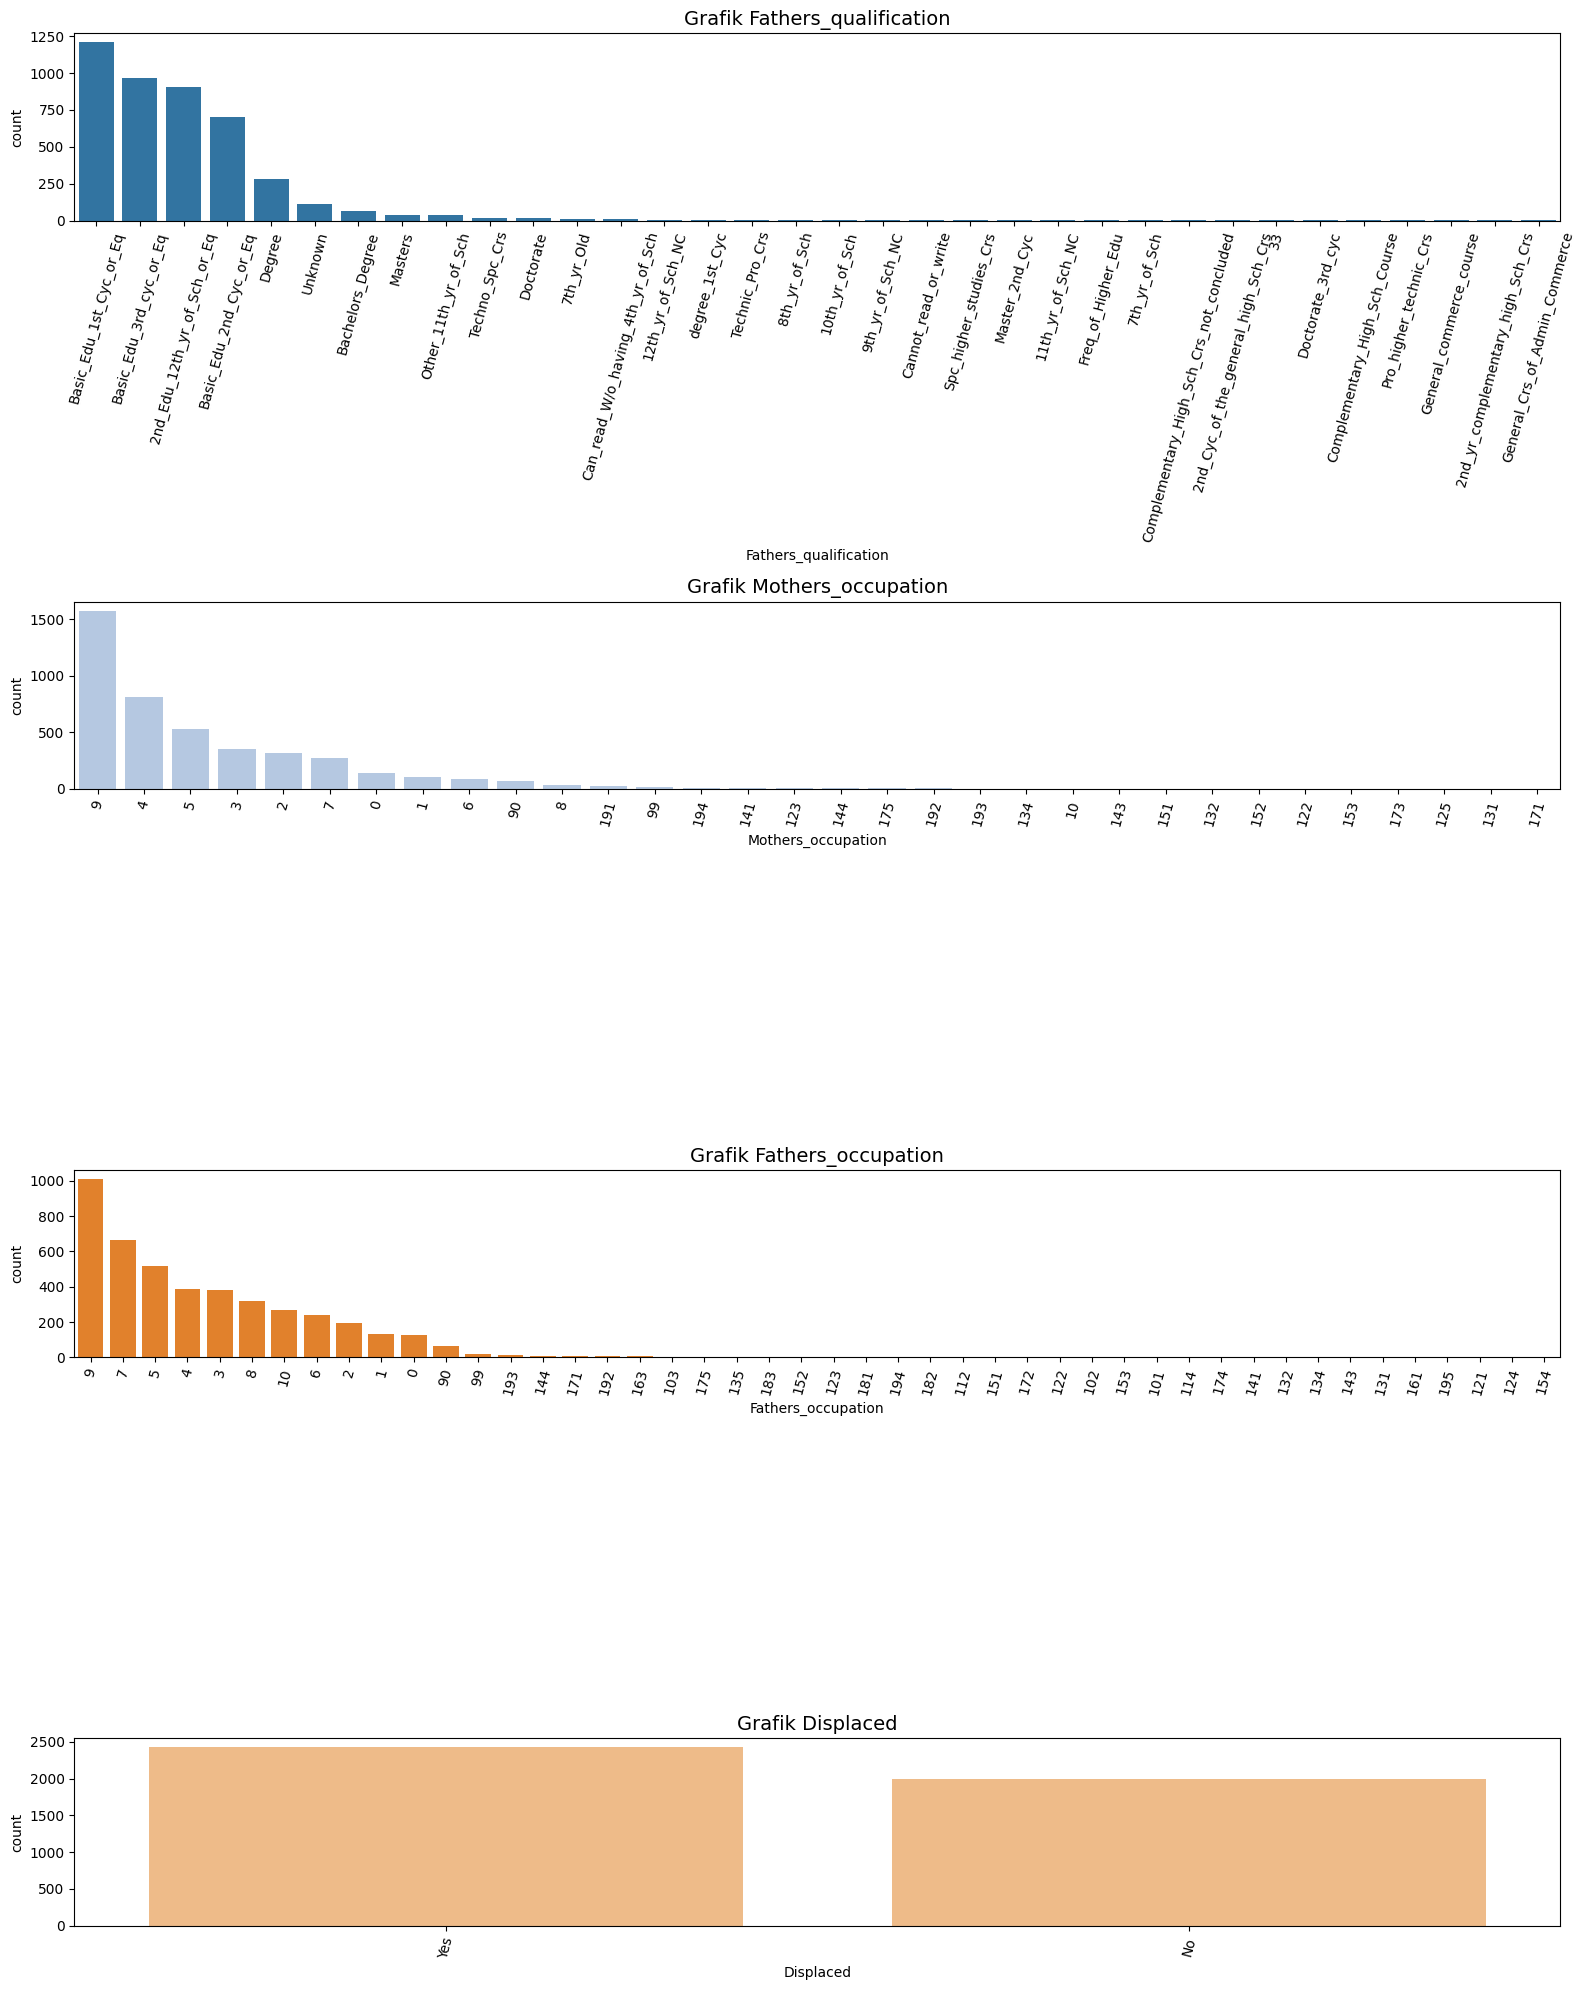

In [226]:
# Melihat distribusi fitur Kategorikal menggunakan grafik batang (bagian 3)

fitur_kategorikal_3 = fitur_kategorikal[8:12]

# Mendefenisikan jumlah dari grafik batang & jumlah grid-nya
num_bar_chart = len(fitur_kategorikal_3)
num_rows = 4
num_cols = 1

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
axes_flat = axes.flatten()

# Mengatur warna grafik batang
colors = plt.cm.tab20.colors[:num_bar_chart]

# Membuat setiap grafik batang dengan warna unik
for i, (column, ax) in enumerate(zip(fitur_kategorikal_3, axes_flat)):
  sns.countplot(data=label_df, x=column, color=colors[i], order = label_df[column].value_counts().index, ax=ax)
  ax.set_title(f'Grafik {column}', fontsize = 14)
  ax.set_xlabel(column, fontsize = 10)
  ax.tick_params(axis="x", labelrotation=75)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()

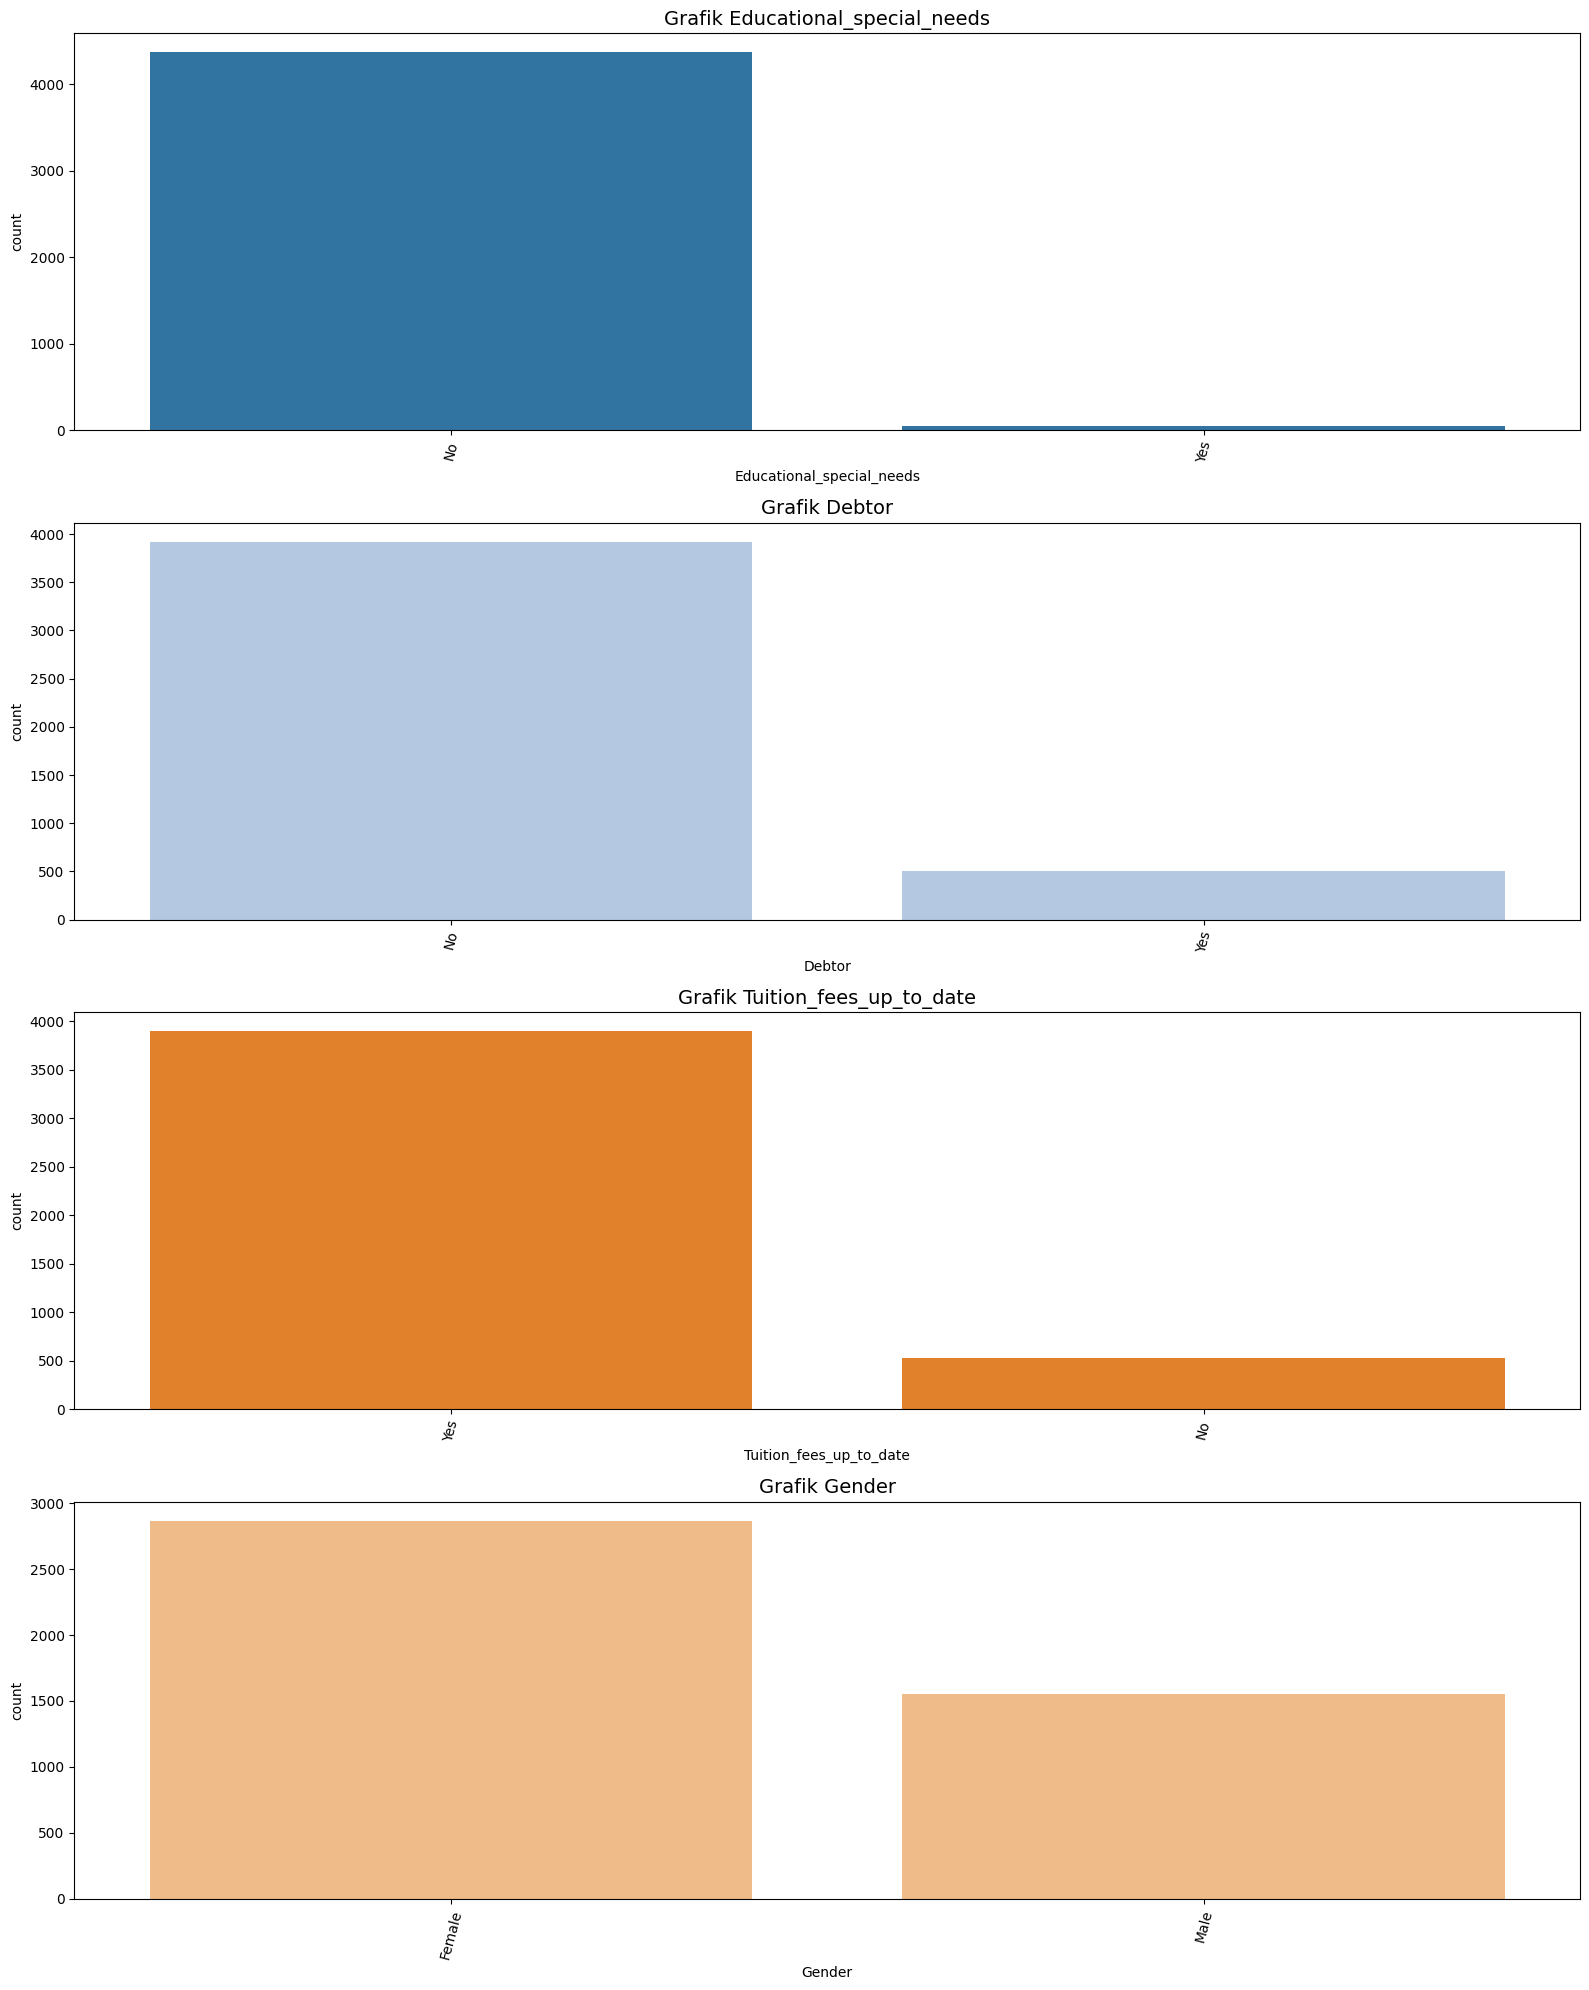

In [227]:
# Melihat distribusi fitur Kategorikal menggunakan grafik batang (bagian 4)

fitur_kategorikal_4 = fitur_kategorikal[12:16]

# Mendefenisikan jumlah dari grafik batang & jumlah grid-nya
num_bar_chart = len(fitur_kategorikal_4)
num_rows = 4
num_cols = 1

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
axes_flat = axes.flatten()

# Mengatur warna grafik batang
colors = plt.cm.tab20.colors[:num_bar_chart]

# Membuat setiap grafik batang dengan warna unik
for i, (column, ax) in enumerate(zip(fitur_kategorikal_4, axes_flat)):
  sns.countplot(data=label_df, x=column, color=colors[i], order = label_df[column].value_counts().index, ax=ax)
  ax.set_title(f'Grafik {column}', fontsize = 14)
  ax.set_xlabel(column, fontsize = 10)
  ax.tick_params(axis="x", labelrotation=75)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()

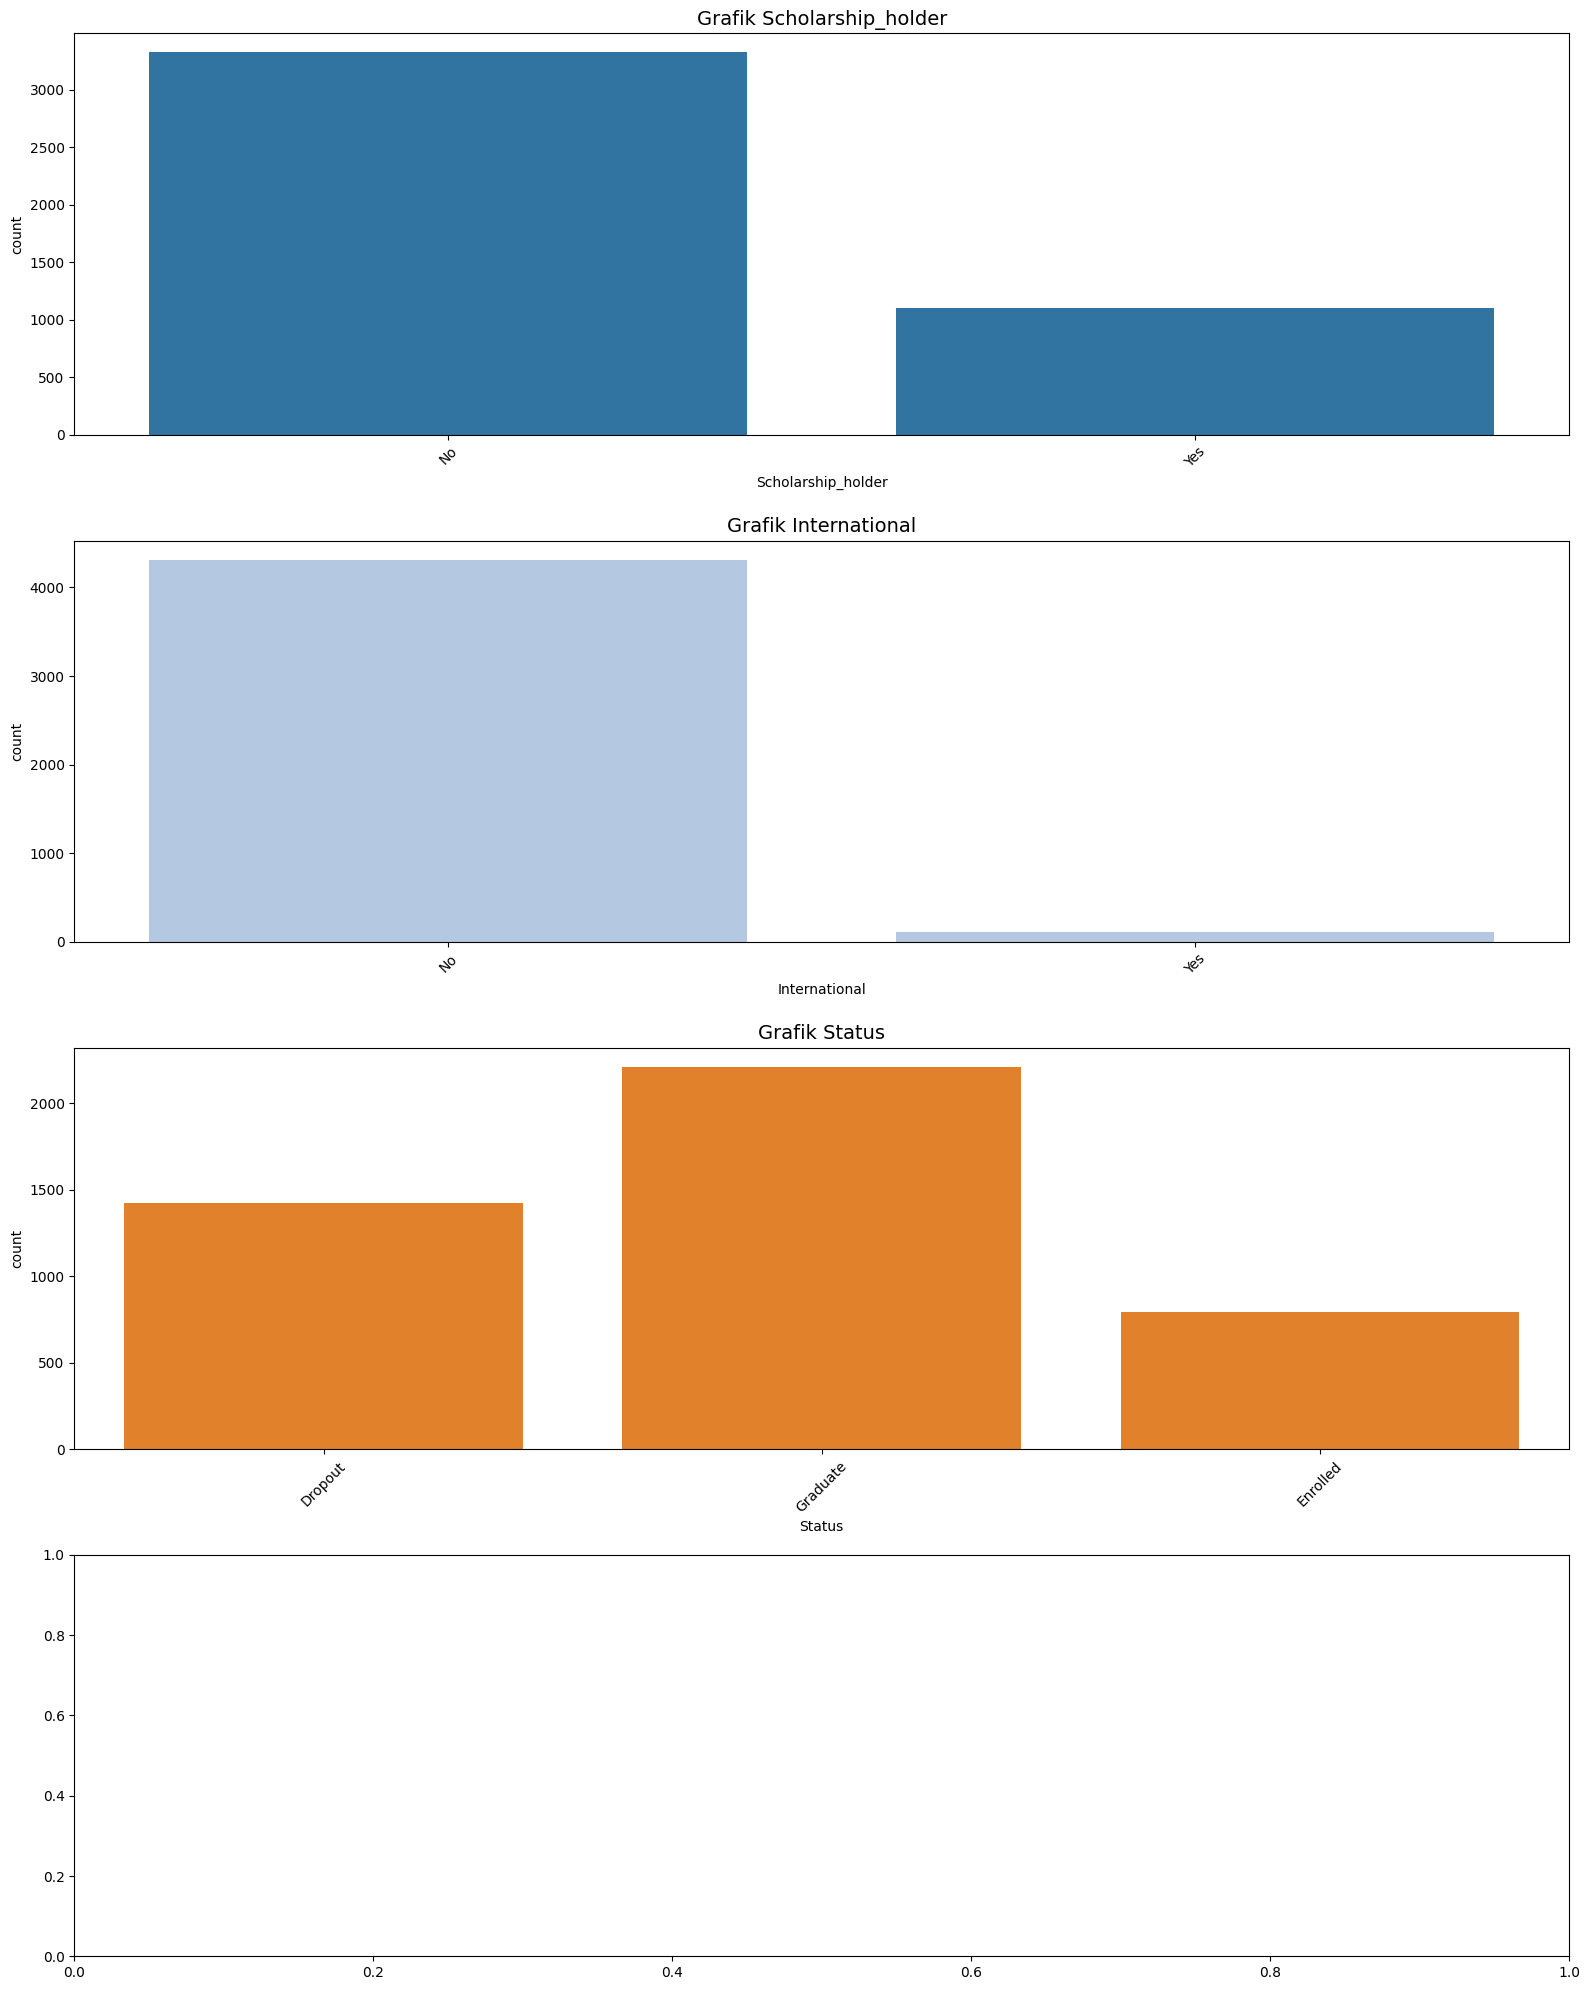

In [228]:
# Melihat distribusi fitur Kategorikal menggunakan grafik batang (bagian 5)

fitur_kategorikal_5 = fitur_kategorikal[16:19]

# Mendefenisikan jumlah dari grafik batang & jumlah grid-nya
num_bar_chart = len(fitur_kategorikal_5)
num_rows = 4
num_cols = 1

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
axes_flat = axes.flatten()

# Mengatur warna grafik batang
colors = plt.cm.tab20.colors[:num_bar_chart]

# Membuat setiap grafik batang dengan warna unik
for i, (column, ax) in enumerate(zip(fitur_kategorikal_5, axes_flat)):
  sns.countplot(data=label_df, x=column, color=colors[i], ax=ax)
  ax.set_title(f'Grafik {column}', fontsize = 14)
  ax.set_xlabel(column, fontsize = 10)
  ax.tick_params(axis="x", labelrotation=45)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()

Anda dapat melihat berdasarkan grafik diatas dapat dikatakan bahwa:
* Jumlah siswa terbanyak adalah siswa yang tergolong dalam status "single"
* Siswa kebanyakan mendaftar melalui model aplikasi fase 1 kontingen umum (1st phase general contingent). Selain itu, kecenderungan siswa yang mendaftar adalah dari pilihan pertama aplikasi
* Kebanyakan siswa mengambil mata pelajaran keperawatan (nursing) dibandingkan mata pelajaran yang lain.
* Jumlah siswa yang mengambil kelas siang lebih banyak dibandingkan kelas malam
* Siswa yang mengambil pendidikan di tempat ini, cenderung adalah siswa yang sebelumnya berasal jenjang pendidikan menengah  
* Mayoritas siswa memiliki kewarganegaraan Portugal.
* Terkait jenjang pendidikan orang tua, khusus untuk para ibu dari siswa didominasi oleh setiap ibu yang memiliki jenjang pendidikan menengah (12 tahun belajar / setara) . Sedangkan, untuk para ayah dari siswa didominasi oleh setiap ayah yang memiliki jenjang pendidikan dasar fase pertama (4/5 tahun atau setara).
* Mayoritas orang tua siswa baik ayah maupun ibu tergolong dalam pekerjaan yang tidak membutuhkan keterampilan khusus (9-unskilled worker).
* Mayoitas siswa yang tergolong dalam kelompok orang terlatar.
* Jumlah siswa yang tidak membutuhkan pendidikan khusus lebih banyak singnifikan dibandingkan yang membutuhkan pendidikan khusus.
* Mayoritas siswa tidak memiliki utang / tunggakan pembayaran biaya pendidikan.
* Mayoritas siswa memiliki biaya pendidikan yang sudah sesuai dengan biaya pendidikan terbaru. Walaupun, belum semua siswa juga yang biaya pendidikannya disesuaikan dengan yang terbaru.
* Mayoritas siswa memiliki jenis kelamin perempuan
* Jumlah siswa yang tidak memiliki beasiswa lebih banyak dibandingkan yang memiliki beasiswa
* Mayoritas siswa tergolong dalam siswa lokal bukan siswa internasional
* Jumlah siswa yang berstatus lulus lebih banyak dibandingkan keluar dan mendaftar.

#### Distribusi Fitur Kategorikal berdasarkan Fitur Kategorikal yang lain

In [229]:
# Membuat sebuah helper function bernama categorical_plot
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(20,25))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
            ax[i].set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14)
            ax[i].set_xlabel(segment_feature, fontsize = 10)
            ax[i].legend(bbox_to_anchor=(1.04, 1), loc="upper left")
            ax[i].tick_params(axis="x", labelrotation=75)
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
            ax[i].legend(bbox_to_anchor=(1.04, 1), loc="upper left")
            ax[i].tick_params(axis="x", labelrotation=75)
    plt.tight_layout()
    plt.show()

##### Distribusi Fitur Kategorikal berdasarkan Fitur Status

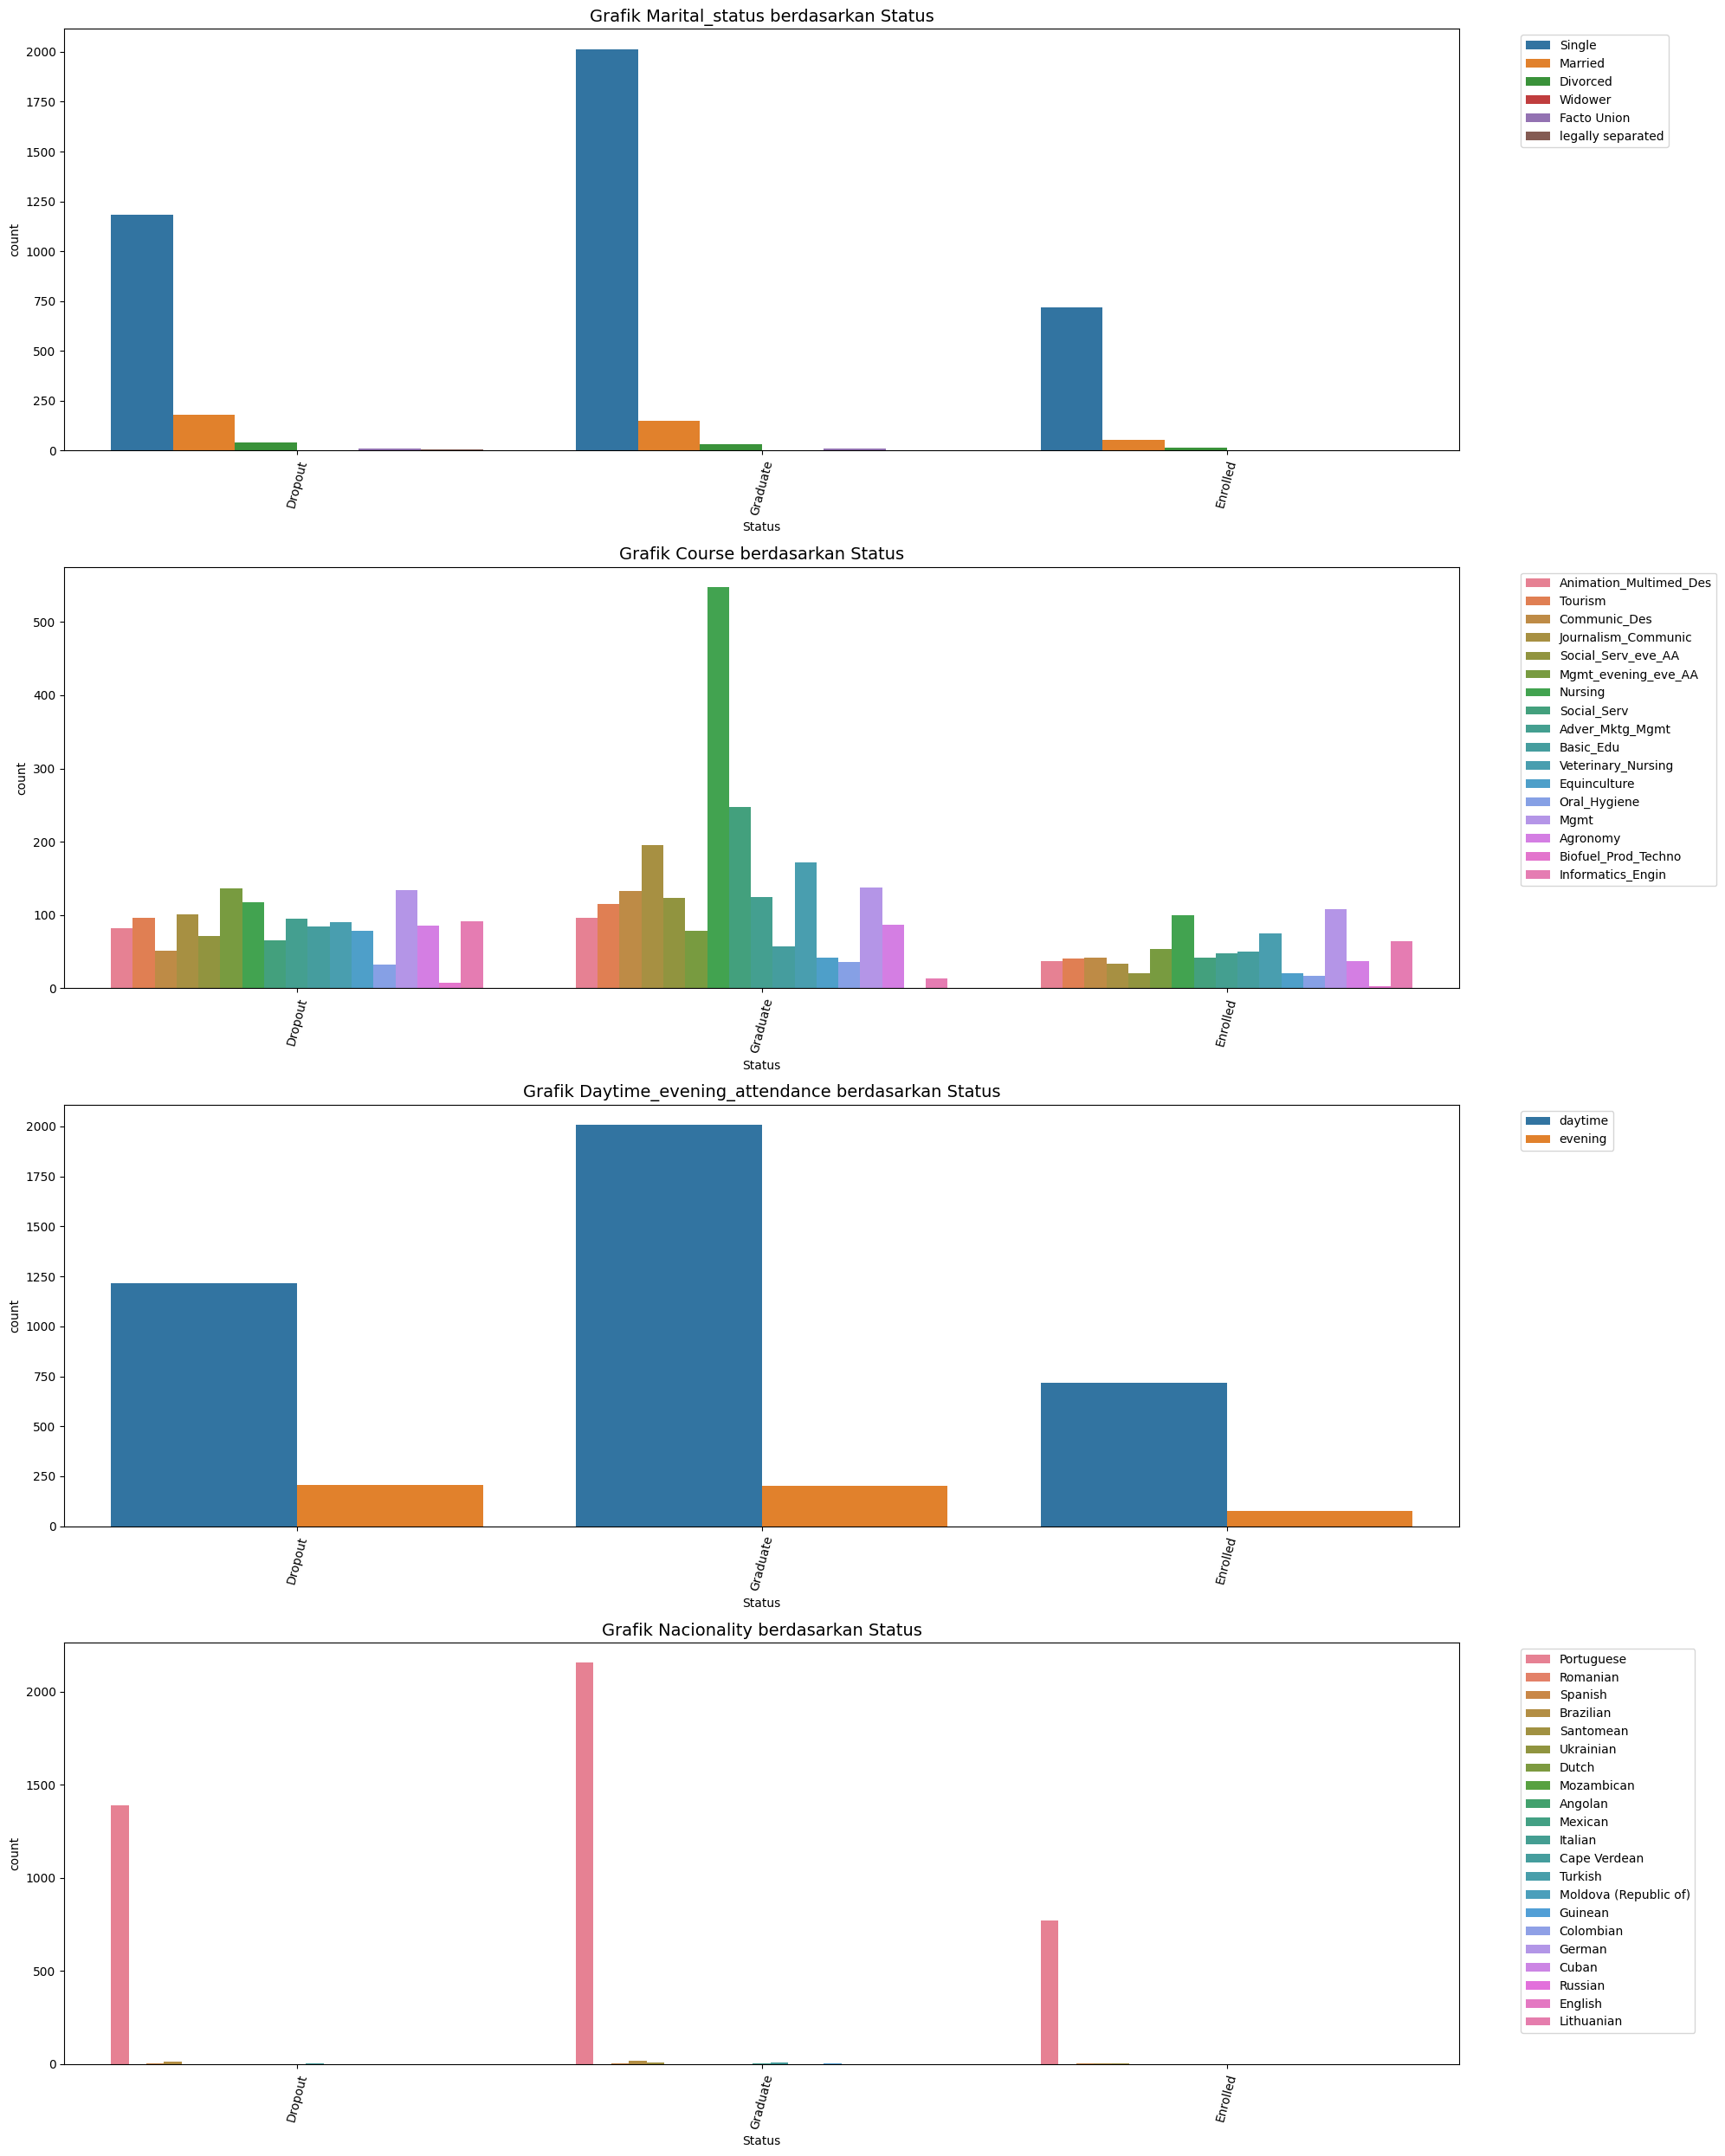

In [230]:
# 1. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan Status
categorical_plot(
    features=["Marital_status", "Course", "Daytime_evening_attendance", "Nacionality"],
    df=label_df,
    segment_feature="Status"
)

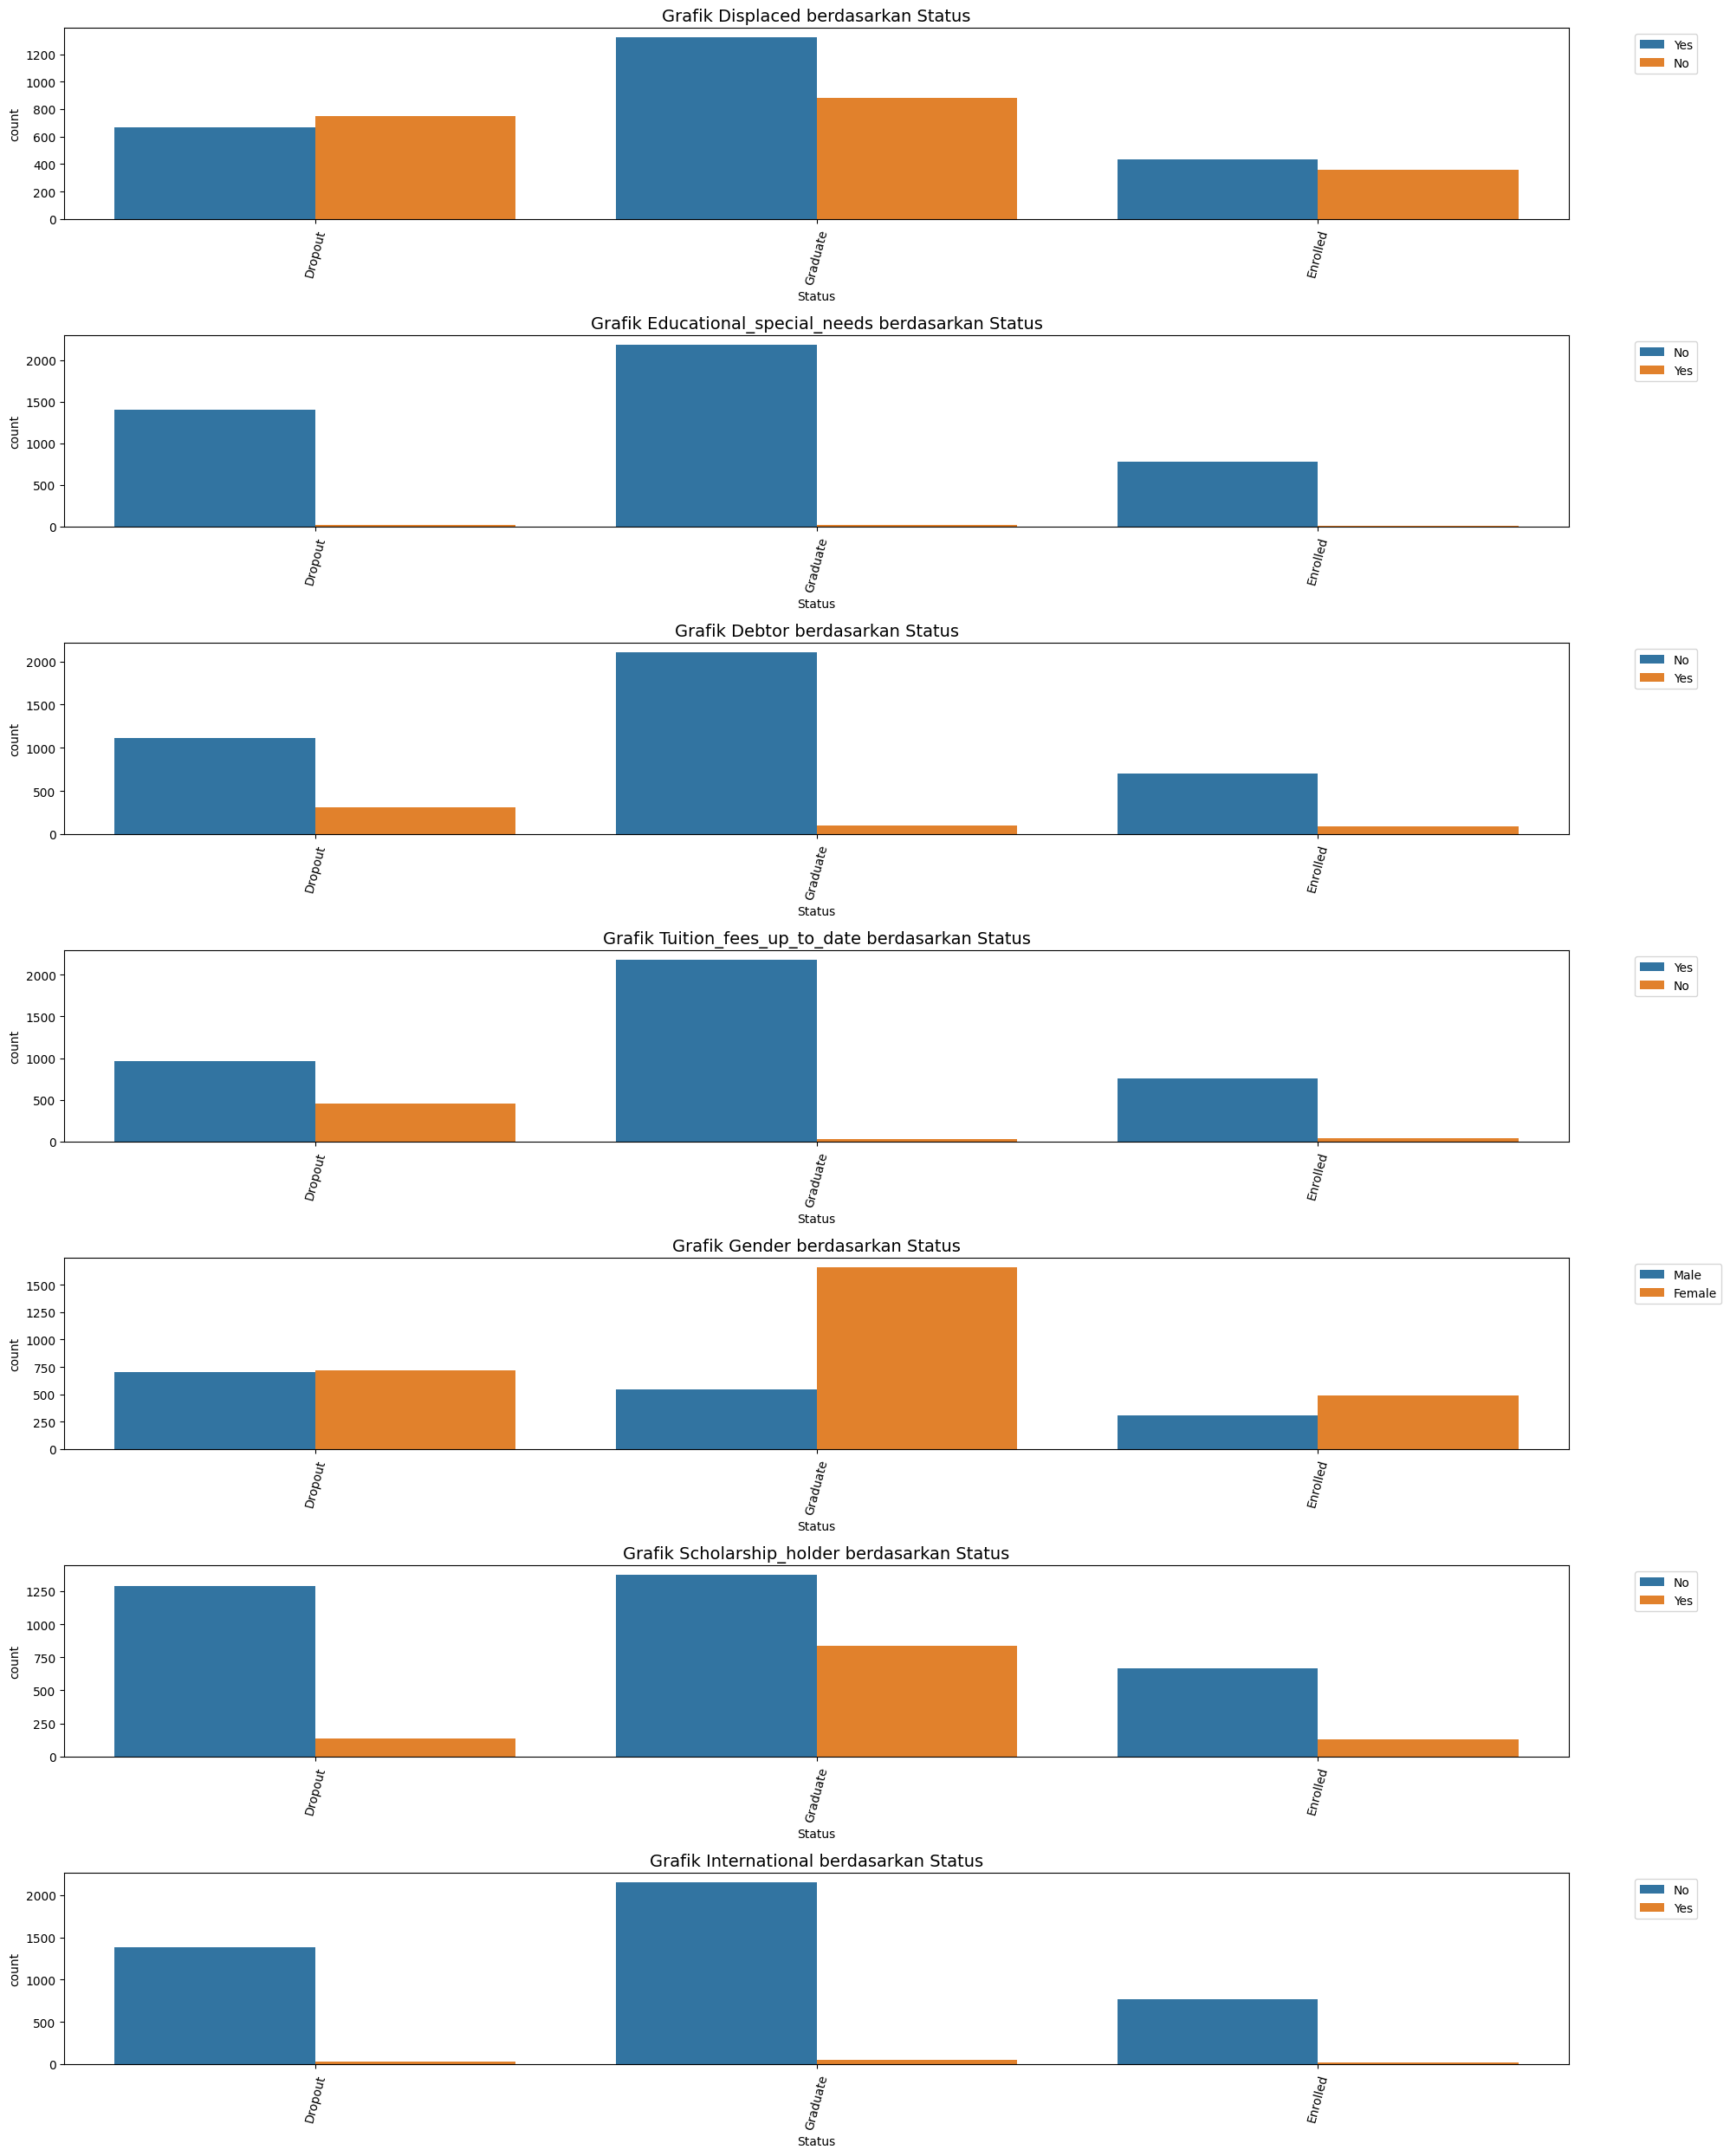

In [231]:
# 2. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan Status
categorical_plot(
    features=["Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International"],
    df=label_df,
    segment_feature="Status"
)

##### Distribusi Fitur Kategorikal berdasarkan Fitur Marital Status

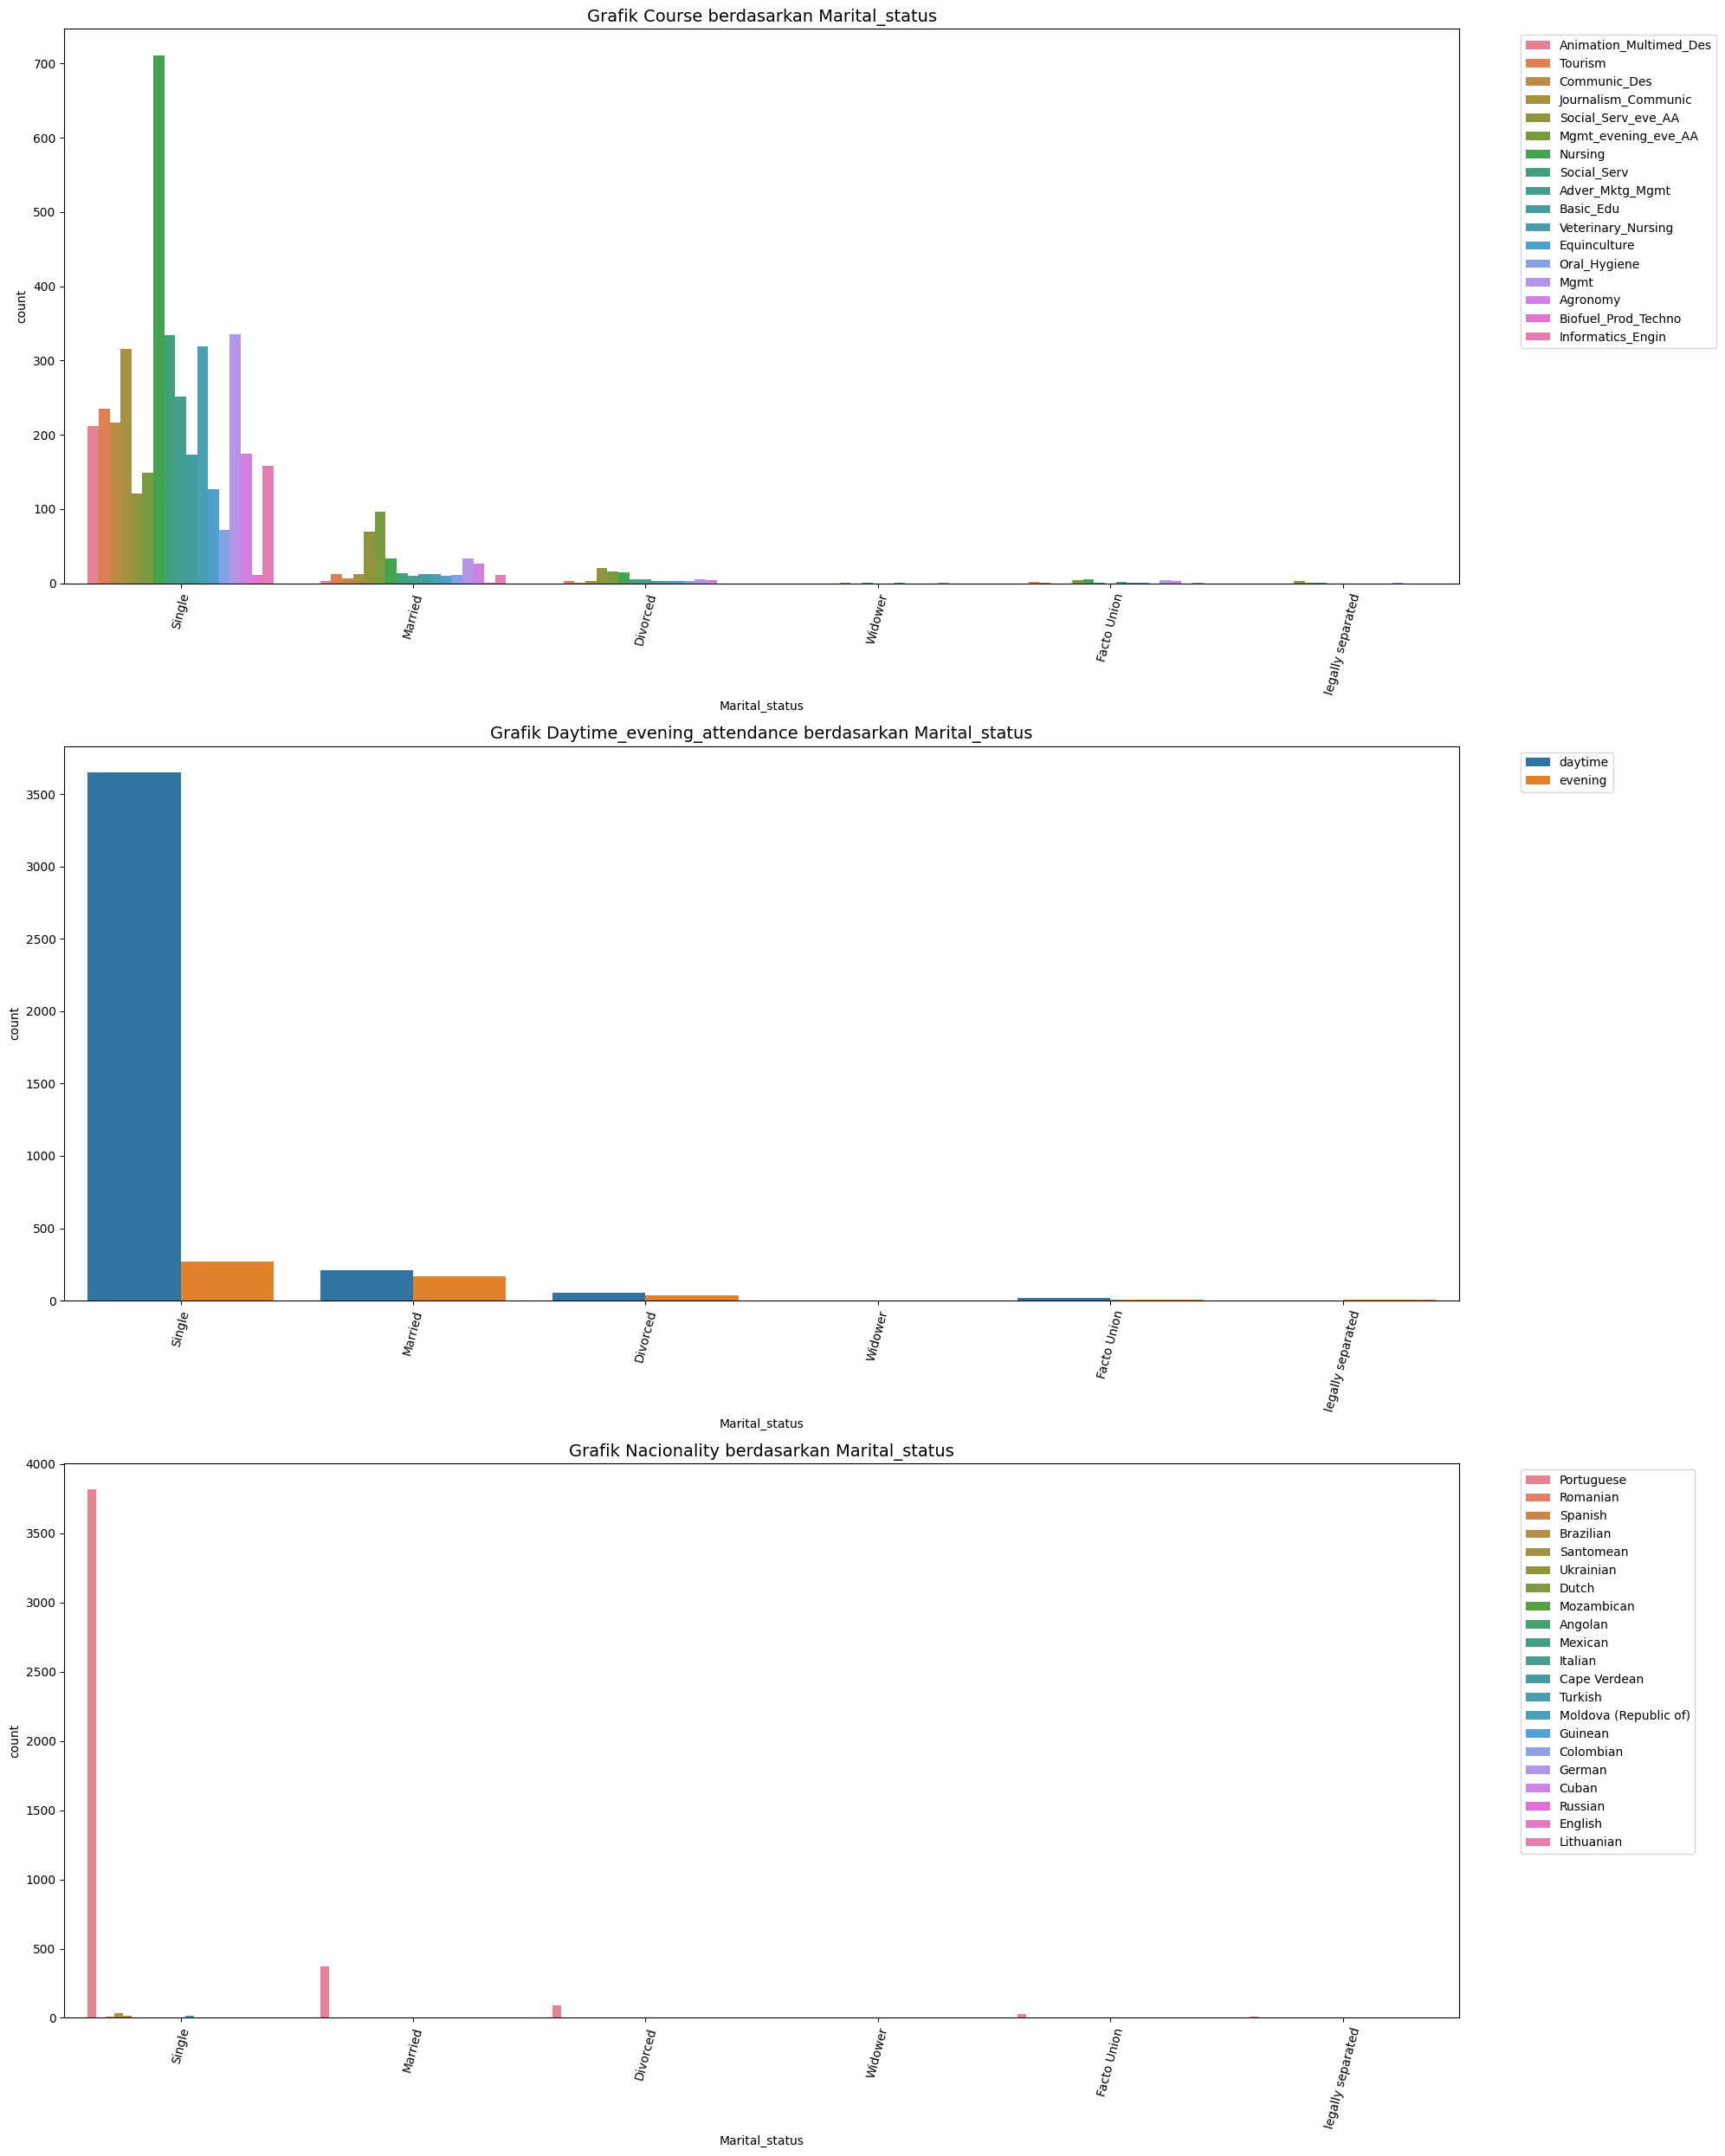

In [232]:
# 1. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan Martital_Status
categorical_plot(
    features=["Course", "Daytime_evening_attendance", "Nacionality"],
    df=label_df,
    segment_feature="Marital_status"
)

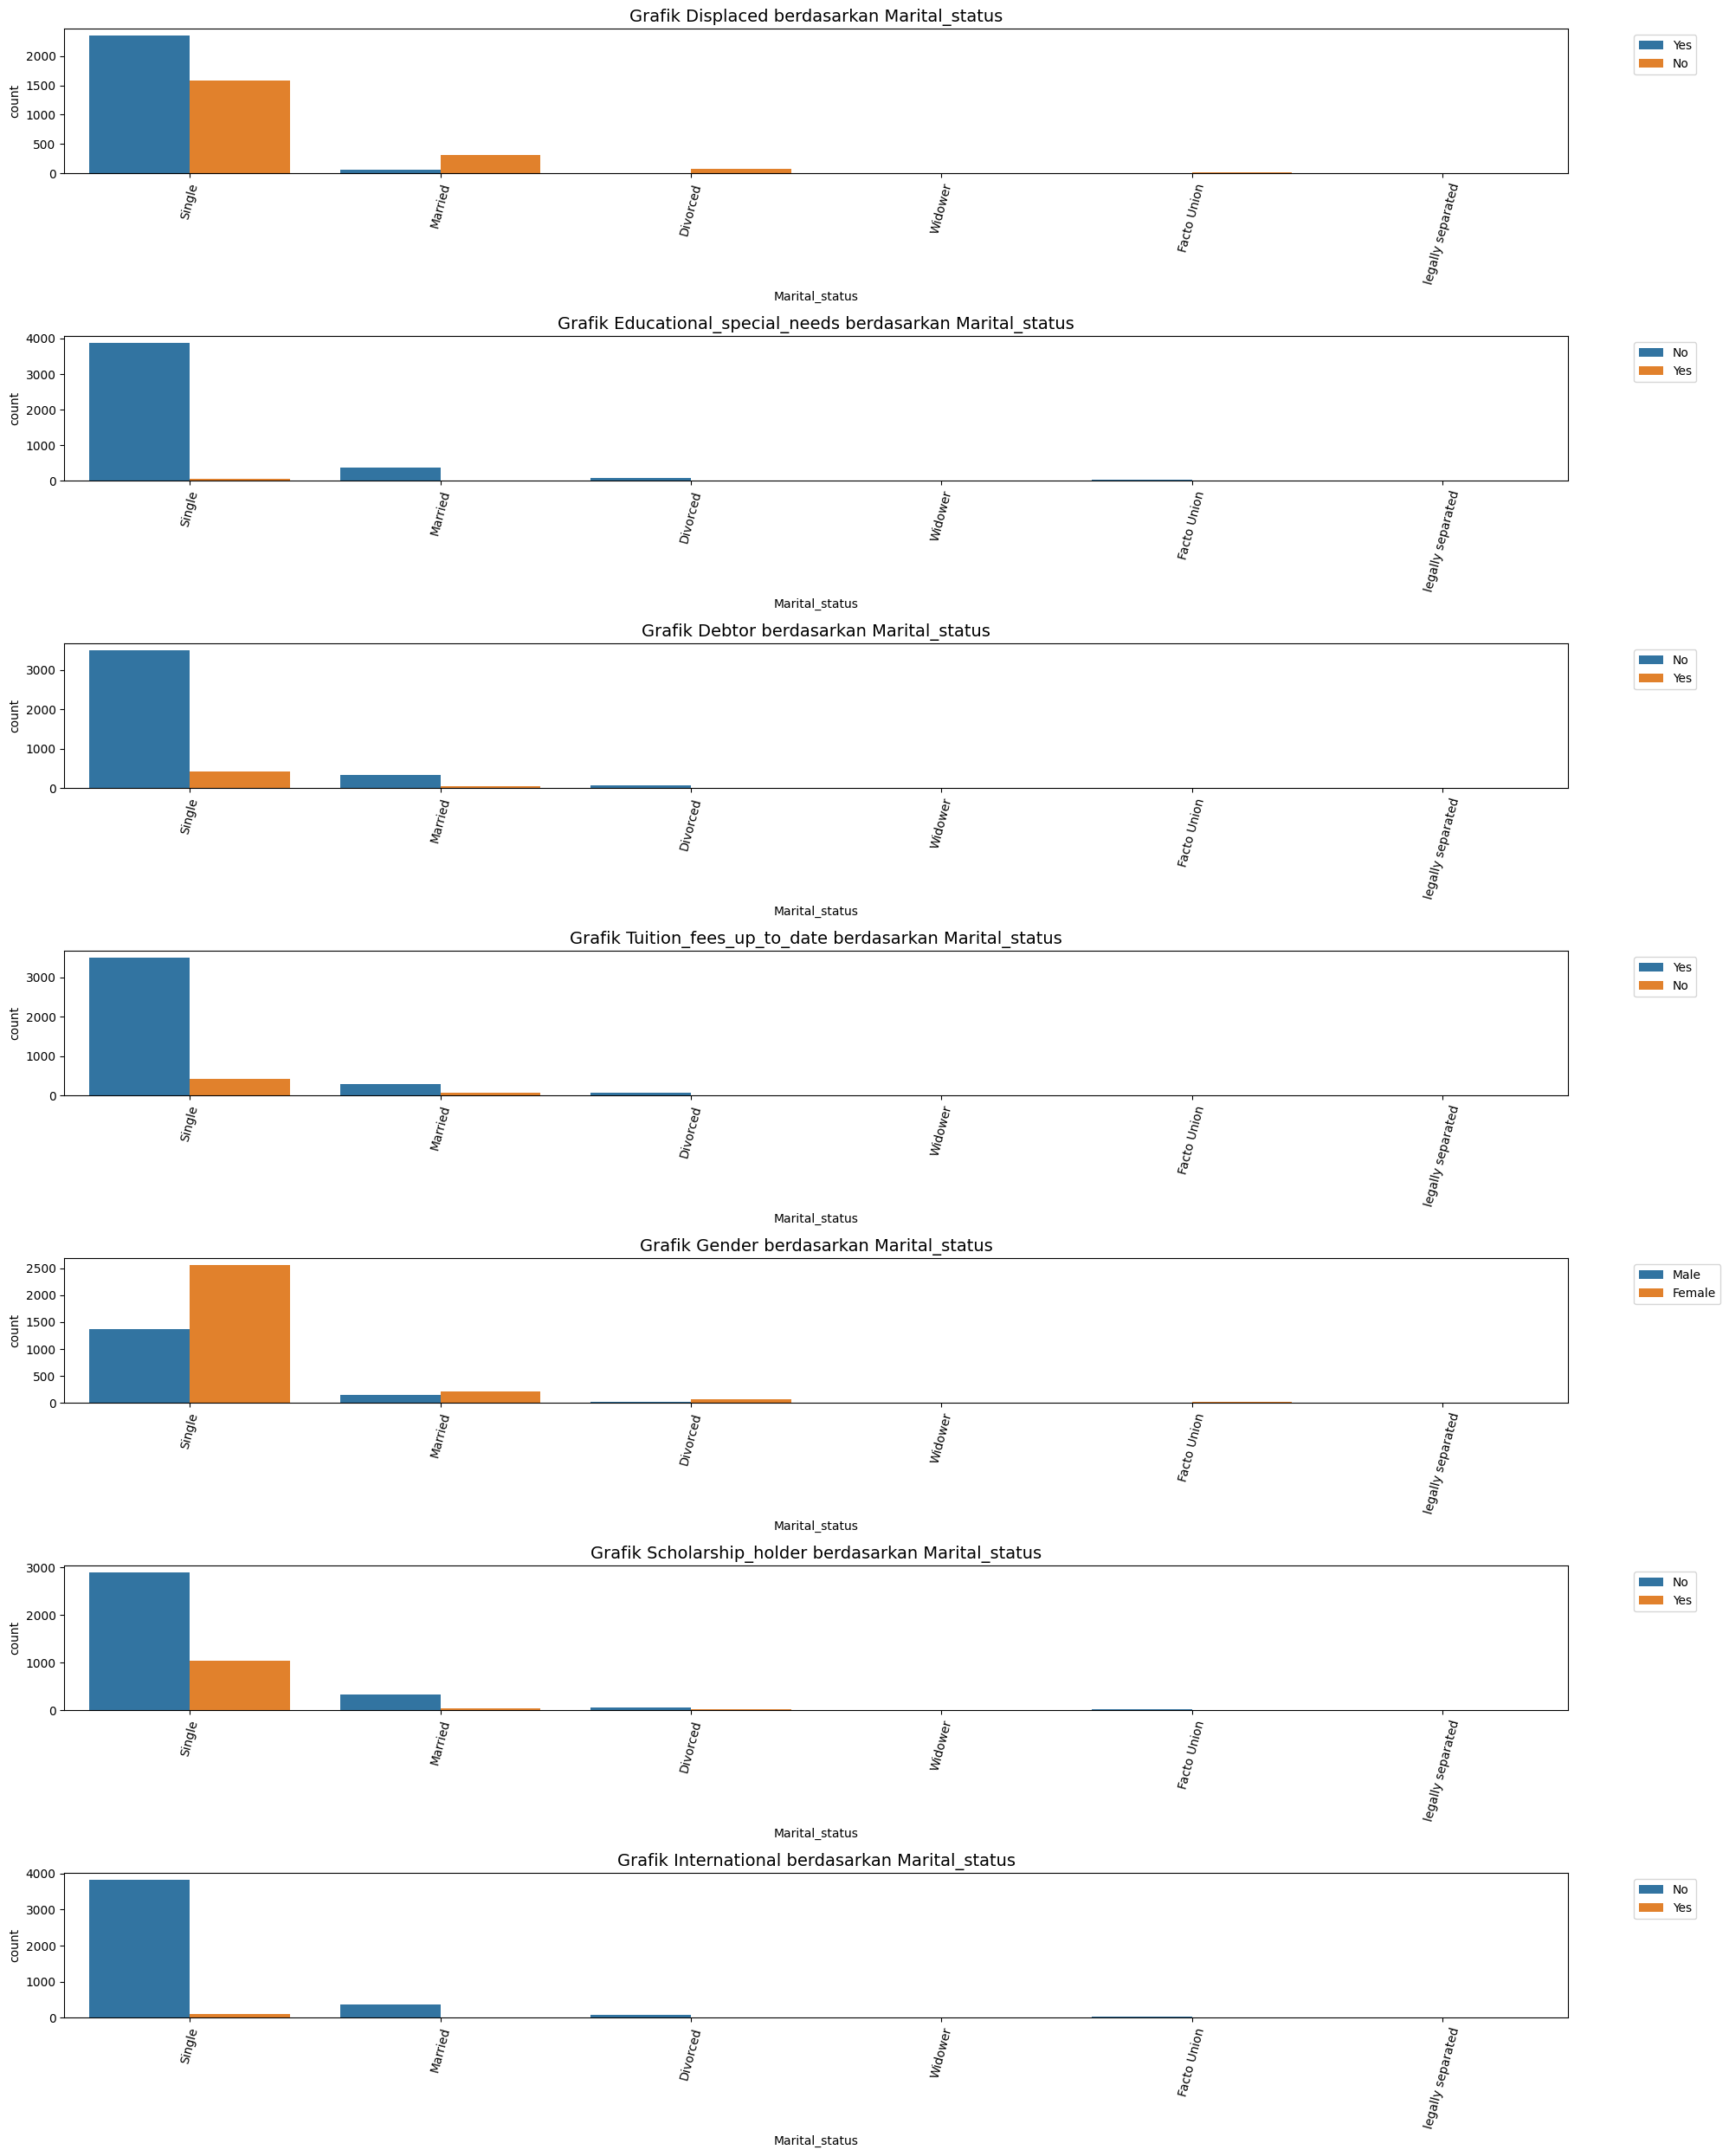

In [233]:
# 2. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan Martial_status
categorical_plot(
    features=["Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International"],
    df=label_df,
    segment_feature="Marital_status"
)

##### Distribusi Fitur Kategorikal berdasarkan Fitur Course

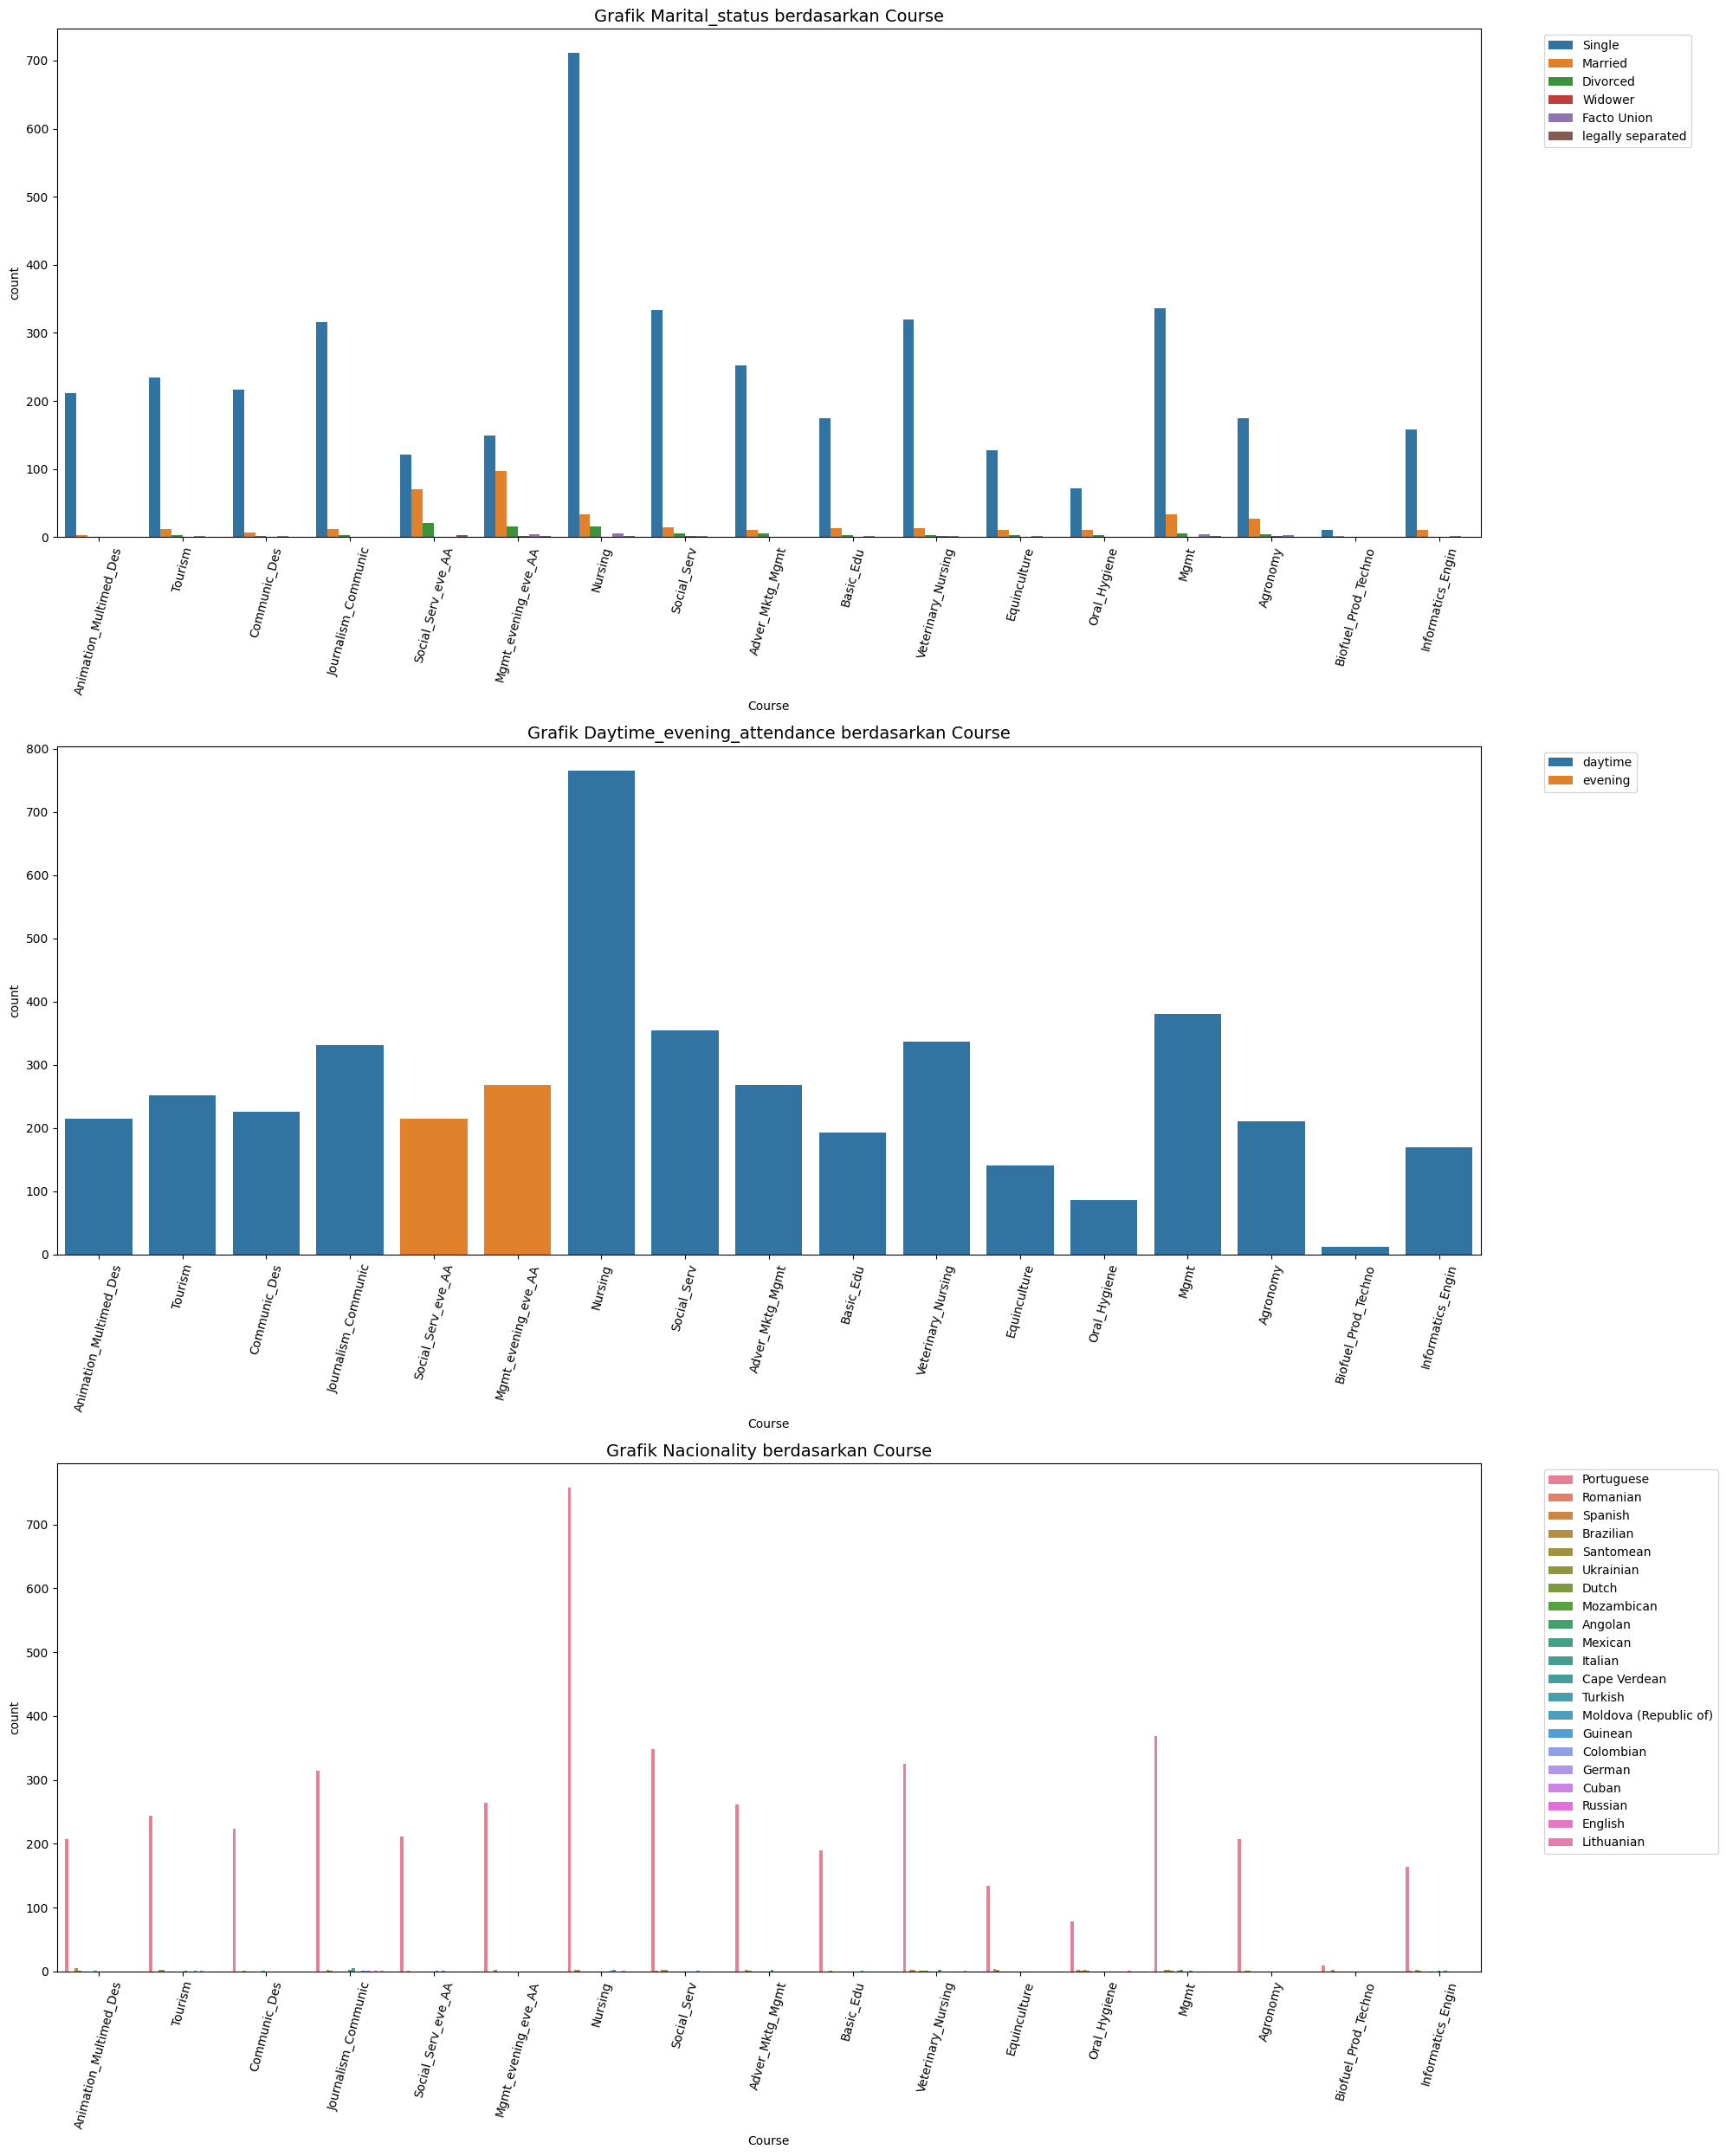

In [234]:
# 1. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan course
categorical_plot(
    features=["Marital_status", "Daytime_evening_attendance", "Nacionality"],
    df=label_df,
    segment_feature="Course"
)

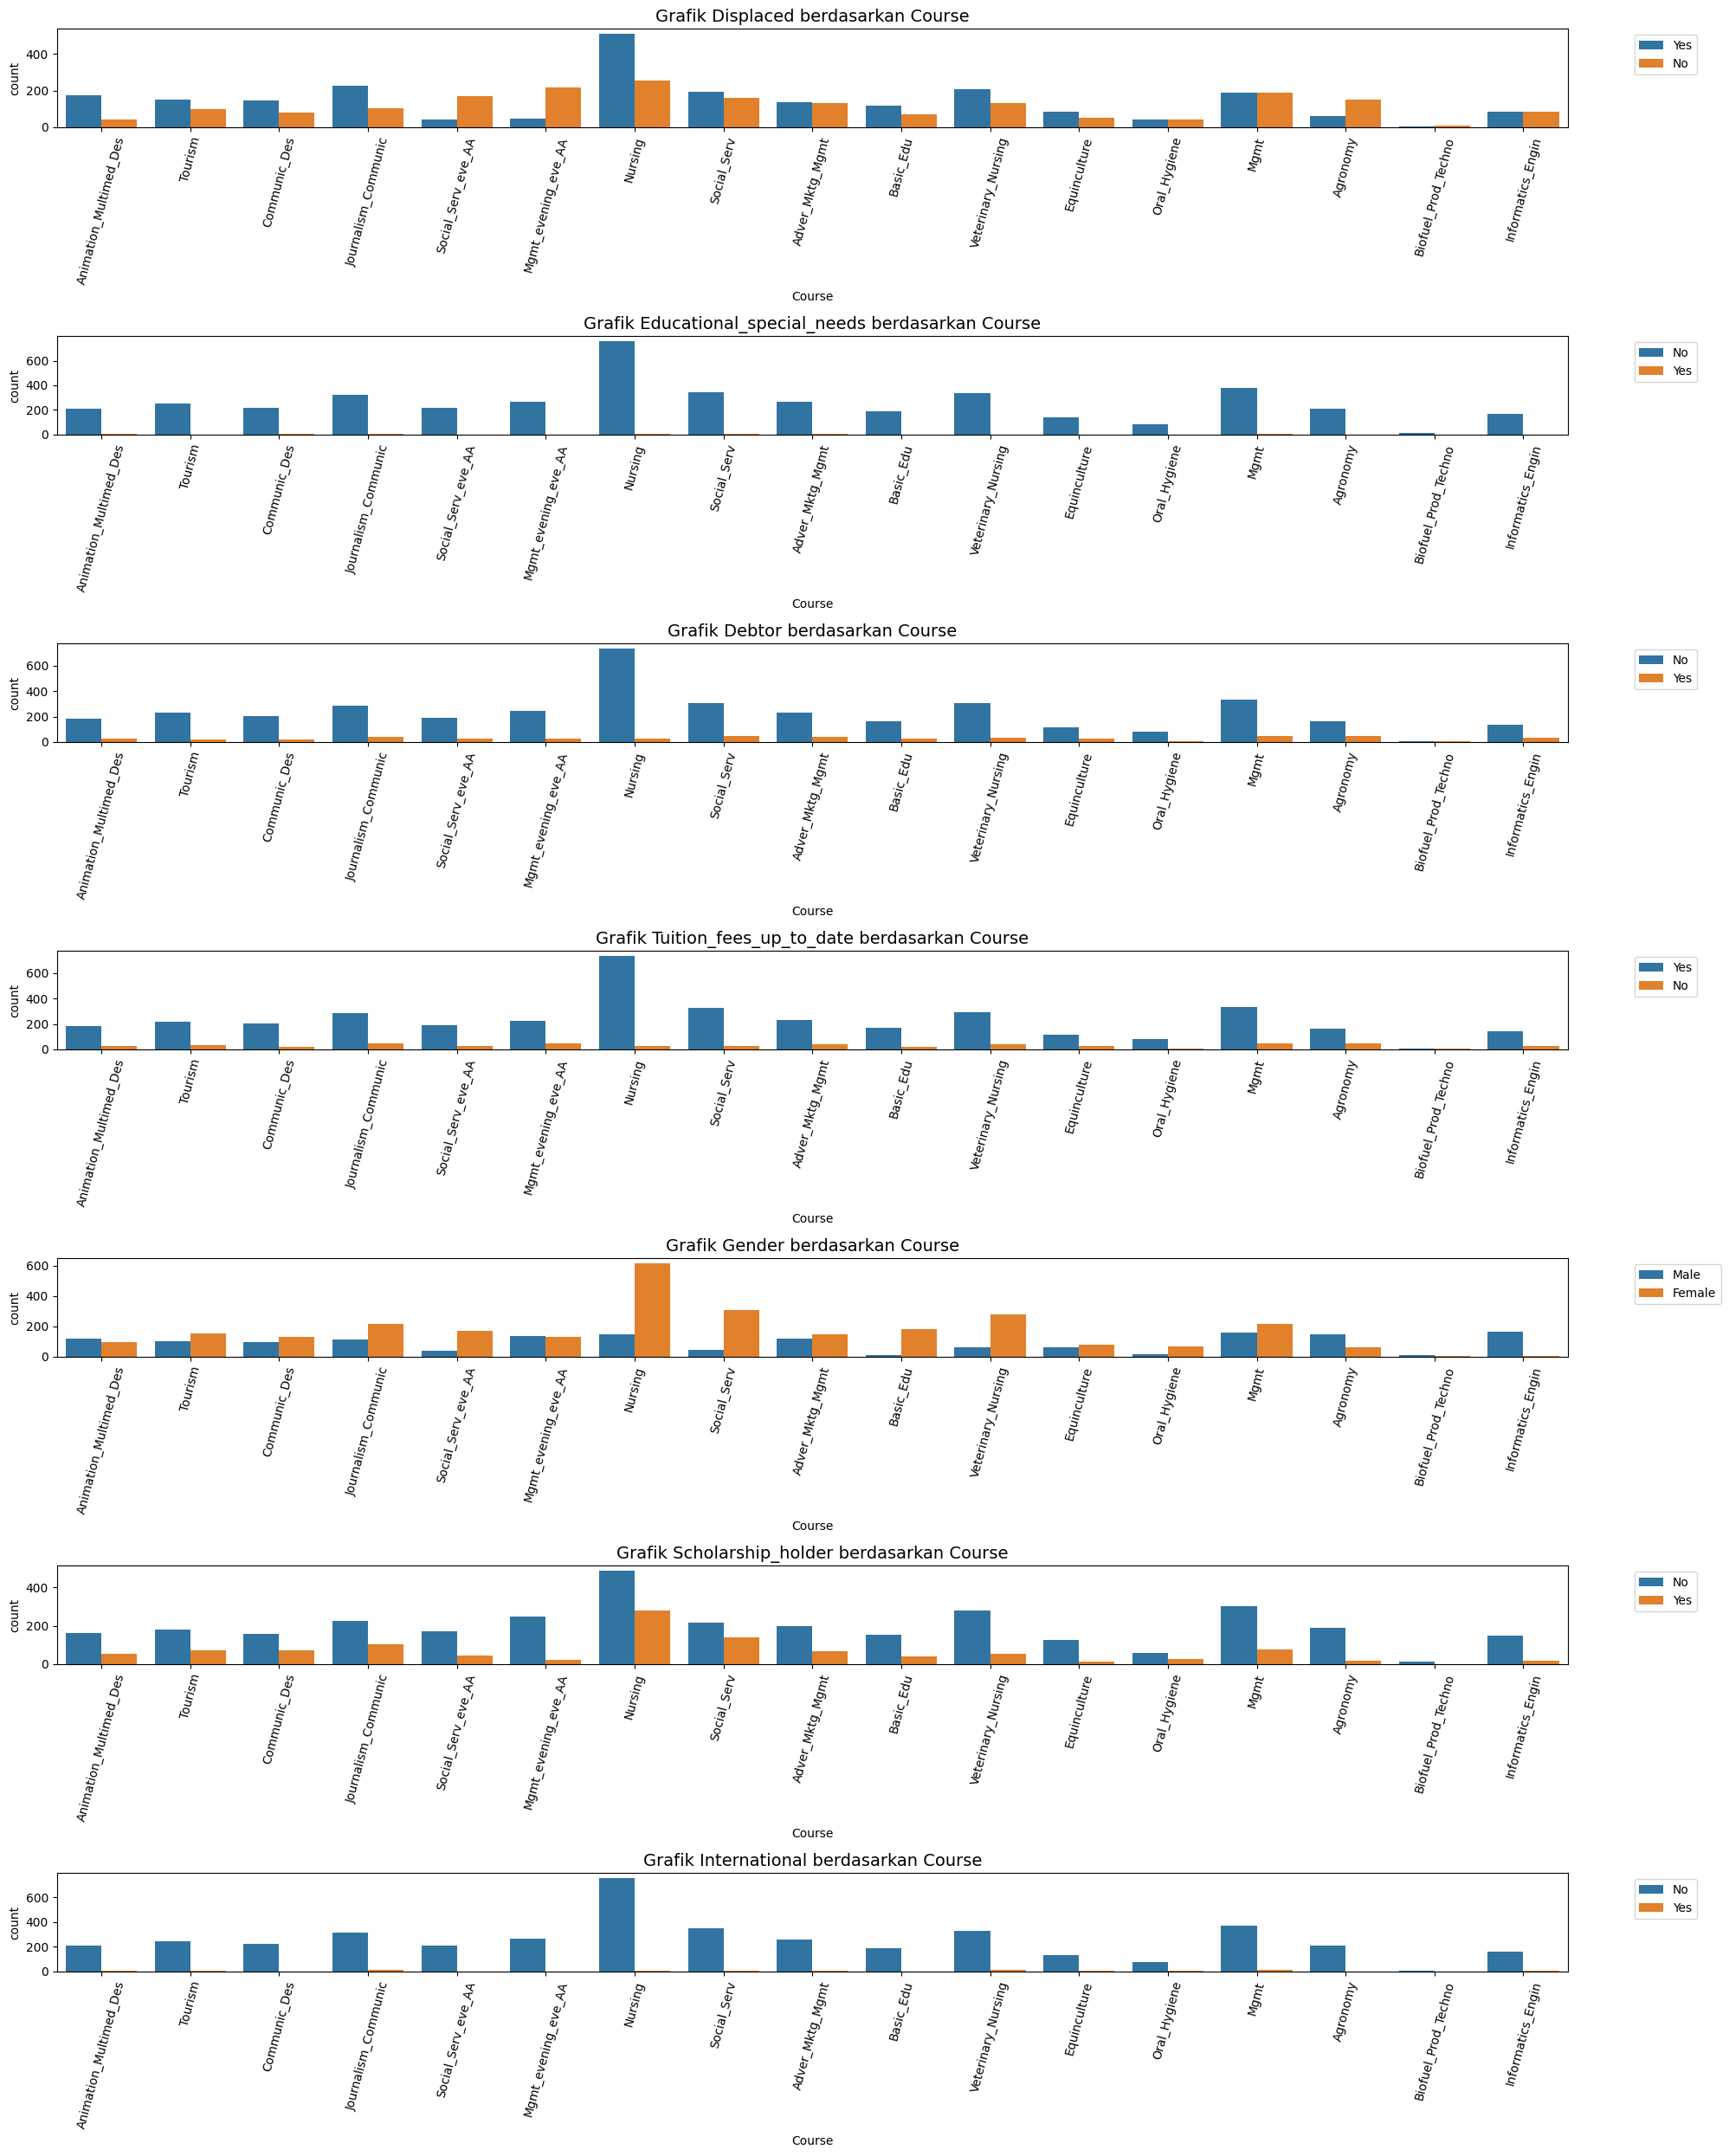

In [235]:
# 2. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan course
categorical_plot(
    features=["Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International"],
    df=label_df,
    segment_feature="Course"
)

## Data Preparation / Preprocessing

In [236]:
# Menampilkan dataset df
df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [237]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dalam dataset ini, label target sudah diketahui, yaitu kolom Status yang memiliki 3 kategori yaitu dropout, graduate, enrolled. Sehingga pemodelan yang dilakukan ini adalah klasifikasi (multi label).

Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan status adalah variabel Target yang dideklarasikan sebagai y.

Selain itu, akan juga dilakukan Feature Selection untuk mengeliminasi Fitur2 (Kolom2) yang tidak digunakan dari dataset.

### Menghapus fitur yang tidak dibutuhkan dan membuat dataframe baru

In [238]:
# Cek kolom dataset
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [239]:
# Membuat dataframe baru

kolom_dihapus_df = ['Application_mode', 'Application_order', 'Mothers_qualification', 'Fathers_qualification', 'Gender',
                    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']

dataset_ml = df.drop(kolom_dihapus_df, axis=1)

dataset_ml.columns


Index(['Marital_status', 'Course', 'Daytime_evening_attendance',
       'Previous_qualification', 'Previous_qualification_grade', 'Nacionality',
       'Mothers_occupation', 'Fathers_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
       'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Status'],
      dtype='object')

In [240]:
dataset_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marital_status                        4424 non-null   int64  
 1   Course                                4424 non-null   int64  
 2   Daytime_evening_attendance            4424 non-null   int64  
 3   Previous_qualification                4424 non-null   int64  
 4   Previous_qualification_grade          4424 non-null   float64
 5   Nacionality                           4424 non-null   int64  
 6   Mothers_occupation                    4424 non-null   int64  
 7   Fathers_occupation                    4424 non-null   int64  
 8   Admission_grade                       4424 non-null   float64
 9   Displaced                             4424 non-null   int64  
 10  Educational_special_needs             4424 non-null   int64  
 11  Debtor           

### Melakukan encoding beberapa fitur

In [241]:
# Inisialisasi fitur yang tidak akan di encoding

fitur_normalisasi, fitur_encoding = [], []

for fitur in dataset_ml:
  if dataset_ml[fitur].dtype == "object":
      fitur_encoding.append(fitur)
  else:
      fitur_normalisasi.append(fitur)

# Mendapatkan fitur yang akan di encoding
print("Fitur yang di encode")
print(fitur_encoding)

# Melakukan Label Encoder pada fitur
LE = LabelEncoder() #Mendefenisikan LabelEncoder sebagai LE
dataset_ml_main = dataset_ml.copy() #Mencegah SettingWithCopyWarning pandas

for col in fitur_encoding:
    dataset_ml_main[col] = LE.fit_transform(dataset_ml_main[col])

    # mapping encoder
    label_mapping = {index: label for index, label in enumerate(LE.classes_)}
    print(f'Label mapping for {col}:', label_mapping)


Fitur yang di encode
['Status']
Label mapping for Status: {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}


### Melakukan Normalisasi untuk beberapa fitur

In [242]:
# Cek tipe data numerik

dataset_ml_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marital_status                        4424 non-null   int64  
 1   Course                                4424 non-null   int64  
 2   Daytime_evening_attendance            4424 non-null   int64  
 3   Previous_qualification                4424 non-null   int64  
 4   Previous_qualification_grade          4424 non-null   float64
 5   Nacionality                           4424 non-null   int64  
 6   Mothers_occupation                    4424 non-null   int64  
 7   Fathers_occupation                    4424 non-null   int64  
 8   Admission_grade                       4424 non-null   float64
 9   Displaced                             4424 non-null   int64  
 10  Educational_special_needs             4424 non-null   int64  
 11  Debtor           

In [243]:
# Melakukan normalisasi untuk beberapa fitur

#fitur_normalisasi = fitur_normalisasi[:26]

scaler = MinMaxScaler()  #Mendefinisikan MinMaxScaler
dataset_ml_main[fitur_normalisasi] = scaler.fit_transform(dataset_ml_main[fitur_normalisasi]) #Menerapkan fit_transform untuk normalisasi fitur terpilih

print("Fitur yang di normalisasi")
print(dataset_ml_main[fitur_normalisasi].describe().T[['min','max']]) #Cek nilai min dan max dari setiap fitur yang telah di normalisasi

Fitur yang di normalisasi
                                      min  max
Marital_status                        0.0  1.0
Course                                0.0  1.0
Daytime_evening_attendance            0.0  1.0
Previous_qualification                0.0  1.0
Previous_qualification_grade          0.0  1.0
Nacionality                           0.0  1.0
Mothers_occupation                    0.0  1.0
Fathers_occupation                    0.0  1.0
Admission_grade                       0.0  1.0
Displaced                             0.0  1.0
Educational_special_needs             0.0  1.0
Debtor                                0.0  1.0
Tuition_fees_up_to_date               0.0  1.0
Scholarship_holder                    0.0  1.0
Age_at_enrollment                     0.0  1.0
International                         0.0  1.0
Curricular_units_1st_sem_credited     0.0  1.0
Curricular_units_1st_sem_enrolled     0.0  1.0
Curricular_units_1st_sem_evaluations  0.0  1.0
Curricular_units_1st_sem_approved 

In [244]:
# Menampilkan dataset setelah di data pre-processing
dataset_ml_main.head()

Marital_status    Course  Daytime_evening_attendance  \
0             0.0  0.013858                         1.0   
1             0.0  0.925989                         1.0   
2             0.0  0.907512                         1.0   
3             0.0  0.978108                         1.0   
4             0.2  0.801466                         0.0   

   Previous_qualification  Previous_qualification_grade  Nacionality  \
0                     0.0                      0.284211          0.0   
1                     0.0                      0.684211          0.0   
2                     0.0                      0.284211          0.0   
3                     0.0                      0.284211          0.0   
4                     0.0                      0.052632          0.0   

   Mothers_occupation  Fathers_occupation  Admission_grade  Displaced  ...  \
0            0.025773            0.046154         0.340000        1.0  ...   
1            0.015464            0.015385         0.500000        1.0  ...   
2            0.046392            0.046154         0.313684        1.0  ...   
3            0.025773            0.015385         0.258947        1.0  ...   
4            0.046392            0.046154         0.489474        0.0  ...   

   Curricular_units_1st_sem_enrolled  Curricular_units_1st_sem_evaluations  \
0                           0.000000                              0.000000   
1                           0.230769                              0.133333   
2                           0.230769                              0.000000   
3                           0.230769                              0.177778   
4                           0.230769                              0.200000   

   Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                           0.000000                        0.000000   
1                           0.230769                        0.741722   
2                           0.000000                        0.000000   
3                           0.230769                        0.711447   
4                           0.192308                        0.653422   

   Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
0                                0.0                            0.00000   
1                                0.0                            0.26087   
2                                0.0                            0.26087   
3                                0.0                            0.26087   
4                                0.0                            0.26087   

   Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
0                              0.000000                               0.00   
1                              0.181818                               0.30   
2                              0.000000                               0.00   
3                              0.303030                               0.25   
4                              0.181818                               0.30   

   Curricular_units_2nd_sem_grade  Status  
0                        0.000000       0  
1                        0.735897       2  
2                        0.000000       0  
3                        0.667692       2  
4                        0.700000       2  

[5 rows x 27 columns]

In [245]:
# Cek info dataset
dataset_ml_main.describe()

Marital_status       Course  Daytime_evening_attendance  \
count     4424.000000  4424.000000                 4424.000000   
mean         0.035714     0.886086                    0.890823   
std          0.121149     0.207227                    0.311897   
min          0.000000     0.000000                    0.000000   
25%          0.000000     0.909018                    1.000000   
50%          0.000000     0.924382                    1.000000   
75%          0.000000     0.956317                    1.000000   
max          1.000000     1.000000                    1.000000   

       Previous_qualification  Previous_qualification_grade  Nacionality  \
count             4424.000000                   4424.000000  4424.000000   
mean                 0.085185                      0.395930     0.008085   
std                  0.243252                      0.138825     0.064023   
min                  0.000000                      0.000000     0.000000   
25%                  0.000000                      0.315789     0.000000   
50%                  0.000000                      0.401053     0.000000   
75%                  0.000000                      0.473684     0.000000   
max                  1.000000                      1.000000     1.000000   

       Mothers_occupation  Fathers_occupation  Admission_grade    Displaced  \
count         4424.000000         4424.000000      4424.000000  4424.000000   
mean             0.056499            0.056576         0.336612     0.548373   
std              0.136177            0.129554         0.152442     0.497711   
min              0.000000            0.000000         0.000000     0.000000   
25%              0.020619            0.020513         0.241053     0.000000   
50%              0.025773            0.035897         0.327368     1.000000   
75%              0.046392            0.046154         0.418947     1.000000   
max              1.000000            1.000000         1.000000     1.000000   

       ...  Curricular_units_1st_sem_enrolled  \
count  ...                        4424.000000   
mean   ...                           0.241176   
std    ...                           0.095391   
min    ...                           0.000000   
25%    ...                           0.192308   
50%    ...                           0.230769   
75%    ...                           0.269231   
max    ...                           1.000000   

       Curricular_units_1st_sem_evaluations  \
count                           4424.000000   
mean                               0.184423   
std                                0.092869   
min                                0.000000   
25%                                0.133333   
50%                                0.177778   
75%                                0.222222   
max                                1.000000   

       Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
count                        4424.000000                     4424.000000   
mean                            0.181023                        0.563752   
std                             0.119009                        0.256618   
min                             0.000000                        0.000000   
25%                             0.115385                        0.582781   
50%                             0.192308                        0.650899   
75%                             0.230769                        0.709934   
max                             1.000000                        1.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.028517                           0.270963   
std                             0.100976                           0.095476   
min                             0.000000                           0.000000   
25%                             0.000000                           0.

In [246]:
dataset_ml_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marital_status                        4424 non-null   float64
 1   Course                                4424 non-null   float64
 2   Daytime_evening_attendance            4424 non-null   float64
 3   Previous_qualification                4424 non-null   float64
 4   Previous_qualification_grade          4424 non-null   float64
 5   Nacionality                           4424 non-null   float64
 6   Mothers_occupation                    4424 non-null   float64
 7   Fathers_occupation                    4424 non-null   float64
 8   Admission_grade                       4424 non-null   float64
 9   Displaced                             4424 non-null   float64
 10  Educational_special_needs             4424 non-null   float64
 11  Debtor           

### Membagi dataset -> training dan testing

In [247]:
# Membagi dataset

X = dataset_ml_main.drop(["Status"], axis = 1) #Variabel X adalah fitur2 yang tergolong dalam class
y = dataset_ml_main["Status"] #Variabel Y adalah fitur yang tergolong sebagai label / target

# Membagi dataset ke dalam train dan test dengan proporsi test sebanyak 30% dari populasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Cek dataset
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (3096, 26)
Shape of y_train : (3096,)
Shape of X_test : (1328, 26)
Shape of y_test : (1328,)


## Modeling

### Cek Model Klasifikasi

#### Melakukan train dan test setiap model klasifikasi

In [248]:
# Insialisasi model
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(class_weight='balanced', max_iter=12000)

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(max_iter=12000)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()


accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():

    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predictions = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, average='micro')
    recall[key] = recall_score(predictions, y_test, average='micro')
    f1[key] = f1_score(predictions, y_test, average='micro')

In [249]:
# Menampilkan evaluasi setiap model

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()

df_model

Accuracy  Precision    Recall  F1-Score
Logistic Regression      0.743223   0.743223  0.743223  0.743223
Support Vector Machines  0.760542   0.760542  0.760542  0.760542
Decision Trees           0.670934   0.670934  0.670934  0.670934
Random Forest            0.769578   0.769578  0.769578  0.769578
Naive Bayes              0.701807   0.701807  0.701807  0.701807
K-Nearest Neighbor       0.712349   0.712349  0.712349  0.712349

Pada hasil evaluasi, terlihat bahwa model Random Forest memiliki nilai akurasi tertinggi sehingga model tersebut yang akan digunakan.

#### Memilih Model Random Forest (Klasifikasi)

##### Membuat Model Random Forest

In [250]:
# Memanggil model Random Forest
model_RandomForestClassifier = RandomForestClassifier()

##### Melakukan Training Data dengan Model Random Forest

In [251]:
# Melakukan training model
model_rdf = model_RandomForestClassifier.fit(X_train,y_train)
#print(rdf_model)

# Melakukan prediksi dengan training model
y_train_pred_rdf = model_rdf.predict(X_train)
print(y_train_pred_rdf.shape)

(3096,)


##### Melakukan testing data dengan Model Random Forest

In [252]:
# Melakukan prediksi dengan testing model
y_test_pred_rdf = model_rdf.predict(X_test)
print(y_test_pred_rdf.shape)

(1328,)


In [253]:
y_test_pred_rdf

array([0, 2, 2, ..., 0, 2, 2])

## Evaluation

### Melakukan Evaluasi Model Random Forest

#### Evaluasi Training Model

In [254]:
# classification report - training model
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred_rdf))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1015
           1       1.00      1.00      1.00       553
           2       1.00      1.00      1.00      1528

    accuracy                           1.00      3096
   macro avg       1.00      1.00      1.00      3096
weighted avg       1.00      1.00      1.00      3096



In [255]:
cm = confusion_matrix(y_train, y_train_pred_rdf)

cm

array([[1015,    0,    0],
       [   0,  553,    0],
       [   0,    0, 1528]])

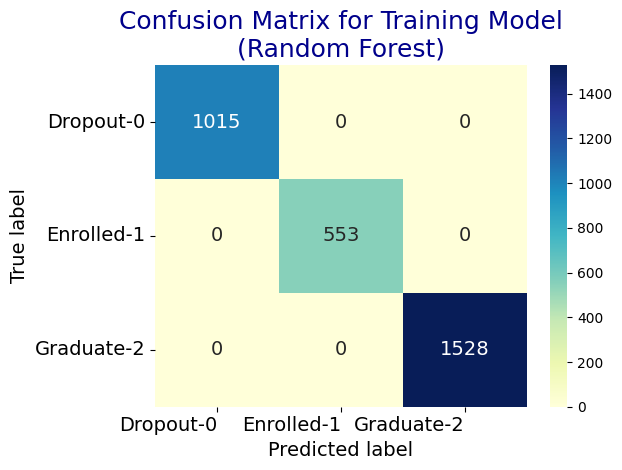

In [256]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rdf)), ('Dropout-0', 'Enrolled-1', 'Graduate-2'), ('Dropout-0', 'Enrolled-1', 'Graduate-2'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

#### Evaluasi Testing Model

In [257]:
# classification report - testing model
print('Classification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred_rdf))

Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       406
           1       0.54      0.36      0.43       241
           2       0.80      0.93      0.86       681

    accuracy                           0.77      1328
   macro avg       0.72      0.68      0.69      1328
weighted avg       0.76      0.77      0.76      1328



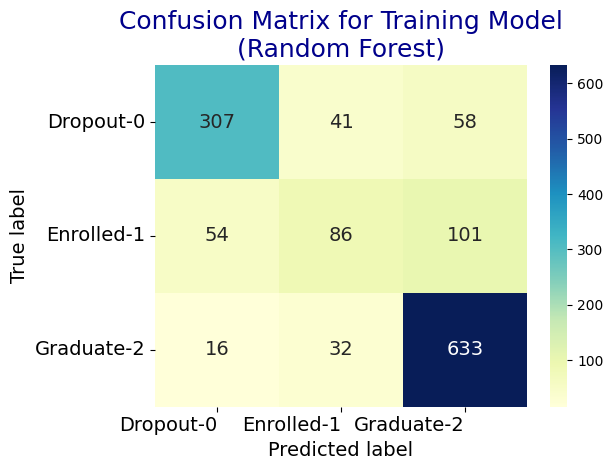

In [258]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rdf)), ('Dropout-0', 'Enrolled-1', 'Graduate-2'), ('Dropout-0', 'Enrolled-1', 'Graduate-2'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Hyperparameter Tunning

In [259]:
#List Hyperparameters yang akan diuji
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

clf = GridSearchCV(estimator = model_rdf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

#Fitting Model
best_model = clf.fit(X_train,y_train)

#Nilai hyperparameters terbaik
print('Best parameter        :', best_model.best_estimator_)

#Prediksi menggunakan model baru
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#Check performa dari model
# classification report - training model
print('\nClassification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred))

# classification report - testing model
print('\nClassification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameter        : RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300)

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1015
           1       0.93      0.61      0.74       553
           2       0.84      0.98      0.91      1528

    accuracy                           0.88      3096
   macro avg       0.90      0.82      0.84      3096
weighted avg       0.88      0.88      0.87      3096


Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       406
           1       0.54      0.27      0.36       241
           2       0.78      0.95      0.86       681

    accuracy                           0.77 

In [260]:
# Melakukan export model
joblib.dump(best_model, "random_forest.joblib")

['random_forest.joblib']

## Test

In [261]:
test_df = label_df.iloc[:20]

In [262]:
def dataset_preprocessing(main_df):
    kolom_dihapus_df = ['Application_mode', 'Application_order', 'Mothers_qualification', 'Fathers_qualification', 'Gender',
                    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
    dataset_ml = df.drop(kolom_dihapus_df, axis=1)

    fitur_normalisasi, fitur_encoding = [], []

    for fitur in dataset_ml:
        if dataset_ml[fitur].dtype == "object":
            fitur_encoding.append(fitur)
        else:
            fitur_normalisasi.append(fitur)

    # Melakukan Label Encoder pada fitur
    LE = LabelEncoder() #Mendefenisikan LabelEncoder sebagai LE
    dataset_ml_main = dataset_ml.copy() #Mencegah SettingWithCopyWarning pandas

    for col in fitur_encoding:
        dataset_ml_main[col] = LE.fit_transform(dataset_ml_main[col])

        # mapping encoder
        label_mapping = {index: label for index, label in enumerate(LE.classes_)}
        print(f'Label mapping for {col}:', label_mapping)

    scaler = MinMaxScaler()  #Mendefinisikan MinMaxScaler
    dataset_ml_main[fitur_normalisasi] = scaler.fit_transform(dataset_ml_main[fitur_normalisasi]) #Menerapkan fit_transform untuk normalisasi fitur terpilih

    dataset_ml_main.drop("Status", axis=1, inplace=True)

    return dataset_ml_main


In [263]:
def predict_attrition(fix_main_df):

    best_model = joblib.load("random_forest.joblib")

    prediction = best_model.predict(fix_main_df)

    return prediction

In [264]:
def result_attrition(main_df, prediction_array):

    result_df_1 = main_df[["Marital_status", "Previous_qualification", "Nacionality", "Gender", "Age_at_enrollment"]]
    result_df_2 = pd.DataFrame(data=prediction_array)
    result_df = pd.merge(result_df_1,result_df_2, how='left', left_index = True, right_index = True)
    result_df.columns = ["Status Perkawinan", "Pendidikan Terakhir", "Kewarganegaraan", "Jenis Kelamin", "Umur (saat mendaftar)", "Prediksi Status Siswa"]

    result_df_fix = result_df.copy()
    result_df_fix["Prediksi Status Siswa"] = result_df_fix["Prediksi Status Siswa"].apply(lambda x: "Dropout" if x == 0 else "Enrolled" if x == 1 else "Graduate")

    return result_df_fix

In [265]:
main_new_dataset = dataset_preprocessing(test_df)

result = predict_attrition(main_new_dataset)

result_dataset = result_attrition(test_df, result)

result_dataset

Label mapping for Status: {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}


Status Perkawinan      Pendidikan Terakhir Kewarganegaraan Jenis Kelamin  \
0             Single                  2nd_Edu      Portuguese          Male   
1             Single                  2nd_Edu      Portuguese          Male   
2             Single                  2nd_Edu      Portuguese          Male   
3             Single                  2nd_Edu      Portuguese        Female   
4            Married                  2nd_Edu      Portuguese        Female   
5            Married  Basic_Edu_3rd_Cyc_or_Eq      Portuguese          Male   
6             Single                  2nd_Edu      Portuguese        Female   
7             Single                  2nd_Edu      Portuguese          Male   
8             Single                  2nd_Edu        Romanian        Female   
9             Single                  2nd_Edu      Portuguese        Female   
10            Single                  2nd_Edu      Portuguese        Female   
11            Single                  2nd_Edu      Portuguese        Female   
12            Single                  2nd_Edu      Portuguese        Female   
13            Single   Pro_higher_Technic_Crs      Portuguese        Female   
14            Single                  2nd_Edu      Portuguese        Female   
15            Single                  2nd_Edu      Portuguese        Female   
16            Single                  2nd_Edu      Portuguese        Female   
17            Single                  2nd_Edu      Portuguese        Female   
18            Single                  2nd_Edu      Portuguese        Female   
19            Single                  2nd_Edu      Portuguese        Female   

    Umur (saat mendaftar) Prediksi Status Siswa  
0                      20               Dropout  
1                      19              Graduate  
2                      19               Dropout  
3                      20              Graduate  
4                      45              Graduate  
5                      50              Graduate  
6                      18              Graduate  
7                      22               Dropout  
8                      21              Graduate  
9                      18               Dropout  
10                     18              Graduate  
11                     18              Graduate  
12                     19               Dropout  
13                     21              Graduate  
14                     18              Graduate  
15                     20               Dropout  
16                     18              Enrolled  
17                     18              Graduate  
18                     20              Graduate  
19                     18              Graduate